LOAN application

In [1]:
pip install pm4py

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install powerlaw

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pm4py
import numpy as np
import pandas as pd
import powerlaw
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pm4py.read_xes("financial_log.xes")

parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

periodo del log 

In [5]:
# convert to datetime
df['time:timestamp'] = pd.to_datetime(df['time:timestamp'])
# find min and max date
min_date = df['time:timestamp'].min()
max_date = df['time:timestamp'].max()
# print difference
print(f"Min date: {min_date}")
print(f"Max date: {max_date}")
print(f"Difference: {max_date - min_date}")

Min date: 2011-10-01 00:38:44.546000+00:00
Max date: 2012-03-14 16:04:54.681000+00:00
Difference: 165 days 15:26:10.135000


numero dei casi, eventi totali e numero classi di eventi uniche

In [6]:
print("Numero di casi:", df['case:concept:name'].nunique())
print("Eventi totali:", len(df))
print("Numero di classi di eventi uniche:", df['concept:name'].nunique())

Numero di casi: 13087
Eventi totali: 262200
Numero di classi di eventi uniche: 24


In [7]:
# Attributes at event level
print("Event Attributes:")
for col in df.columns:
  if ":" in col and col.split(":")[0] != 'case':
    print(f"- {col}")

# Attributes at case level
print("\nCase Attributes:")
case_attributes = [col for col in df.columns if col.startswith('case:')]
for col in case_attributes:
  print(f"- {col}")

Event Attributes:
- org:resource
- lifecycle:transition
- concept:name
- time:timestamp

Case Attributes:
- case:REG_DATE
- case:concept:name
- case:AMOUNT_REQ


In [8]:
#lifecycle:transition valori unici

print("\nValori unici per 'lifecycle:transition':", df['lifecycle:transition'].unique())
print("Numero di valori unici per 'lifecycle:transition':", df['lifecycle:transition'].nunique())


Valori unici per 'lifecycle:transition': ['COMPLETE' 'SCHEDULE' 'START']
Numero di valori unici per 'lifecycle:transition': 3


In [9]:
df_complete = df[df['lifecycle:transition'] == 'COMPLETE']
df_schedule = df[df['lifecycle:transition'] == 'SCHEDULE']
df_start = df[df['lifecycle:transition'] == 'START']

# Print the number of events for each separated dataframe
print(f"Number of events with lifecycle:transition 'COMPLETE': {len(df_complete)}")
print(f"Number of events with lifecycle:transition 'SCHEDULE': {len(df_schedule)}")
print(f"Number of events with lifecycle:transition 'START': {len(df_start)}")


Number of events with lifecycle:transition 'COMPLETE': 164506
Number of events with lifecycle:transition 'SCHEDULE': 26318
Number of events with lifecycle:transition 'START': 71376


In [10]:
# For df_complete
df_complete_A = df_complete[df_complete['concept:name'].str.startswith('A_')]
df_complete_O = df_complete[df_complete['concept:name'].str.startswith('O_')]
df_complete_W = df_complete[df_complete['concept:name'].str.startswith('W_')]

# For df_schedule
df_schedule_A = df_schedule[df_schedule['concept:name'].str.startswith('A_')]
df_schedule_O = df_schedule[df_schedule['concept:name'].str.startswith('O_')]
df_schedule_W = df_schedule[df_schedule['concept:name'].str.startswith('W_')]

# For df_start
df_start_A = df_start[df_start['concept:name'].str.startswith('A_')]
df_start_O = df_start[df_start['concept:name'].str.startswith('O_')]
df_start_W = df_start[df_start['concept:name'].str.startswith('W_')]


print(f"\nNumber of events with lifecycle:transition 'COMPLETE' and concept:name starting with 'A_': {len(df_complete_A)}")
print(f"Number of events with lifecycle:transition 'COMPLETE' and concept:name starting with 'O_': {len(df_complete_O)}")
print(f"Number of events with lifecycle:transition 'COMPLETE' and concept:name starting with 'W_': {len(df_complete_W)}")

print(f"\nNumber of events with lifecycle:transition 'SCHEDULE' and concept:name starting with 'A_': {len(df_schedule_A)}")
print(f"Number of events with lifecycle:transition 'SCHEDULE' and concept:name starting with 'O_': {len(df_schedule_O)}")
print(f"Number of events with lifecycle:transition 'SCHEDULE' and concept:name starting with 'W_': {len(df_schedule_W)}")

print(f"\nNumber of events with lifecycle:transition 'START' and concept:name starting with 'A_': {len(df_start_A)}")
print(f"Number of events with lifecycle:transition 'START' and concept:name starting with 'O_': {len(df_start_O)}")
print(f"Number of events with lifecycle:transition 'START' and concept:name starting with 'W_': {len(df_start_W)}")


Number of events with lifecycle:transition 'COMPLETE' and concept:name starting with 'A_': 60849
Number of events with lifecycle:transition 'COMPLETE' and concept:name starting with 'O_': 31244
Number of events with lifecycle:transition 'COMPLETE' and concept:name starting with 'W_': 72413

Number of events with lifecycle:transition 'SCHEDULE' and concept:name starting with 'A_': 0
Number of events with lifecycle:transition 'SCHEDULE' and concept:name starting with 'O_': 0
Number of events with lifecycle:transition 'SCHEDULE' and concept:name starting with 'W_': 26318

Number of events with lifecycle:transition 'START' and concept:name starting with 'A_': 0
Number of events with lifecycle:transition 'START' and concept:name starting with 'O_': 0
Number of events with lifecycle:transition 'START' and concept:name starting with 'W_': 71376


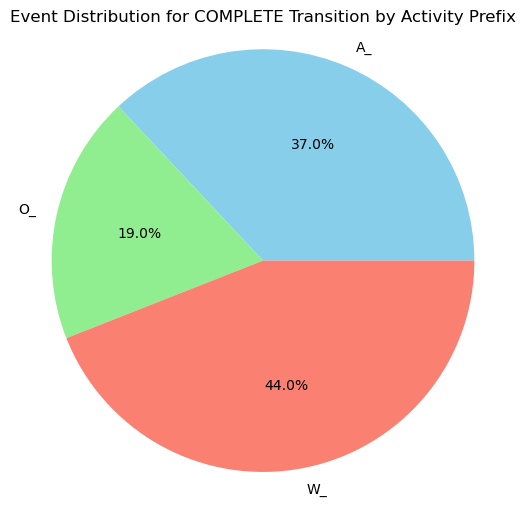

In [297]:
import matplotlib.pyplot as plt

# Etichette e dati
labels = ['A_', 'O_', 'W_']
complete_counts = [len(df_complete_A), len(df_complete_O), len(df_complete_W)]

# Creazione del grafico a torta
plt.figure(figsize=(6, 6))
plt.pie(complete_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Event Distribution for COMPLETE Transition by Activity Prefix')
plt.axis('equal')  # Per rendere la torta circolare
plt.show()


DATA CLEANING

In [12]:
#controllare gli attributi di che tipo sono

print("\nData types of attributes:")
for col in df.columns:
  print(f"- {col}: {df[col].dtype}")



Data types of attributes:
- org:resource: object
- lifecycle:transition: object
- concept:name: object
- time:timestamp: datetime64[ns, UTC]
- case:REG_DATE: datetime64[ns, UTC]
- case:concept:name: object
- case:AMOUNT_REQ: object


In [13]:
#non serve perchè sono gai giusti nel caso si volesse trasformare
df['org:resource'] = df['org:resource'].astype(str)
df['lifecycle:transition'] = df['lifecycle:transition'].astype(str)
df['concept:name'] = df['concept:name'].astype(str)
df['time:timestamp']= pd.to_datetime(df['time:timestamp'])
df['case:REG_DATE']= pd.to_datetime(df['case:REG_DATE'])
df['case:concept:name'] = df['case:concept:name'].astype(str)

In [14]:
#Confrontare il numero di eventi START e COMPLETE per ogni attività che inizia con W_

# Filter events starting with 'W_'
df_W = df[df['concept:name'].str.startswith('W_')]

# Count START and COMPLETE transitions for these events
start_W_count = len(df_W[df_W['lifecycle:transition'] == 'START'])
complete_W_count = len(df_W[df_W['lifecycle:transition'] == 'COMPLETE'])

print(f"\nNumero di eventi 'START' per attività che iniziano con 'W_': {start_W_count}")
print(f"Numero di eventi 'COMPLETE' per attività che iniziano con 'W_': {complete_W_count}")
print(f"differenza con 'W_': ", complete_W_count- start_W_count)


Numero di eventi 'START' per attività che iniziano con 'W_': 71376
Numero di eventi 'COMPLETE' per attività che iniziano con 'W_': 72413
differenza con 'W_':  1037


Trova attività con più COMPLETE che START

In [15]:
# Group by activity and transition, then count
activity_transition_counts = df_W.groupby(['concept:name', 'lifecycle:transition']).size().unstack(fill_value=0)
# Find activities where 'COMPLETE' count is greater than 'START' count
activities_more_complete_than_start = activity_transition_counts[activity_transition_counts['COMPLETE'] > activity_transition_counts['START']]
print("\nAttività con più transizioni 'COMPLETE' rispetto a 'START':")
activities_more_complete_than_start


Attività con più transizioni 'COMPLETE' rispetto a 'START':


lifecycle:transition            COMPLETE  SCHEDULE  START
concept:name                                             
W_Afhandelen leads                  5898      4771   5897
W_Completeren aanvraag             23967      7371  23512
W_Nabellen incomplete dossiers     11407      2383  11400
W_Nabellen offertes                22976      6634  22406
W_Valideren aanvraag                7895      5023   7891

In [16]:
# Ordina gli eventi per caso e timestamp
df_sorted = df_W.sort_values(by=['case:concept:name', 'time:timestamp'])
# Raggruppa per caso e attività
def match_start_complete(group):
    starts = group[group['lifecycle:transition'] == 'START'].index.tolist()
    completes = group[group['lifecycle:transition'] == 'COMPLETE'].index.tolist()

    # Fai il matching: per ogni START, associa un COMPLETE
    matched_completes = set()
    for start_idx in starts:
        for complete_idx in completes:
            if complete_idx not in matched_completes and complete_idx > start_idx:
                matched_completes.add(complete_idx)
                break
    # Gli altri COMPLETE non associati sono considerati in eccesso
    excess_complete = [idx for idx in completes if idx not in matched_completes]
    return excess_complete

# Applica la funzione e raccogli gli indici dei COMPLETE "orfani"
excess_complete_indices = df_sorted.groupby(['case:concept:name', 'concept:name']).apply(match_start_complete).explode().dropna().astype(int).tolist()

print("\nNumero di COMPLETE in eccesso da rimuovere:", len(excess_complete_indices))


Numero di COMPLETE in eccesso da rimuovere: 1040


/var/folders/1z/mnqndy610lv5v7svrf9js9yr0000gn/T/ipykernel_31242/3992358234.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  excess_complete_indices = df_sorted.groupby(['case:concept:name', 'concept:name']).apply(match_start_complete).explode().dropna().astype(int).tolist()


In [17]:
df_cleaned = df.drop(excess_complete_indices)

print("\nLog ripulito pronto!")


Log ripulito pronto!


In [18]:
print( len(df),"-->",len(df_cleaned), "\neventi eliminati:",len(df)-len(df_cleaned))

262200 --> 261160 
eventi eliminati: 1040


In [19]:
num_events = len(df_cleaned)
num_cases = len(df_cleaned['case:concept:name'].unique())
print("Number of events: {}\nNumber of cases: {}\n".format(num_events, num_cases))

Number of events: 261160
Number of cases: 13087



Filtering noise

STARTInformazioni errate, imprecise o incomplete nel log di eventi.-------


In [20]:
# prompt: ordina per time:stamp e raggruppa per case e mostra il df con il primo concert:name e ultimo per ogni caso calcola durata del caso

# Ordina gli eventi per caso e timestamp
df_sorted_time = df_cleaned.sort_values(by=['case:concept:name', 'time:timestamp'])

# Raggruppa per caso e calcola la durata del caso
case_durations = df_sorted_time.groupby('case:concept:name').agg(
    first_concept_name=('concept:name', 'first'),
    last_concept_name=('concept:name', 'last'),
    start_time=('time:timestamp', 'min'),
    end_time=('time:timestamp', 'max')
)

# Calcola la durata come differenza tra l'ultimo e il primo timestamp
case_durations['duration'] = case_durations['end_time'] - case_durations['start_time']

# Mostra il dataframe risultante con il primo concept:name, l'ultimo concept:name e la durata']])
case_durations

first_concept_name            last_concept_name  \
case:concept:name                                                   
173688                   A_SUBMITTED         W_Valideren aanvraag   
173691                   A_SUBMITTED         W_Valideren aanvraag   
173694                   A_SUBMITTED  W_Wijzigen contractgegevens   
173697                   A_SUBMITTED                   A_DECLINED   
173700                   A_SUBMITTED                   A_DECLINED   
...                              ...                          ...   
214364                   A_SUBMITTED          W_Nabellen offertes   
214367                   A_SUBMITTED                   A_DECLINED   
214370                   A_SUBMITTED           W_Afhandelen leads   
214373                   A_SUBMITTED          W_Nabellen offertes   
214376                   A_SUBMITTED           W_Afhandelen leads   

                                        start_time  \
case:concept:name                                    
173688            2011-10-01 00:38:44.546000+00:00   
173691            2011-10-01 08:08:58.256000+00:00   
173694            2011-10-01 08:10:30.287000+00:00   
173697            2011-10-01 08:11:08.866000+00:00   
173700            2011-10-01 08:15:39.894000+00:00   
...                                            ...   
214364            2012-02-29 23:22:24.570000+00:00   
214367            2012-02-29 23:28:41.098000+00:00   
214370            2012-02-29 23:28:55.349000+00:00   
214373            2012-02-29 23:43:09.766000+00:00   
214376            2012-02-29 23:51:16.799000+00:00   

                                          end_time                 duration  
case:concept:name                                                            
173688            2011-10-13 10:37:37.026000+00:00  12 days 09:58:52.480000  
173691            2011-10-10 14:17:34.633000+00:00   9 days 06:08:36.377000  
173694            2012-02-15 12:29:26.299000+00:00 137 days 04:18:56.012000  
173697            2011-10-01 08:11:46.420000+00:00   0 days 00:00:37.554000  
173700            2011-10-01 08:16:21.037000+00:00   0 days 00:00:41.143000  
...                                            ...                      ...  
214364            2012-03-09 11:01:48.356000+00:00   8 days 11:39:23.786000  
214367            2012-02-29 23:29:21.958000+00:00   0 days 00:00:40.860000  
214370            2012-03-01 09:28:21.228000+00:00   0 days 09:59:25.879000  
214373            2012-03-10 12:50:54.881000+00:00   9 days 13:07:45.115000  
214376            2012-03-01 09:27:41.325000+00:00   0 days 09:36:24.526000  

[13087 rows x 5 columns]

In [21]:
# prompt: # prompt: ordina per time:stamp e raggruppa per case e mostra il df con il primo concert:name, il secondo

# Ordina per time:timestamp e raggruppa per case
df_grouped_by_case = df_cleaned.sort_values(by=['case:concept:name', 'time:timestamp']).groupby('case:concept:name')

# Mostra il dataframe con il primo e il secondo concept:name per ogni caso
result_df = df_grouped_by_case.agg(
    first_concept_name=('concept:name', lambda x: x.iloc[0] if len(x) > 0 else None),
    second_concept_name=('concept:name', lambda x: x.iloc[1] if len(x) > 1 else None)
).reset_index()

print("\nDataframe con il primo e secondo 'concept:name' per ogni caso:")
result_df


Dataframe con il primo e secondo 'concept:name' per ogni caso:


case:concept:name first_concept_name second_concept_name
0                173688        A_SUBMITTED   A_PARTLYSUBMITTED
1                173691        A_SUBMITTED   A_PARTLYSUBMITTED
2                173694        A_SUBMITTED   A_PARTLYSUBMITTED
3                173697        A_SUBMITTED   A_PARTLYSUBMITTED
4                173700        A_SUBMITTED   A_PARTLYSUBMITTED
...                 ...                ...                 ...
13082            214364        A_SUBMITTED   A_PARTLYSUBMITTED
13083            214367        A_SUBMITTED   A_PARTLYSUBMITTED
13084            214370        A_SUBMITTED   A_PARTLYSUBMITTED
13085            214373        A_SUBMITTED   A_PARTLYSUBMITTED
13086            214376        A_SUBMITTED   A_PARTLYSUBMITTED

[13087 rows x 3 columns]

In [22]:
# prompt: fammi vedere firs_concept_name con  le sue frequenze e fammi vedere second_concept_name e le sue frequenze

# Calculate the frequency of first_concept_name
first_concept_name_frequencies = result_df['first_concept_name'].value_counts()

# Print the first_concept_name and its frequencies
print("\nFrequency of first_concept_name:")
print(first_concept_name_frequencies)

# Calculate the frequency of second_concept_name
second_concept_name_frequencies = result_df['second_concept_name'].value_counts()

# Print the second_concept_name and its frequencies
print("\nFrequency of second_concept_name:")
second_concept_name_frequencies


Frequency of first_concept_name:
first_concept_name
A_SUBMITTED    13087
Name: count, dtype: int64

Frequency of second_concept_name:


second_concept_name
A_PARTLYSUBMITTED    13087
Name: count, dtype: int64

faccio il merge

In [23]:
# prompt: visto che a A_SUBMITTED   A_PARTLYSUBMITTED si susseguono,  voglio fare tipo un merge di questi due, ma il timestamp deve essere quello di A_PARTLYSUBMITTED

import pandas as pd
def merge_submit_events(group):
    merged_events = []
    i = 0
    while i < len(group):
        current_event = group.iloc[i].copy()

        # Check if the current event is A_SUBMITTED and the next is A_PARTLYSUBMITTED
        if current_event['concept:name'] == 'A_SUBMITTED' and i + 1 < len(group) and group.iloc[i + 1]['concept:name'] == 'A_PARTLYSUBMITTED':
            next_event = group.iloc[i + 1].copy()
            # Create the merged event with the timestamp of A_PARTLYSUBMITTED
            merged_event = current_event
            merged_event['concept:name'] = 'A_SUBMITTED/A_PARTLYSUBMITTED'
            merged_event['time:timestamp'] = next_event['time:timestamp']
            merged_events.append(merged_event)
            i += 2 # Skip the next event as it's merged
        else:
            # Otherwise, keep the current event as is
            merged_events.append(current_event)
            i += 1

    return pd.DataFrame(merged_events)

# Apply the function to each case
df_merged = df_cleaned.groupby('case:concept:name').apply(merge_submit_events).reset_index(drop=True)

print("\nLog after merging A_SUBMITTED and A_PARTLYSUBMITTED:")
df_merged



Log after merging A_SUBMITTED and A_PARTLYSUBMITTED:


/var/folders/1z/mnqndy610lv5v7svrf9js9yr0000gn/T/ipykernel_31242/3735142341.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_merged = df_cleaned.groupby('case:concept:name').apply(merge_submit_events).reset_index(drop=True)


org:resource lifecycle:transition                   concept:name  \
0               112             COMPLETE  A_SUBMITTED/A_PARTLYSUBMITTED   
1               112             COMPLETE                  A_PREACCEPTED   
2               112             SCHEDULE         W_Completeren aanvraag   
3               nan                START         W_Completeren aanvraag   
4             10862             COMPLETE                     A_ACCEPTED   
...             ...                  ...                            ...   
248068          112             COMPLETE  A_SUBMITTED/A_PARTLYSUBMITTED   
248069          112             SCHEDULE             W_Afhandelen leads   
248070        11169                START             W_Afhandelen leads   
248071        11169             COMPLETE                     A_DECLINED   
248072        11169             COMPLETE             W_Afhandelen leads   

                         time:timestamp                    case:REG_DATE  \
0      2011-10-01 00:38:44.880000+00:00 2011-10-01 00:38:44.546000+00:00   
1      2011-10-01 00:39:37.906000+00:00 2011-10-01 00:38:44.546000+00:00   
2      2011-10-01 00:39:38.875000+00:00 2011-10-01 00:38:44.546000+00:00   
3      2011-10-01 11:36:46.437000+00:00 2011-10-01 00:38:44.546000+00:00   
4      2011-10-01 11:42:43.308000+00:00 2011-10-01 00:38:44.546000+00:00   
...                                 ...                              ...   
248068 2012-02-29 23:51:17.423000+00:00 2012-02-29 23:51:16.799000+00:00   
248069 2012-02-29 23:52:01.287000+00:00 2012-02-29 23:51:16.799000+00:00   
248070 2012-03-01 09:26:46.736000+00:00 2012-02-29 23:51:16.799000+00:00   
248071 2012-03-01 09:27:37.118000+00:00 2012-02-29 23:51:16.799000+00:00   
248072 2012-03-01 09:27:41.325000+00:00 2012-02-29 23:51:16.799000+00:00   

       case:concept:name case:AMOUNT_REQ  
0                 173688           20000  
1                 173688           20000  
2                 173688           20000  
3                 173688           20000  
4                 173688           20000  
...                  ...             ...  
248068            214376           15000  
248069            214376           15000  
248070            214376           15000  
248071            214376           15000  
248072            214376           15000  

[248073 rows x 7 columns]

END Informazioni errate, imprecise o incomplete nel log di eventi.____

In [24]:
df_merged

org:resource lifecycle:transition                   concept:name  \
0               112             COMPLETE  A_SUBMITTED/A_PARTLYSUBMITTED   
1               112             COMPLETE                  A_PREACCEPTED   
2               112             SCHEDULE         W_Completeren aanvraag   
3               nan                START         W_Completeren aanvraag   
4             10862             COMPLETE                     A_ACCEPTED   
...             ...                  ...                            ...   
248068          112             COMPLETE  A_SUBMITTED/A_PARTLYSUBMITTED   
248069          112             SCHEDULE             W_Afhandelen leads   
248070        11169                START             W_Afhandelen leads   
248071        11169             COMPLETE                     A_DECLINED   
248072        11169             COMPLETE             W_Afhandelen leads   

                         time:timestamp                    case:REG_DATE  \
0      2011-10-01 00:38:44.880000+00:00 2011-10-01 00:38:44.546000+00:00   
1      2011-10-01 00:39:37.906000+00:00 2011-10-01 00:38:44.546000+00:00   
2      2011-10-01 00:39:38.875000+00:00 2011-10-01 00:38:44.546000+00:00   
3      2011-10-01 11:36:46.437000+00:00 2011-10-01 00:38:44.546000+00:00   
4      2011-10-01 11:42:43.308000+00:00 2011-10-01 00:38:44.546000+00:00   
...                                 ...                              ...   
248068 2012-02-29 23:51:17.423000+00:00 2012-02-29 23:51:16.799000+00:00   
248069 2012-02-29 23:52:01.287000+00:00 2012-02-29 23:51:16.799000+00:00   
248070 2012-03-01 09:26:46.736000+00:00 2012-02-29 23:51:16.799000+00:00   
248071 2012-03-01 09:27:37.118000+00:00 2012-02-29 23:51:16.799000+00:00   
248072 2012-03-01 09:27:41.325000+00:00 2012-02-29 23:51:16.799000+00:00   

       case:concept:name case:AMOUNT_REQ  
0                 173688           20000  
1                 173688           20000  
2                 173688           20000  
3                 173688           20000  
4                 173688           20000  
...                  ...             ...  
248068            214376           15000  
248069            214376           15000  
248070            214376           15000  
248071            214376           15000  
248072            214376           15000  

[248073 rows x 7 columns]

faccio stessa roba con ultimo e penultimo

In [25]:
# prompt: # prompt: ordina per time:stamp e raggruppa per case e mostra il df_merge  primo  epenultimo e  ultimo per ogni caso calcola durata del caso

# Ordina per time:timestamp e raggruppa per case
df_grouped_by_case_merged = df_merged.sort_values(by=['case:concept:name', 'time:timestamp']).groupby('case:concept:name')

# Mostra il dataframe con il primo, penultimo e ultimo event per ogni caso
case_event_summary = df_grouped_by_case_merged.agg(
    first_event=('concept:name', lambda x: x.iloc[0] if len(x) > 0 else None),
    penultimate_event=('concept:name', lambda x: x.iloc[-2] if len(x) > 1 else None),
    last_event=('concept:name', lambda x: x.iloc[-1] if len(x) > 0 else None),
    start_time=('time:timestamp', 'min'),
    end_time=('time:timestamp', 'max')
).reset_index()

# Calcola la durata come differenza tra l'ultimo e il primo timestamp
case_event_summary['duration'] = case_event_summary['end_time'] - case_event_summary['start_time']

print("\nSummary of events and case duration after merging:")
case_event_summary


Summary of events and case duration after merging:


case:concept:name                    first_event  \
0                173688  A_SUBMITTED/A_PARTLYSUBMITTED   
1                173691  A_SUBMITTED/A_PARTLYSUBMITTED   
2                173694  A_SUBMITTED/A_PARTLYSUBMITTED   
3                173697  A_SUBMITTED/A_PARTLYSUBMITTED   
4                173700  A_SUBMITTED/A_PARTLYSUBMITTED   
...                 ...                            ...   
13082            214364  A_SUBMITTED/A_PARTLYSUBMITTED   
13083            214367  A_SUBMITTED/A_PARTLYSUBMITTED   
13084            214370  A_SUBMITTED/A_PARTLYSUBMITTED   
13085            214373  A_SUBMITTED/A_PARTLYSUBMITTED   
13086            214376  A_SUBMITTED/A_PARTLYSUBMITTED   

                   penultimate_event                   last_event  \
0                        A_ACTIVATED         W_Valideren aanvraag   
1                        A_ACTIVATED         W_Valideren aanvraag   
2               W_Valideren aanvraag  W_Wijzigen contractgegevens   
3      A_SUBMITTED/A_PARTLYSUBMITTED                   A_DECLINED   
4      A_SUBMITTED/A_PARTLYSUBMITTED                   A_DECLINED   
...                              ...                          ...   
13082           W_Valideren aanvraag          W_Nabellen offertes   
13083  A_SUBMITTED/A_PARTLYSUBMITTED                   A_DECLINED   
13084                     A_DECLINED           W_Afhandelen leads   
13085            W_Nabellen offertes          W_Nabellen offertes   
13086                     A_DECLINED           W_Afhandelen leads   

                            start_time                         end_time  \
0     2011-10-01 00:38:44.880000+00:00 2011-10-13 10:37:37.026000+00:00   
1     2011-10-01 08:09:02.195000+00:00 2011-10-10 14:17:34.633000+00:00   
2     2011-10-01 08:10:30.591000+00:00 2012-02-15 12:29:26.299000+00:00   
3     2011-10-01 08:11:09.035000+00:00 2011-10-01 08:11:46.420000+00:00   
4     2011-10-01 08:15:40.102000+00:00 2011-10-01 08:16:21.037000+00:00   
...                                ...                              ...   
13082 2012-02-29 23:22:24.657000+00:00 2012-03-09 11:01:48.356000+00:00   
13083 2012-02-29 23:28:41.198000+00:00 2012-02-29 23:29:21.958000+00:00   
13084 2012-02-29 23:28:55.479000+00:00 2012-03-01 09:28:21.228000+00:00   
13085 2012-02-29 23:43:09.899000+00:00 2012-03-10 12:50:54.881000+00:00   
13086 2012-02-29 23:51:17.423000+00:00 2012-03-01 09:27:41.325000+00:00   

                      duration  
0      12 days 09:58:52.146000  
1       9 days 06:08:32.438000  
2     137 days 04:18:55.708000  
3       0 days 00:00:37.385000  
4       0 days 00:00:40.935000  
...                        ...  
13082   8 days 11:39:23.699000  
13083   0 days 00:00:40.760000  
13084   0 days 09:59:25.749000  
13085   9 days 13:07:44.982000  
13086   0 days 09:36:23.902000  

[13087 rows x 7 columns]

In [26]:
# prompt: # prompt: fammi vedere last_concept_name con  
#le sue frequenze e fammi vedere penultimate_concept_name e le sue frequenze

# Calculate the frequency of last_event
last_event_frequencies = case_event_summary['last_event'].value_counts()

# Print the last_event and its frequencies
print("\nFrequency of last_event:")
print(last_event_frequencies)

# Calculate the frequency of penultimate_event
penultimate_event_frequencies = case_event_summary['penultimate_event'].value_counts()

# Print the penultimate_event and its frequencies
print("\nFrequency of penultimate_event:")
penultimate_event_frequencies


Frequency of last_event:
last_event
A_DECLINED                        3429
W_Valideren aanvraag              2746
W_Afhandelen leads                2234
W_Completeren aanvraag            1906
W_Nabellen offertes               1234
A_CANCELLED                        716
W_Nabellen incomplete dossiers     451
O_CANCELLED                        308
W_Beoordelen fraude                 57
W_Wijzigen contractgegevens          4
A_REGISTERED                         1
A_ACTIVATED                          1
Name: count, dtype: int64

Frequency of penultimate_event:


penultimate_event
A_DECLINED                        3823
A_SUBMITTED/A_PARTLYSUBMITTED     3429
A_CANCELLED                       1527
A_ACTIVATED                       1025
O_CANCELLED                        827
A_REGISTERED                       661
W_Completeren aanvraag             522
O_DECLINED                         383
A_APPROVED                         300
O_ACCEPTED                         252
W_Nabellen offertes                235
W_Valideren aanvraag                58
W_Nabellen incomplete dossiers      42
W_Wijzigen contractgegevens          2
W_Afhandelen leads                   1
Name: count, dtype: int64

In [27]:
# prompt: # prompt: fammi vedere il  penultimate_event 
# last_event  dove sono uguali  raggruppato per case:concept:name

# Guarda i casi dove il penultimo e l'ultimo evento sono uguali
cases_with_equal_penultimate_last = case_event_summary[case_event_summary['penultimate_event'] == case_event_summary['last_event']]

# Raggruppa per concept:name (che rappresenta il nome dell'evento uguale) e conta
equal_event_counts_by_name = cases_with_equal_penultimate_last.groupby('penultimate_event').size().reset_index(name='count')

print("\nCases where penultimate and last events are the same, grouped by event name:")
print(equal_event_counts_by_name)

# Puoi anche stampare i casi specifici se vuoi
print("\nDetails of cases with equal penultimate and last events:")
print(cases_with_equal_penultimate_last[['case:concept:name', 'penultimate_event', 'last_event']])


Cases where penultimate and last events are the same, grouped by event name:
                penultimate_event  count
0          W_Completeren aanvraag     73
1  W_Nabellen incomplete dossiers     41
2             W_Nabellen offertes    230
3            W_Valideren aanvraag      8
4     W_Wijzigen contractgegevens      2

Details of cases with equal penultimate and last events:
      case:concept:name               penultimate_event  \
904              176527          W_Completeren aanvraag   
1083             177083  W_Nabellen incomplete dossiers   
2523             181607             W_Nabellen offertes   
3559             184787             W_Nabellen offertes   
5794             191737     W_Wijzigen contractgegevens   
...                 ...                             ...   
13065            214313             W_Nabellen offertes   
13076            214346          W_Completeren aanvraag   
13078            214352            W_Valideren aanvraag   
13080            214358     

In [28]:
# prompt: # prompt:  in cases_with_equal_penultimate_last aggiungi colonna lifecycle:transition raggruppato per case

# Filter df_merged to keep only the cases present in cases_with_equal_penultimate_last
df_filtered_for_equal_cases = df_merged[df_merged['case:concept:name'].isin(cases_with_equal_penultimate_last['case:concept:name'])]

# Group the filtered dataframe by case and aggregate the 'lifecycle:transition'
lifecycle_transitions_by_case = df_filtered_for_equal_cases.groupby('case:concept:name')['lifecycle:transition'].apply(list).reset_index()

# Rename the aggregated column for clarity
lifecycle_transitions_by_case.rename(columns={'lifecycle:transition': 'lifecycle:transition_list'}, inplace=True)

# Merge the new column back into cases_with_equal_penultimate_last
cases_with_equal_penultimate_last = cases_with_equal_penultimate_last.merge(lifecycle_transitions_by_case, on='case:concept:name', how='left')

print("\nCases with equal penultimate and last events, including lifecycle transitions per case:")
cases_with_equal_penultimate_last



Cases with equal penultimate and last events, including lifecycle transitions per case:


case:concept:name                    first_event  \
0              176527  A_SUBMITTED/A_PARTLYSUBMITTED   
1              177083  A_SUBMITTED/A_PARTLYSUBMITTED   
2              181607  A_SUBMITTED/A_PARTLYSUBMITTED   
3              184787  A_SUBMITTED/A_PARTLYSUBMITTED   
4              191737  A_SUBMITTED/A_PARTLYSUBMITTED   
..                ...                            ...   
349            214313  A_SUBMITTED/A_PARTLYSUBMITTED   
350            214346  A_SUBMITTED/A_PARTLYSUBMITTED   
351            214352  A_SUBMITTED/A_PARTLYSUBMITTED   
352            214358  A_SUBMITTED/A_PARTLYSUBMITTED   
353            214373  A_SUBMITTED/A_PARTLYSUBMITTED   

                  penultimate_event                      last_event  \
0            W_Completeren aanvraag          W_Completeren aanvraag   
1    W_Nabellen incomplete dossiers  W_Nabellen incomplete dossiers   
2               W_Nabellen offertes             W_Nabellen offertes   
3               W_Nabellen offertes             W_Nabellen offertes   
4       W_Wijzigen contractgegevens     W_Wijzigen contractgegevens   
..                              ...                             ...   
349             W_Nabellen offertes             W_Nabellen offertes   
350          W_Completeren aanvraag          W_Completeren aanvraag   
351            W_Valideren aanvraag            W_Valideren aanvraag   
352             W_Nabellen offertes             W_Nabellen offertes   
353             W_Nabellen offertes             W_Nabellen offertes   

                          start_time                         end_time  \
0   2011-10-12 18:28:03.519000+00:00 2011-11-14 09:23:27.175000+00:00   
1   2011-10-14 21:27:48.090000+00:00 2011-11-02 16:06:53.098000+00:00   
2   2011-11-02 12:34:49.606000+00:00 2011-12-14 09:19:07.988000+00:00   
3   2011-11-12 13:58:59.878000+00:00 2011-12-20 20:05:19.503000+00:00   
4   2011-12-06 19:10:55.720000+00:00 2011-12-16 20:44:40.112000+00:00   
..                               ...                              ...   
349 2012-02-29 21:29:02.718000+00:00 2012-03-10 12:11:45.286000+00:00   
350 2012-02-29 22:24:30.654000+00:00 2012-03-06 14:06:43.546000+00:00   
351 2012-02-29 22:37:31.366000+00:00 2012-03-14 14:06:37.849000+00:00   
352 2012-02-29 22:43:26.263000+00:00 2012-03-09 21:03:16.357000+00:00   
353 2012-02-29 23:43:09.899000+00:00 2012-03-10 12:50:54.881000+00:00   

                   duration                          lifecycle:transition_list  
0   32 days 14:55:23.656000  [COMPLETE, COMPLETE, SCHEDULE, START, COMPLETE...  
1   18 days 18:39:05.008000  [COMPLETE, SCHEDULE, START, COMPLETE, SCHEDULE...  
2   41 days 20:44:18.382000  [COMPLETE, COMPLETE, SCHEDULE, START, COMPLETE...  
3   38 days 06:06:19.625000  [COMPLETE, COMPLETE, SCHEDULE, START, COMPLETE...  
4   10 days 01:33:44.392000  [COMPLETE, SCHEDULE, START, COMPLETE, SCHEDULE...  
..                      ...                                                ...  
349  9 days 14:42:42.568000  [COMPLETE, COMPLETE, SCHEDULE, START, COMPLETE...  
350  5 days 15:42:12.892000  [COMPLETE, COMPLETE, SCHEDULE, START, COMPLETE...  
351 13 days 15:29:06.483000  [COMPLETE, COMPLETE, SCHEDULE, START, COMPLETE...  
352  8 days 22:19:50.094000  [COMPLETE, COMPLETE, SCHEDULE, START, COMPLETE...  
353  9 days 13:07:44.982000  [COMPLETE, SCHEDULE, START, COMPLETE, SCHEDULE...  

[354 rows x 8 columns]

In [29]:

# Adatta il codice per ottenere la lifecycle:transition del penultimo e ultimo evento
def get_penultimate_last_transitions(group):
    if len(group) >= 2:
        # Ordina per timestamp per essere sicuri
        group_sorted = group.sort_values(by='time:timestamp')
        penultimate_transition = group_sorted.iloc[-2]['lifecycle:transition']
        last_transition = group_sorted.iloc[-1]['lifecycle:transition']
        return pd.Series({'penultimate_transition': penultimate_transition, 'last_transition': last_transition})
    elif len(group) == 1:
        # Se c'è solo un evento, il penultimo non esiste
        last_transition = group.iloc[-1]['lifecycle:transition']
        return pd.Series({'penultimate_transition': None, 'last_transition': last_transition})
    else:
        return pd.Series({'penultimate_transition': None, 'last_transition': None})

# Applica la funzione ai casi con penultimo e ultimo evento uguale
transitions_for_equal_cases = df_filtered_for_equal_cases.groupby('case:concept:name').apply(get_penultimate_last_transitions).reset_index()

# Unisci queste transizioni al dataframe cases_with_equal_penultimate_last
cases_with_equal_penultimate_last = cases_with_equal_penultimate_last.merge(transitions_for_equal_cases, on='case:concept:name', how='left')

print("\nCases with equal penultimate and last events, including lifecycle transitions of those specific events:")
cases_with_equal_penultimate_last[['case:concept:name', 'penultimate_event', 'last_event', 'penultimate_transition', 'last_transition']]



Cases with equal penultimate and last events, including lifecycle transitions of those specific events:


/var/folders/1z/mnqndy610lv5v7svrf9js9yr0000gn/T/ipykernel_31242/1582229905.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transitions_for_equal_cases = df_filtered_for_equal_cases.groupby('case:concept:name').apply(get_penultimate_last_transitions).reset_index()


case:concept:name               penultimate_event  \
0              176527          W_Completeren aanvraag   
1              177083  W_Nabellen incomplete dossiers   
2              181607             W_Nabellen offertes   
3              184787             W_Nabellen offertes   
4              191737     W_Wijzigen contractgegevens   
..                ...                             ...   
349            214313             W_Nabellen offertes   
350            214346          W_Completeren aanvraag   
351            214352            W_Valideren aanvraag   
352            214358             W_Nabellen offertes   
353            214373             W_Nabellen offertes   

                         last_event penultimate_transition last_transition  
0            W_Completeren aanvraag                  START        COMPLETE  
1    W_Nabellen incomplete dossiers                  START        COMPLETE  
2               W_Nabellen offertes                  START        COMPLETE  
3               W_Nabellen offertes                  START        COMPLETE  
4       W_Wijzigen contractgegevens               SCHEDULE        SCHEDULE  
..                              ...                    ...             ...  
349             W_Nabellen offertes                  START        COMPLETE  
350          W_Completeren aanvraag                  START        COMPLETE  
351            W_Valideren aanvraag                  START        COMPLETE  
352             W_Nabellen offertes                  START        COMPLETE  
353             W_Nabellen offertes                  START        COMPLETE  

[354 rows x 5 columns]

In [30]:
# prompt: # prompt: filtrami sono dove  last_transition	penultimate_transition sono uguali

# Filtra i casi dove la penultima e l'ultima transizione sono uguali
cases_with_equal_transitions = cases_with_equal_penultimate_last[
    cases_with_equal_penultimate_last['penultimate_transition'] == cases_with_equal_penultimate_last['last_transition']
]

print("\nCases where the penultimate and last transitions are the same:")
print(cases_with_equal_transitions[['case:concept:name', 'penultimate_event', 'last_event', 'penultimate_transition', 'last_transition']])


Cases where the penultimate and last transitions are the same:
   case:concept:name            penultimate_event  \
4             191737  W_Wijzigen contractgegevens   
23            204523  W_Wijzigen contractgegevens   

                     last_event penultimate_transition last_transition  
4   W_Wijzigen contractgegevens               SCHEDULE        SCHEDULE  
23  W_Wijzigen contractgegevens               SCHEDULE        SCHEDULE  


allora ho individuato quelli uguali, ma visto che andro a filtrare avanti non li elimino ora

In [31]:
df_merged

org:resource lifecycle:transition                   concept:name  \
0               112             COMPLETE  A_SUBMITTED/A_PARTLYSUBMITTED   
1               112             COMPLETE                  A_PREACCEPTED   
2               112             SCHEDULE         W_Completeren aanvraag   
3               nan                START         W_Completeren aanvraag   
4             10862             COMPLETE                     A_ACCEPTED   
...             ...                  ...                            ...   
248068          112             COMPLETE  A_SUBMITTED/A_PARTLYSUBMITTED   
248069          112             SCHEDULE             W_Afhandelen leads   
248070        11169                START             W_Afhandelen leads   
248071        11169             COMPLETE                     A_DECLINED   
248072        11169             COMPLETE             W_Afhandelen leads   

                         time:timestamp                    case:REG_DATE  \
0      2011-10-01 00:38:44.880000+00:00 2011-10-01 00:38:44.546000+00:00   
1      2011-10-01 00:39:37.906000+00:00 2011-10-01 00:38:44.546000+00:00   
2      2011-10-01 00:39:38.875000+00:00 2011-10-01 00:38:44.546000+00:00   
3      2011-10-01 11:36:46.437000+00:00 2011-10-01 00:38:44.546000+00:00   
4      2011-10-01 11:42:43.308000+00:00 2011-10-01 00:38:44.546000+00:00   
...                                 ...                              ...   
248068 2012-02-29 23:51:17.423000+00:00 2012-02-29 23:51:16.799000+00:00   
248069 2012-02-29 23:52:01.287000+00:00 2012-02-29 23:51:16.799000+00:00   
248070 2012-03-01 09:26:46.736000+00:00 2012-02-29 23:51:16.799000+00:00   
248071 2012-03-01 09:27:37.118000+00:00 2012-02-29 23:51:16.799000+00:00   
248072 2012-03-01 09:27:41.325000+00:00 2012-02-29 23:51:16.799000+00:00   

       case:concept:name case:AMOUNT_REQ  
0                 173688           20000  
1                 173688           20000  
2                 173688           20000  
3                 173688           20000  
4                 173688           20000  
...                  ...             ...  
248068            214376           15000  
248069            214376           15000  
248070            214376           15000  
248071            214376           15000  
248072            214376           15000  

[248073 rows x 7 columns]

FINE

divido il mio dataset in due 

In [32]:
start_case = pm4py.get_start_activities(df_merged, case_id_key='case:concept:name', activity_key='concept:name')
end_case = pm4py.get_end_activities(df_cleaned, case_id_key='case:concept:name', activity_key='concept:name')
print("Start case: {}\nEnd case: {}". format(start_case, end_case))

Start case: {'A_SUBMITTED/A_PARTLYSUBMITTED': 13087}
End case: {'W_Valideren aanvraag': 2746, 'W_Wijzigen contractgegevens': 4, 'A_DECLINED': 3429, 'W_Completeren aanvraag': 1906, 'A_CANCELLED': 716, 'W_Nabellen incomplete dossiers': 451, 'W_Afhandelen leads': 2234, 'W_Nabellen offertes': 1234, 'W_Beoordelen fraude': 57, 'O_CANCELLED': 308, 'A_REGISTERED': 1, 'A_ACTIVATED': 1}


qui filtro per W_validern aanvrag

In [327]:
filtered_activities_log_df = pm4py.filter_end_activities(df_merged, ["W_Valideren aanvraag"])
filtered_complete_log_df = pm4py.filter_start_activities(filtered_activities_log_df, ["A_SUBMITTED/A_PARTLYSUBMITTED"])

print("Given {} total cases in the df we have {} cases that comply with constraints for complete cases".format(num_cases,len(filtered_complete_log_df['case:concept:name'].unique())))

Given 13087 total cases in the df we have 2746 cases that comply with constraints for complete cases


In [328]:
df_W_complete=filtered_complete_log_df

In [35]:
filtered_activities_log_df = pm4py.filter_end_activities(df_merged, ["A_DECLINED","A_CANCELLED","O_CANCELLED"])
filtered_complete_log_df = pm4py.filter_start_activities(filtered_activities_log_df, ["A_SUBMITTED/A_PARTLYSUBMITTED"])

print("Given {} total cases in the df we have {} cases that comply with constraints for complete cases".format(num_cases,len(filtered_complete_log_df['case:concept:name'].unique())))

Given 13087 total cases in the df we have 4453 cases that comply with constraints for complete cases


In [36]:
df_AO_dc = filtered_complete_log_df

END -- ottenutoo due dataset 

prompt: togli da df_W_complete i casi dove le last transition non finiscono per complete significa che non sono stati completati e quindi interrotti e voglio analizzare solo quelli andati a buon fine

In [329]:
# Group by case and get the last event and its timestamp
last_activity_per_case = filtered_complete_log_df.groupby('case:concept:name').agg(
    last_activity=('concept:name', 'last'),
    last_transition=('lifecycle:transition', 'last')
).reset_index()

last_activity_per_case["last_transition"].unique()

array(['COMPLETE', 'START'], dtype=object)

In [37]:
# prompt: df_W_complete per caso e vedi last actvity 

# Group by case and get the last event and its timestamp
last_activity_per_case = df_W_complete.groupby('case:concept:name').agg(
    last_activity=('concept:name', 'last'),
    last_transition=('lifecycle:transition', 'last')
).reset_index()

print("\nLast activity and timestamp for each case in df_W_complete:")
last_activity_per_case



Last activity and timestamp for each case in df_W_complete:


case:concept:name         last_activity last_transition
0               173688  W_Valideren aanvraag        COMPLETE
1               173691  W_Valideren aanvraag        COMPLETE
2               173715  W_Valideren aanvraag        COMPLETE
3               173718  W_Valideren aanvraag        COMPLETE
4               173730  W_Valideren aanvraag        COMPLETE
...                ...                   ...             ...
2741            214250  W_Valideren aanvraag        COMPLETE
2742            214268  W_Valideren aanvraag        COMPLETE
2743            214277  W_Valideren aanvraag        COMPLETE
2744            214352  W_Valideren aanvraag        COMPLETE
2745            214361  W_Valideren aanvraag        COMPLETE

[2746 rows x 3 columns]

In [38]:


# Filter out cases where the last transition is not 'COMPLETE'
cases_to_keep = last_activity_per_case[last_activity_per_case['last_transition'] == 'COMPLETE']['case:concept:name']

# Filter the original dataframe df_W_complete to keep only those cases
df_W_complete = df_W_complete[df_W_complete['case:concept:name'].isin(cases_to_keep)]

print("\nDataFrame df_W_complete after removing cases not ending with 'COMPLETE':")
df_W_complete


DataFrame df_W_complete after removing cases not ending with 'COMPLETE':


org:resource lifecycle:transition                   concept:name  \
0               112             COMPLETE  A_SUBMITTED/A_PARTLYSUBMITTED   
1               112             COMPLETE                  A_PREACCEPTED   
2               112             SCHEDULE         W_Completeren aanvraag   
3               nan                START         W_Completeren aanvraag   
4             10862             COMPLETE                     A_ACCEPTED   
...             ...                  ...                            ...   
248012        10809             COMPLETE           W_Valideren aanvraag   
248013        10138                START           W_Valideren aanvraag   
248014        10138             COMPLETE                     A_DECLINED   
248015        10138             COMPLETE                     O_DECLINED   
248016        10138             COMPLETE           W_Valideren aanvraag   

                         time:timestamp                    case:REG_DATE  \
0      2011-10-01 00:38:44.880000+00:00 2011-10-01 00:38:44.546000+00:00   
1      2011-10-01 00:39:37.906000+00:00 2011-10-01 00:38:44.546000+00:00   
2      2011-10-01 00:39:38.875000+00:00 2011-10-01 00:38:44.546000+00:00   
3      2011-10-01 11:36:46.437000+00:00 2011-10-01 00:38:44.546000+00:00   
4      2011-10-01 11:42:43.308000+00:00 2011-10-01 00:38:44.546000+00:00   
...                                 ...                              ...   
248012 2012-03-12 16:12:34.634000+00:00 2012-02-29 23:11:37.974000+00:00   
248013 2012-03-13 11:03:00.346000+00:00 2012-02-29 23:11:37.974000+00:00   
248014 2012-03-13 11:21:42.128000+00:00 2012-02-29 23:11:37.974000+00:00   
248015 2012-03-13 11:21:42.128000+00:00 2012-02-29 23:11:37.974000+00:00   
248016 2012-03-13 11:21:45.661000+00:00 2012-02-29 23:11:37.974000+00:00   

       case:concept:name case:AMOUNT_REQ  
0                 173688           20000  
1                 173688           20000  
2                 173688           20000  
3                 173688           20000  
4                 173688           20000  
...                  ...             ...  
248012            214361            5000  
248013            214361            5000  
248014            214361            5000  
248015            214361            5000  
248016            214361            5000  

[111992 rows x 7 columns]

In [39]:
# Group by case and get the last event and its timestamp
last_activity_per_case = df_W_complete.groupby('case:concept:name').agg(
    last_activity=('concept:name', 'last'),
    last_transition=('lifecycle:transition', 'last')
).reset_index()

last_activity_per_case["last_transition"].unique()

array(['COMPLETE'], dtype=object)

In [40]:
case_activities = df_W_complete.groupby('case:concept:name')['concept:name'].apply(list).tolist()
len(case_activities)

2744

END   ELIMINATO I CASI in cui la ultima attivita W_ non finiva con complete

Rimuovere casi lenti o eccezionali.

Questi numeri ti dicono che:
Hai 2744 casi in totale.
In media ogni caso ha circa 41 eventi (attività).
La mediana (valore centrale) è 36 eventi per caso.
Il caso più corto ha 19 eventi, il più lungo 160.
La variabilità è abbastanza ampia, con uno scarto standard di ~18 eventi.

In [41]:
# Se case_activities è una lista di liste
lengths = [len(activities) for activities in case_activities]
import pandas as pd
lengths_series = pd.Series(lengths)
print(lengths_series.describe())

count    2744.000000
mean       40.813411
std        17.689472
min        19.000000
25%        28.000000
50%        36.000000
75%        49.000000
max       160.000000
dtype: float64


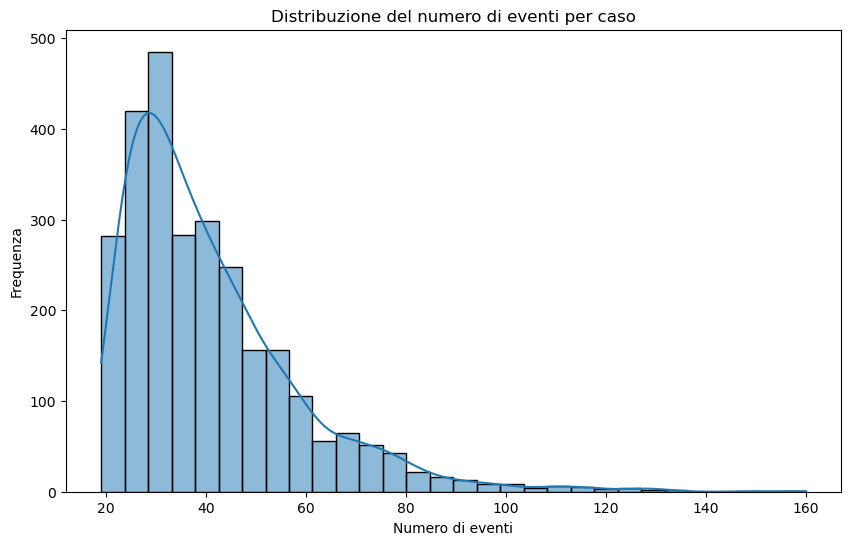

In [42]:
plt.figure(figsize=(10,6))
sns.histplot(lengths_series, bins=30, kde=True)
plt.title('Distribuzione del numero di eventi per caso')
plt.xlabel('Numero di eventi')
plt.ylabel('Frequenza')
plt.show()

In [43]:
import pandas as pd

# Hai già lengths_series con la lunghezza delle sequenze per ogni caso
q1 = lengths_series.quantile(0.25)
q3 = lengths_series.quantile(0.75)

print(f"25° percentile (Q1): {q1}")
print(f"75° percentile (Q3): {q3}")

# Segmentazione
segment_labels = []
for length in lengths_series:
    if length <= q1:
        segment_labels.append('short')
    elif length <= q3:
        segment_labels.append('medium')
    else:
        segment_labels.append('long')

# Aggiungiamo i segmenti a un DataFrame per avere tutto insieme
segments_df = pd.DataFrame({
    'case_id': case_activities.index,
    'length': lengths_series,
    'segment': segment_labels
})

print(segments_df['segment'].value_counts())


25° percentile (Q1): 28.0
75° percentile (Q3): 49.0
segment
medium    1412
short      702
long       630
Name: count, dtype: int64


reti di petri per vedere questo su tutto il DF W COmplete 

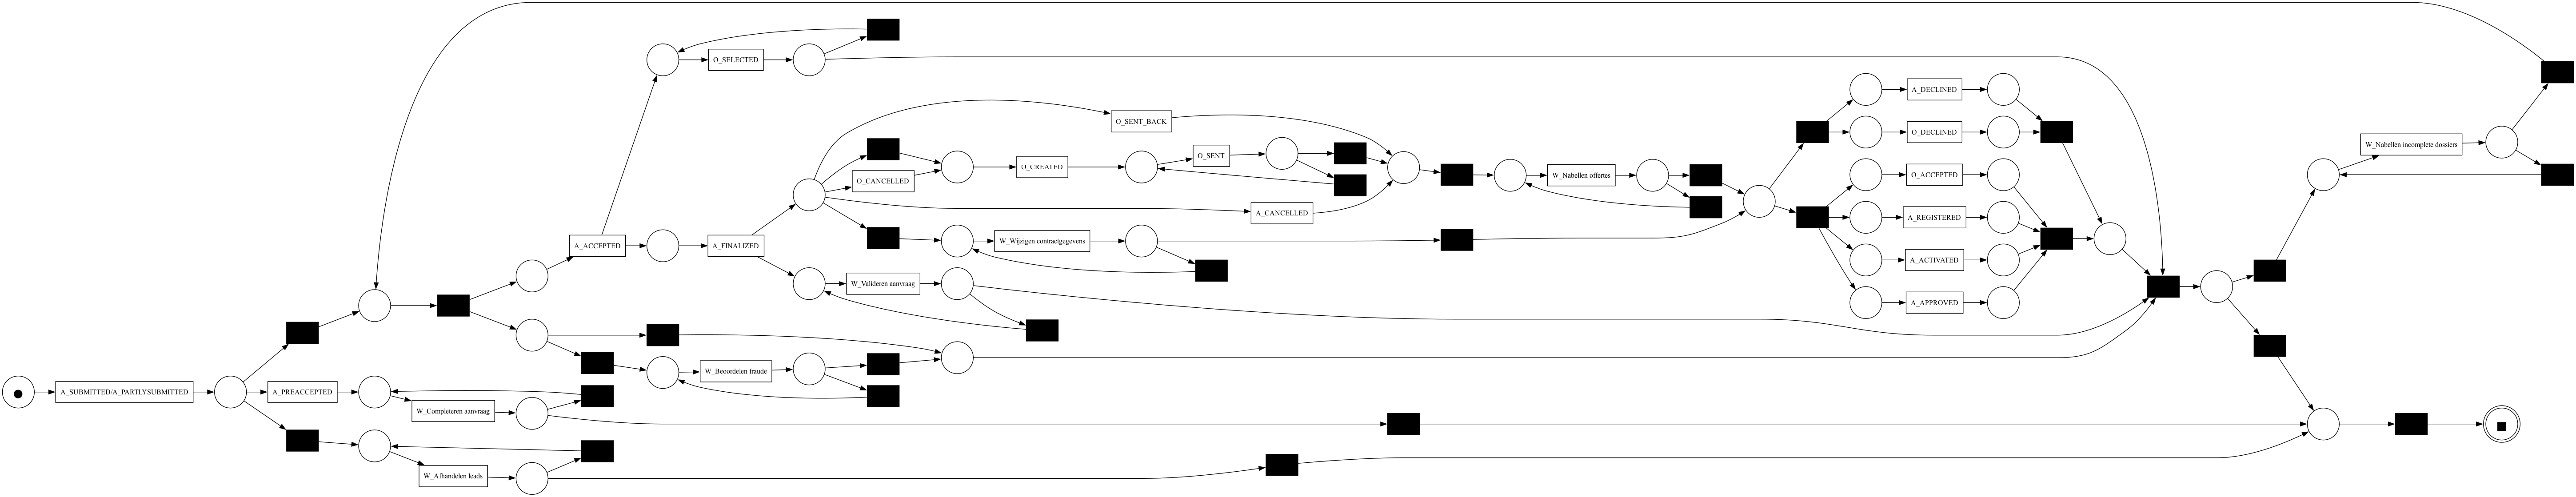

In [335]:
net, im, fm = pm4py.discover_petri_net_inductive(df_W_complete,noise_threshold=0.9)
pm4py.view_petri_net(net, im, fm, format='png')

suddivido ancora il df in due cosi ho i quelli corti e quelli lunghi 

In [45]:
import pandas as pd

# Hai già lengths_series con la lunghezza delle sequenze per ogni caso
q1 = lengths_series.quantile(0.25)
q3 = lengths_series.quantile(0.75)

print(f"25° percentile (Q1): {q1}")
print(f"75° percentile (Q3): {q3}")

# Segmentazione
segment_labels = []
for length in lengths_series:
    if length <= q1:
        segment_labels.append('short')
    elif length <= q3:
        segment_labels.append('medium')
    else:
        segment_labels.append('long')

# Aggiungiamo i segmenti a un DataFrame per avere tutto insieme
segments_df = pd.DataFrame({
    'case_id': case_activities.index,
    'length': lengths_series,
    'segment': segment_labels
})

print(segments_df['segment'].value_counts())


25° percentile (Q1): 28.0
75° percentile (Q3): 49.0
segment
medium    1412
short      702
long       630
Name: count, dtype: int64


In [46]:
case_activities = df_W_complete.groupby('case:concept:name')['concept:name'].apply(list)


In [47]:
import pandas as pd

# lengths_series è la serie con le lunghezze delle sequenze
q1 = lengths_series.quantile(0.25)
q3 = lengths_series.quantile(0.75)

# Indici dei casi corti e lunghi
short_cases_idx = lengths_series[lengths_series <= q1].index
long_cases_idx = lengths_series[lengths_series >= q3].index

print(f"Casi corti: {len(short_cases_idx)}")
print(f"Casi lunghi: {len(long_cases_idx)}")

# Puoi ora filtrare il tuo df_W_complete
short_cases_df = df_W_complete[df_W_complete['case:concept:name'].isin(case_activities.index[short_cases_idx])]
long_cases_df = df_W_complete[df_W_complete['case:concept:name'].isin(case_activities.index[long_cases_idx])]



Casi corti: 702
Casi lunghi: 689


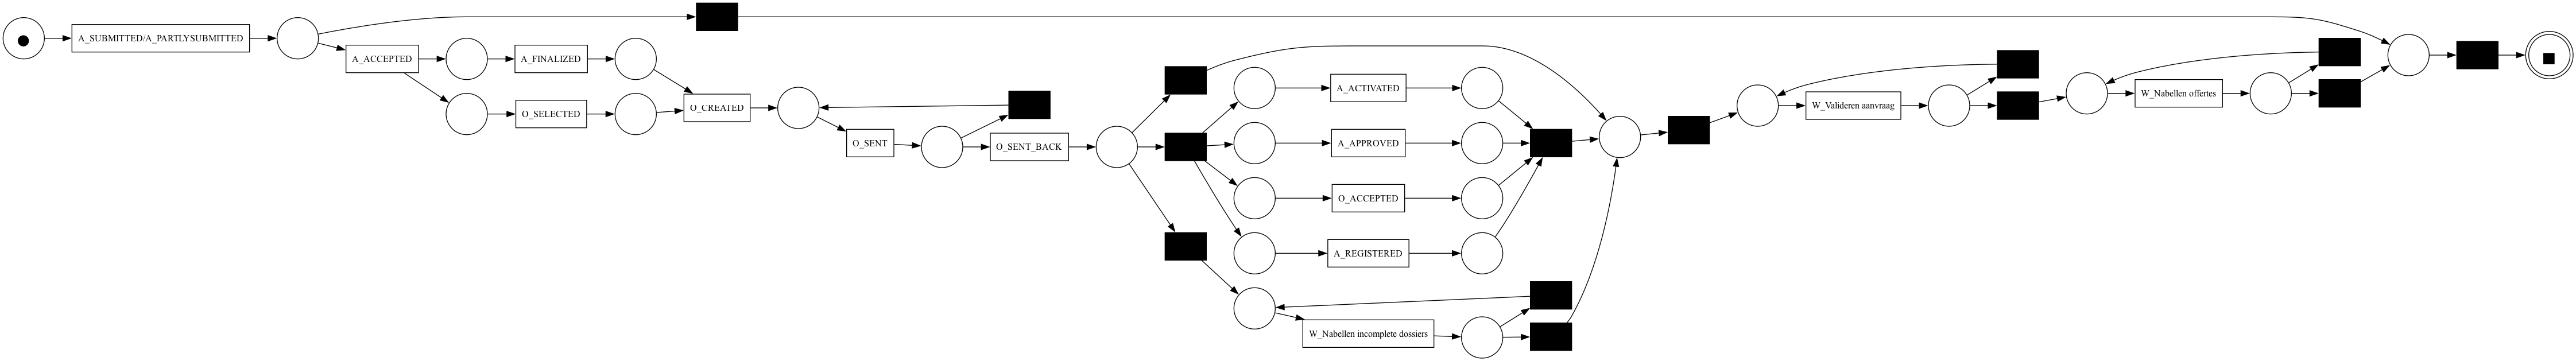

In [48]:
net, im, fm = pm4py.discover_petri_net_inductive(short_cases_df, noise_threshold=0.9)
pm4py.view_petri_net(net, im, fm, format='png')

In [49]:
from collections import Counter
attivita_visibili = [t.label for t in net.transitions if t.label not in [None, ""]]

# Colonna delle attività dal log, tutte maiuscole
attivita_log = short_cases_df['concept:name'].str.upper()
attivita_visibili = [a.upper() for a in attivita_visibili]

# Conta solo quelle presenti anche nella rete
frequenze = Counter(a for a in attivita_log if a in attivita_visibili)

# Ordina per frequenza decrescente
short_frequenze_ordinate = dict(sorted(frequenze.items(), key=lambda x: x[1], reverse=True))

# Stampa
for attivita, freq in short_frequenze_ordinate.items():
    print(f"{attivita}: {freq}")


W_NABELLEN OFFERTES: 3517
W_VALIDEREN AANVRAAG: 2522
O_SELECTED: 715
O_CREATED: 715
O_SENT: 715
A_SUBMITTED/A_PARTLYSUBMITTED: 702
A_ACCEPTED: 702
A_FINALIZED: 702
O_SENT_BACK: 702
A_REGISTERED: 455
A_APPROVED: 455
O_ACCEPTED: 455
A_ACTIVATED: 455
W_NABELLEN INCOMPLETE DOSSIERS: 26


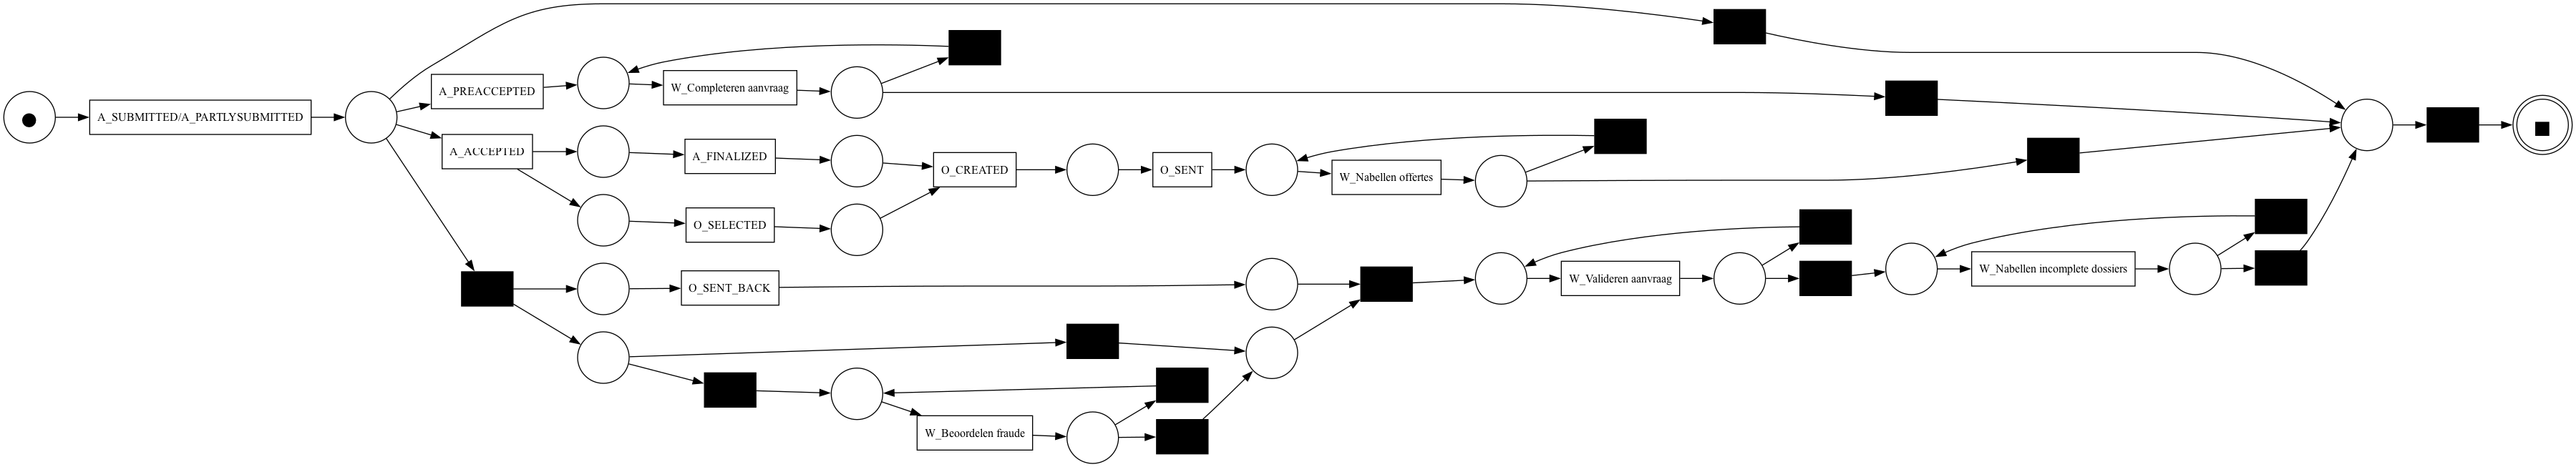

In [337]:
net, im, fm = pm4py.discover_petri_net_inductive(long_cases_df,noise_threshold=0.9)
pm4py.view_petri_net(net, im, fm, format='png')

In [51]:
from collections import Counter
attivita_visibili = [t.label for t in net.transitions if t.label not in [None, ""]]

# Colonna delle attività dal log, tutte maiuscole
attivita_log = long_cases_df['concept:name'].str.upper()
attivita_visibili = [a.upper() for a in attivita_visibili]

# Conta solo quelle presenti anche nella rete
frequenze = Counter(a for a in attivita_log if a in attivita_visibili)

# Ordina per frequenza decrescente
long_frequenze_ordinate = dict(sorted(frequenze.items(), key=lambda x: x[1], reverse=True))

# Stampa
for attivita, freq in long_frequenze_ordinate.items():
    print(f"{attivita}: {freq}")

W_NABELLEN INCOMPLETE DOSSIERS: 12557
W_NABELLEN OFFERTES: 8451
W_VALIDEREN AANVRAAG: 7315
W_COMPLETEREN AANVRAAG: 5050
O_SELECTED: 1284
O_CREATED: 1284
O_SENT: 1284
O_SENT_BACK: 852
A_SUBMITTED/A_PARTLYSUBMITTED: 689
A_PREACCEPTED: 689
A_ACCEPTED: 689
A_FINALIZED: 689
W_BEOORDELEN FRAUDE: 75


In [52]:
# Indici dei casi medi
middle_cases_idx = lengths_series[(lengths_series > q1) & (lengths_series < q3)].index

print(f"Casi medi: {len(middle_cases_idx)}")

# Filtra il DataFrame per i casi medi
middle_cases_df = df_W_complete[df_W_complete['case:concept:name'].isin(case_activities.index[middle_cases_idx])]


Casi medi: 1353


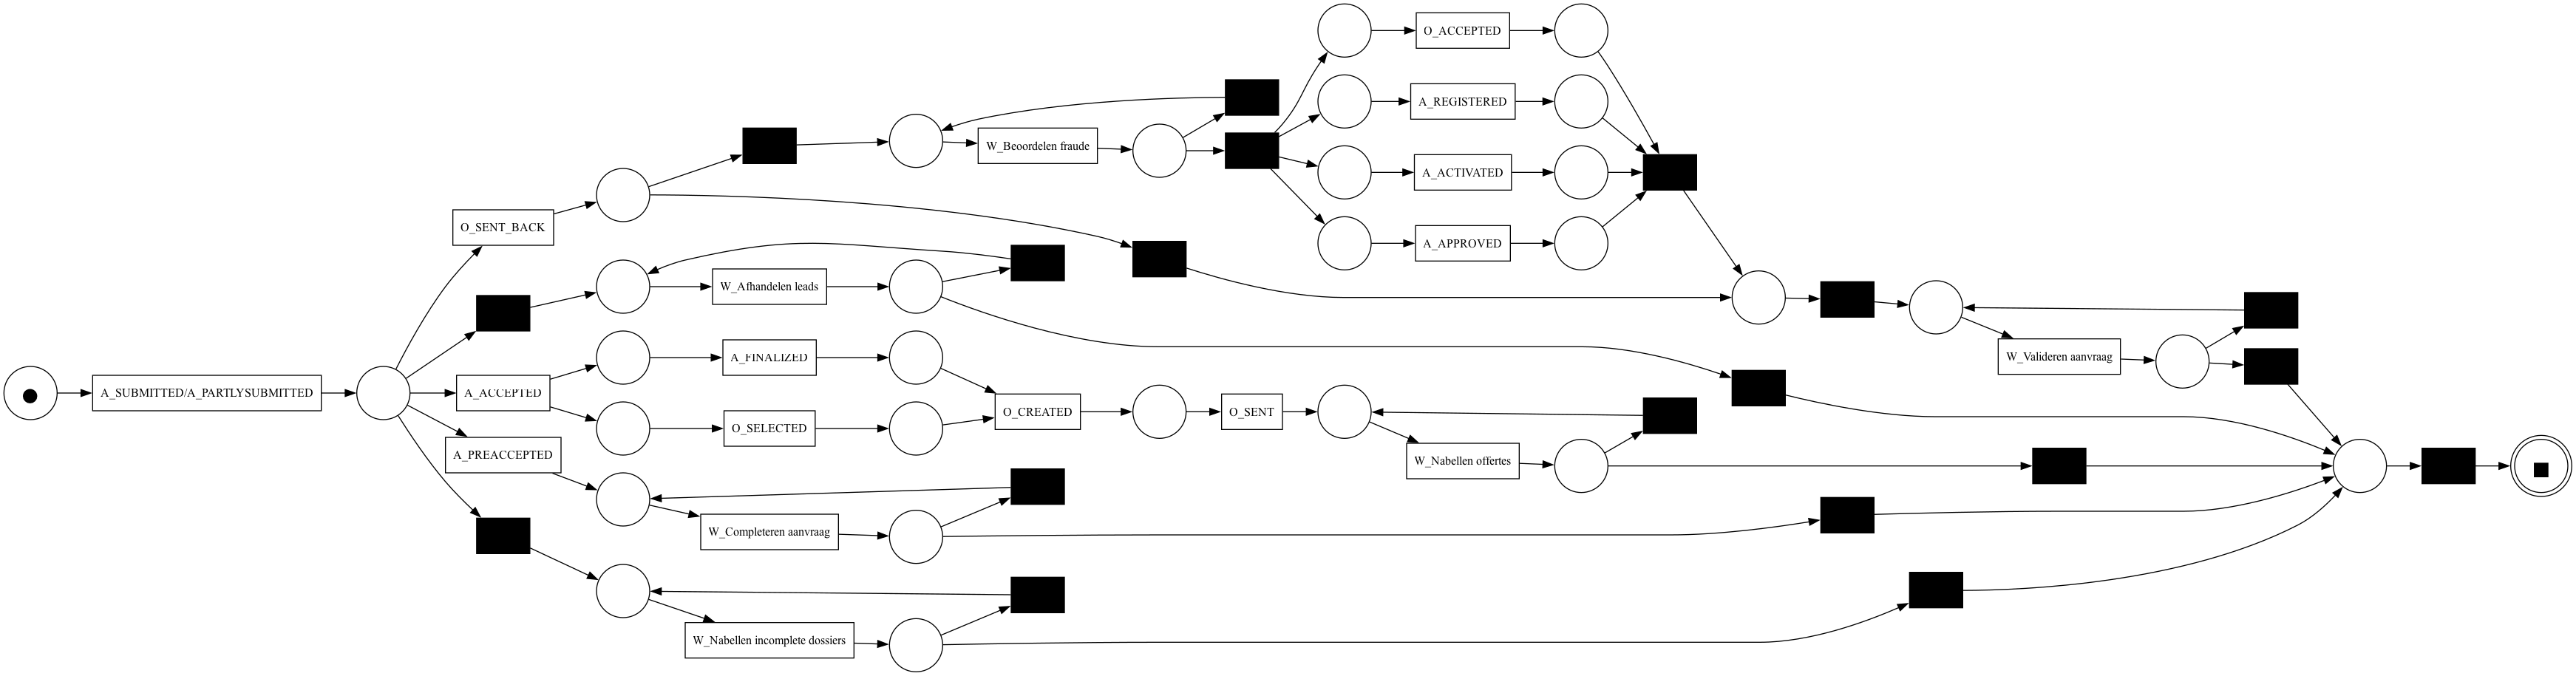

In [336]:
net, im, fm = pm4py.discover_petri_net_inductive(middle_cases_df,noise_threshold=0.9)
pm4py.view_petri_net(net, im, fm, format='png')

In [54]:
from collections import Counter
attivita_visibili = [t.label for t in net.transitions if t.label not in [None, ""]]

# Colonna delle attività dal log, tutte maiuscole
attivita_log = middle_cases_df['concept:name'].str.upper()
attivita_visibili = [a.upper() for a in attivita_visibili]

# Conta solo quelle presenti anche nella rete
frequenze = Counter(a for a in attivita_log if a in attivita_visibili)

# Ordina per frequenza decrescente
middle_frequenze_ordinate = dict(sorted(frequenze.items(), key=lambda x: x[1], reverse=True))

# Stampa
for attivita, freq in middle_frequenze_ordinate.items():
    print(f"{attivita}: {freq}")

W_NABELLEN OFFERTES: 11388
W_VALIDEREN AANVRAAG: 8065
W_COMPLETEREN AANVRAAG: 7381
W_NABELLEN INCOMPLETE DOSSIERS: 4716
O_SELECTED: 1696
O_CREATED: 1696
O_SENT: 1696
W_AFHANDELEN LEADS: 1419
O_SENT_BACK: 1372
A_SUBMITTED/A_PARTLYSUBMITTED: 1353
A_PREACCEPTED: 1353
A_ACCEPTED: 1353
A_FINALIZED: 1353
A_APPROVED: 1029
A_REGISTERED: 1029
A_ACTIVATED: 1029
O_ACCEPTED: 1028
W_BEOORDELEN FRAUDE: 36


descriptive analysis 

<Figure size 1500x600 with 0 Axes>

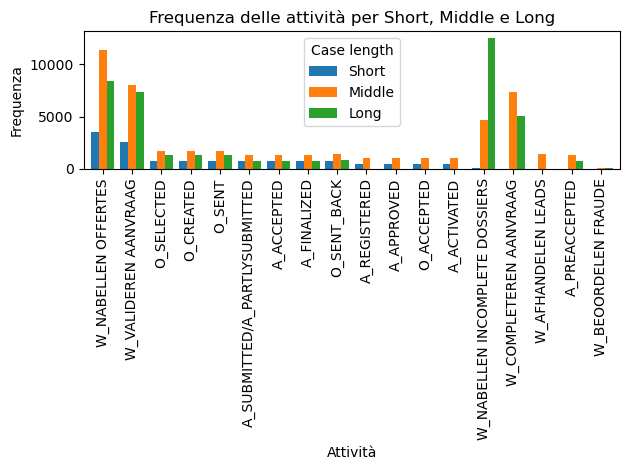

In [55]:
import pandas as pd

# Esempio: supponiamo che tu abbia anche short_frequenze_ordinate e long_frequenze_ordinate
middle_series = pd.Series(middle_frequenze_ordinate, name="Middle")
short_series = pd.Series(short_frequenze_ordinate, name="Short")
long_series = pd.Series(long_frequenze_ordinate, name="Long")
df_all = pd.concat([short_series, middle_series, long_series], axis=1).fillna(0).astype(int)
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
df_all.plot(kind='bar', width=0.8)
plt.title('Frequenza delle attività per Short, Middle e Long')
plt.ylabel('Frequenza')
plt.xlabel('Attività')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title="Case length")
plt.show()


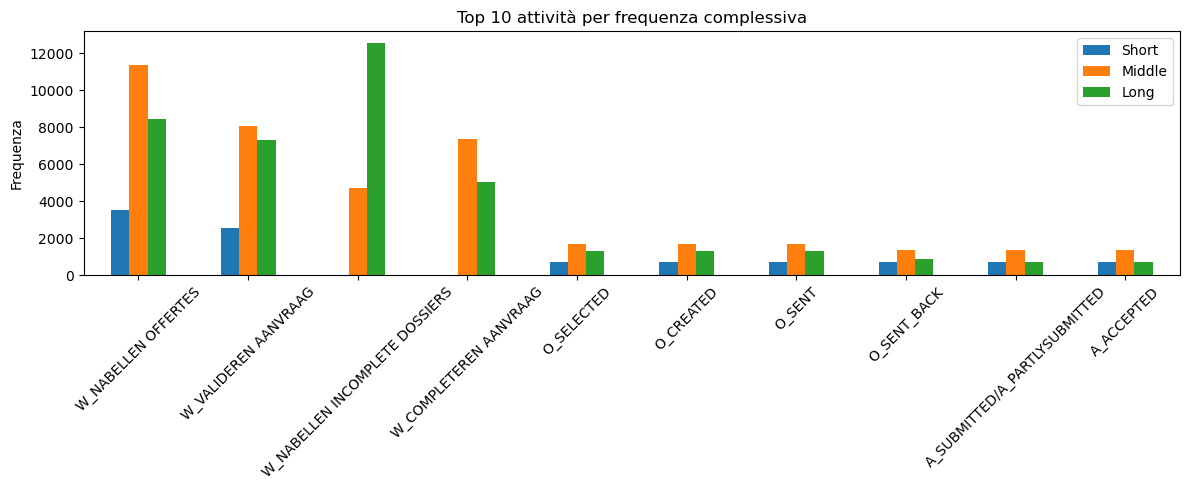

In [56]:
top_activities = df_all.sum(axis=1).sort_values(ascending=False).head(10).index
df_top = df_all.loc[top_activities]

df_top.plot(kind='bar', figsize=(12,5))
plt.title("Top 10 attività per frequenza complessiva")
plt.ylabel("Frequenza")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

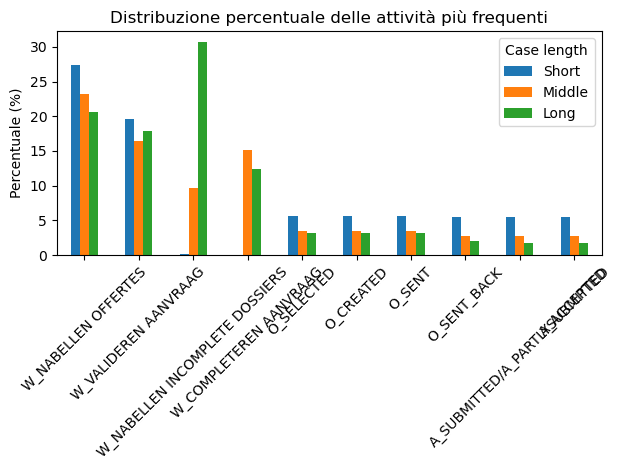

In [57]:
# Calcolo percentuale per ciascuna colonna
df_percentuali = df_all.div(df_all.sum(axis=0), axis=1) * 100
top_attivita = df_all.sum(axis=1).sort_values(ascending=False).head(10).index
df_percentuali_top = df_percentuali.loc[top_attivita]
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df_percentuali_top.plot(kind='bar')
plt.title("Distribuzione percentuale delle attività più frequenti")
plt.ylabel("Percentuale (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Case length")
plt.show()


si vede che cmq i colli di bottiglia e dalle reti di petri anche con i cicli sono queste attivita che si ripetono tantissime volte 

In [132]:
durate_long['tipo'] = 'long'
durate_middle['tipo'] = 'middle'
durate_short['tipo'] = 'short'

durate_tot = pd.concat([durate_long, durate_middle, durate_short], ignore_index=True)


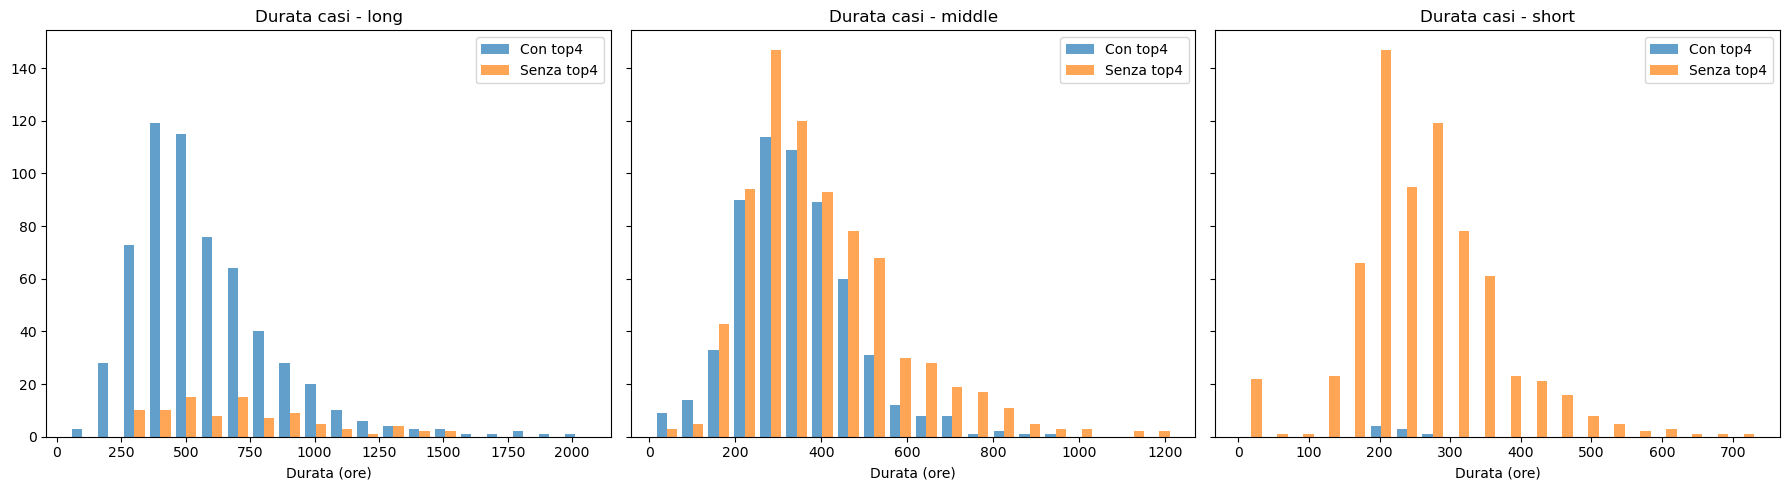

In [338]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
tipi = ['long', 'middle', 'short']

for i, tipo in enumerate(tipi):
    dati = durate_tot[durate_tot['tipo'] == tipo]
    axs[i].hist([dati[dati['top4_presenti']]['duration'].dt.total_seconds()/3600,
                 dati[~dati['top4_presenti']]['duration'].dt.total_seconds()/3600],
                bins=20, label=['Con top4', 'Senza top4'], alpha=0.7)
    axs[i].set_title(f'Durata casi - {tipo}')
    axs[i].set_xlabel('Durata (ore)')
    axs[i].legend()

plt.tight_layout()
plt.show()


  case:concept:name case:AMOUNT_REQ  tipo
0            173718           15000  long
1            173718           15000  long
2            173718           15000  long
3            173718           15000  long
4            173718           15000  long


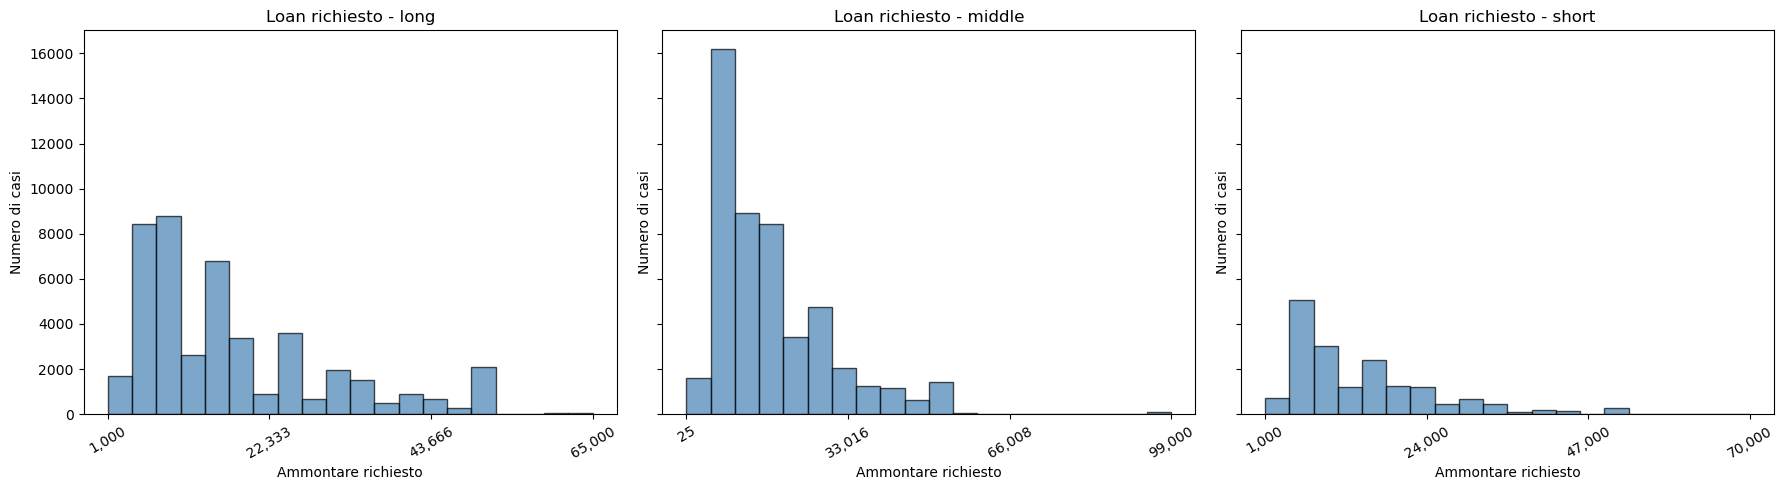

In [144]:
# Step 1: Prendi solo le colonne che ti servono
long_info = long_cases_df[['case:concept:name', 'case:AMOUNT_REQ']].copy()
long_info['tipo'] = 'long'

middle_info = middle_cases_df[['case:concept:name', 'case:AMOUNT_REQ']].copy()
middle_info['tipo'] = 'middle'

short_info = short_cases_df[['case:concept:name', 'case:AMOUNT_REQ']].copy()
short_info['tipo'] = 'short'

# Step 2: Unisci tutti i dati
cases_amount_df = pd.concat([long_info, middle_info, short_info], ignore_index=True)
print(cases_amount_df.head())

# Trasforma 'case:AMOUNT_REQ' in numerico forzando errori a NaN
cases_amount_df['case:AMOUNT_REQ'] = pd.to_numeric(cases_amount_df['case:AMOUNT_REQ'], errors='coerce')
import matplotlib.pyplot as plt
import numpy as np

tipi = ['long', 'middle', 'short']
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, tipo in enumerate(tipi):
    dati = cases_amount_df[cases_amount_df['tipo'] == tipo]['case:AMOUNT_REQ'].dropna()

    min_val = dati.min()
    max_val = dati.max()
    tick_vals = np.linspace(min_val, max_val, 4)
    tick_labels = [f'{int(val):,}' for val in tick_vals]

    axs[i].hist(dati, bins=20, color='steelblue', edgecolor='black', alpha=0.7)
    axs[i].set_title(f'Loan richiesto - {tipo}')
    axs[i].set_xlabel('Ammontare richiesto')
    axs[i].set_xticks(tick_vals)
    axs[i].set_xticklabels(tick_labels, rotation=30)
    axs[i].set_ylabel('Numero di casi')

plt.tight_layout()
plt.show()



nel grafico si vede che cmq le durate dei casi non dipende dalle attivita top 4 , infatti i casi cmq durano poco rispetto a quelli senza top 4,

Nei grafici che ti ho proposto:
"Con top4" indica i casi che contengono tutte e quattro le attività più frequenti (W_Nabellen offertes, W_Valideren aanvraag, W_Nabellen incomplete dossiers, W_Completeren aanvraag).
"Senza top4" indica i casi che non hanno tutte e quattro queste attività contemporaneamente (possono averne alcune, nessuna o meno di quattro)

bisognerebbe capire quali sono le attivita che usamo piu tempo ma non ho end activity quindi dicaimo che lo calcolo facendo end attivity conme il successivo, vero che non è proprio sensato ma si vuole vedere solo 

analizzo le attivita 

In [135]:
def durata_media_attività(df, case_id_col='case:concept:name', timestamp_col='time:timestamp', activity_col='concept:name'):
    # Ordina per caso e timestamp
    df_sorted = df.sort_values(by=[case_id_col, timestamp_col])
    
    # Calcola durata tra un'attività e la successiva nello stesso caso
    df_sorted['next_timestamp'] = df_sorted.groupby(case_id_col)[timestamp_col].shift(-1)
    df_sorted['duration'] = df_sorted['next_timestamp'] - df_sorted[timestamp_col]
    
    # Rimuovi righe con durata nulla o mancante (ultimo evento)
    df_valid = df_sorted.dropna(subset=['duration'])
    
    # Calcola durata media per attività
    durata_media = df_valid.groupby(activity_col)['duration'].mean().sort_values(ascending=False)
    
    return durata_media


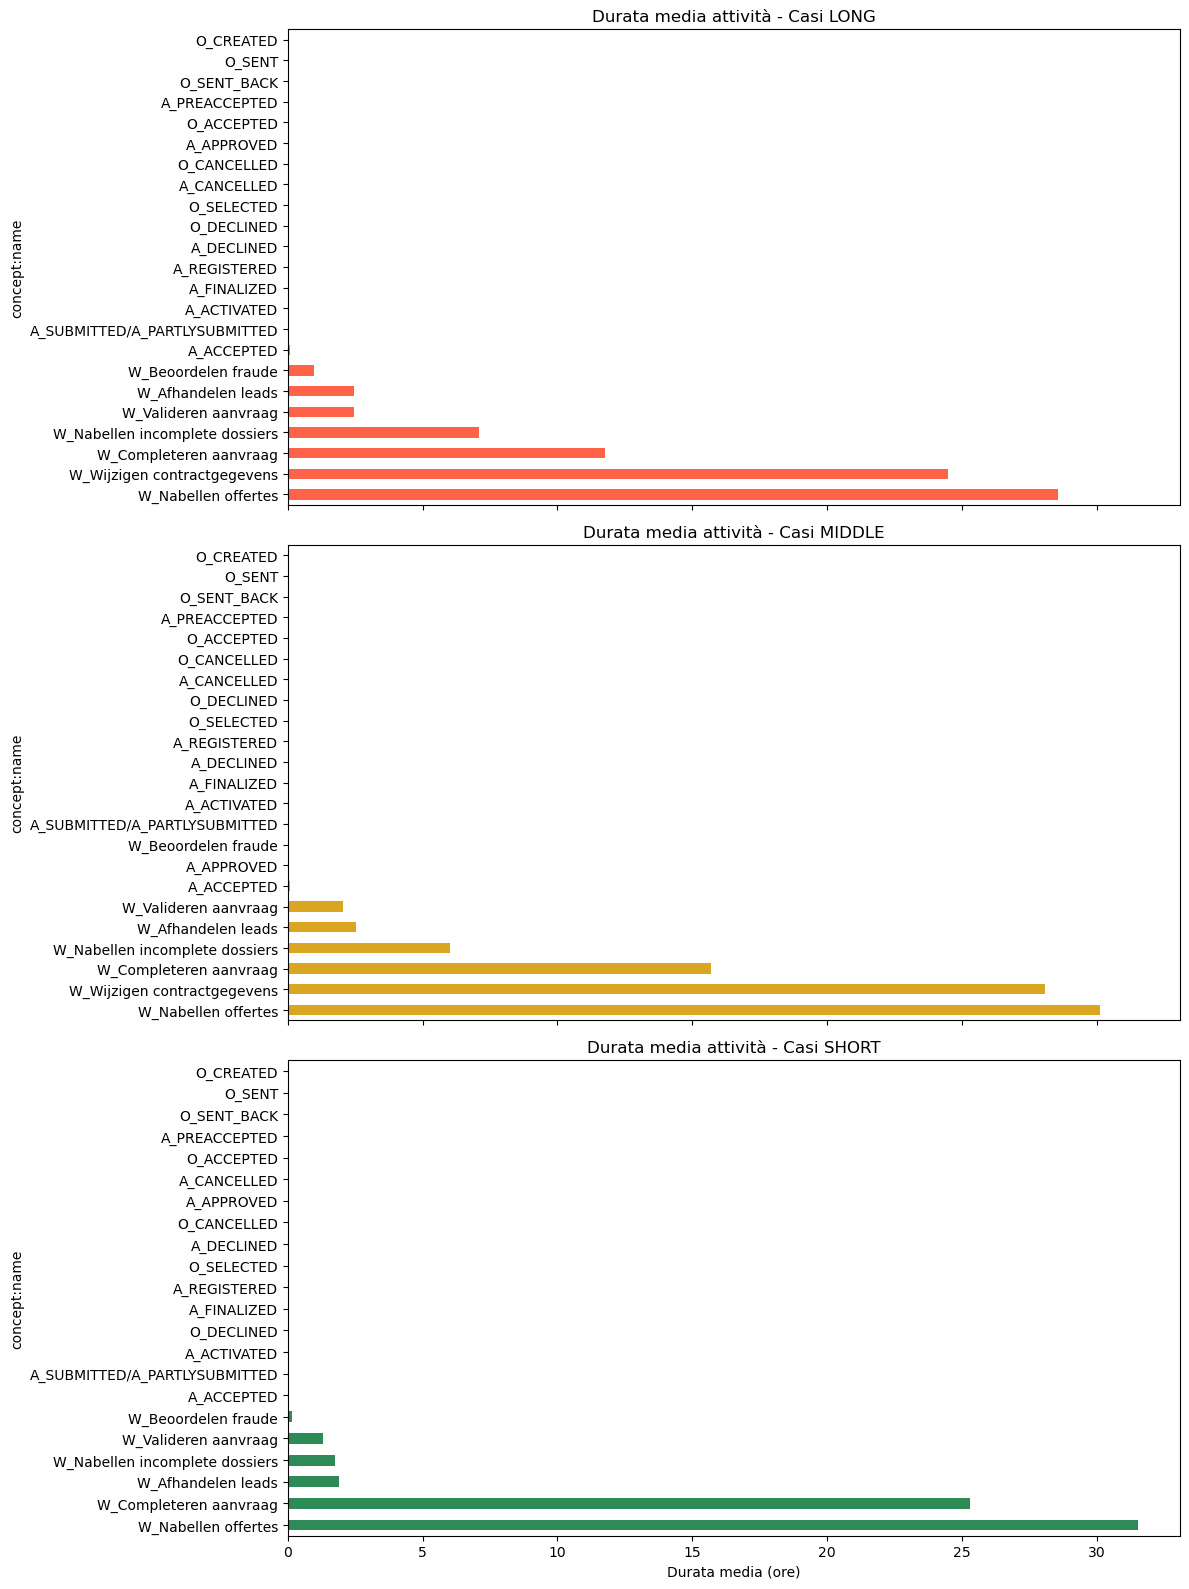

In [136]:
import matplotlib.pyplot as plt

# Applica la funzione
durate_long = durata_media_attività(long_cases_df)
durate_middle = durata_media_attività(middle_cases_df)
durate_short = durata_media_attività(short_cases_df)

# Plot separati
fig, axes = plt.subplots(3, 1, figsize=(12, 16), sharex=True)

durate_long.dt.total_seconds().div(3600).plot(kind='barh', ax=axes[0], color='tomato')
axes[0].set_title("Durata media attività - Casi LONG")
axes[0].set_xlabel("Durata media (ore)")

durate_middle.dt.total_seconds().div(3600).plot(kind='barh', ax=axes[1], color='goldenrod')
axes[1].set_title("Durata media attività - Casi MIDDLE")
axes[1].set_xlabel("Durata media (ore)")

durate_short.dt.total_seconds().div(3600).plot(kind='barh', ax=axes[2], color='seagreen')
axes[2].set_title("Durata media attività - Casi SHORT")
axes[2].set_xlabel("Durata media (ore)")

plt.tight_layout()
plt.show()


In [165]:
def calcola_tempi(df):
    import pandas as pd
    
    # Ordina per case, attività e timestamp
    df_sorted = df.sort_values(by=['case:concept:name', 'concept:name', 'lifecycle:transition', 'time:timestamp'])
    
    # Prendi solo colonne rilevanti
    df_sorted = df_sorted[['case:concept:name', 'concept:name', 'lifecycle:transition', 'time:timestamp']]
    
    # Pivot: crea colonne per ogni lifecycle transition (SCHEDULE, START, COMPLETE)
    df_pivot = df_sorted.pivot_table(index=['case:concept:name', 'concept:name'],
                                     columns='lifecycle:transition',
                                     values='time:timestamp',
                                     aggfunc='first').reset_index()
    
    # Calcola waiting time: START - SCHEDULE (se SCHEDULE esiste)
    df_pivot['waiting_time'] = df_pivot['START'] - df_pivot['SCHEDULE']
    
    # Calcola execution time: COMPLETE - START
    df_pivot['execution_time'] = df_pivot['COMPLETE'] - df_pivot['START']
    
    # Per i casi senza SCHEDULE, waiting_time diventa 0
    df_pivot['waiting_time'] = df_pivot['waiting_time'].fillna(pd.Timedelta(seconds=0))
    
    # Calcola total_time (waiting + execution)
    df_pivot['total_time'] = df_pivot['waiting_time'] + df_pivot['execution_time']
    
    # Converti in minuti (float)
    df_pivot['waiting_time_min'] = df_pivot['waiting_time'].dt.total_seconds() / 60
    df_pivot['execution_time_min'] = df_pivot['execution_time'].dt.total_seconds() / 60
    df_pivot['total_time_min'] = df_pivot['total_time'].dt.total_seconds() / 60
    
    # Rinomina colonne per chiarezza
    df_pivot.rename(columns={'case:concept:name': 'case_id', 'concept:name': 'activity'}, inplace=True)
    
    # Restituisci solo le colonne necessarie
    return df_pivot[['case_id', 'activity', 'waiting_time_min', 'execution_time_min', 'total_time_min']]


In [166]:
tempi_long = calcola_tempi(long_cases_df)
tempi_middle = calcola_tempi(middle_cases_df)
tempi_short = calcola_tempi(short_cases_df)


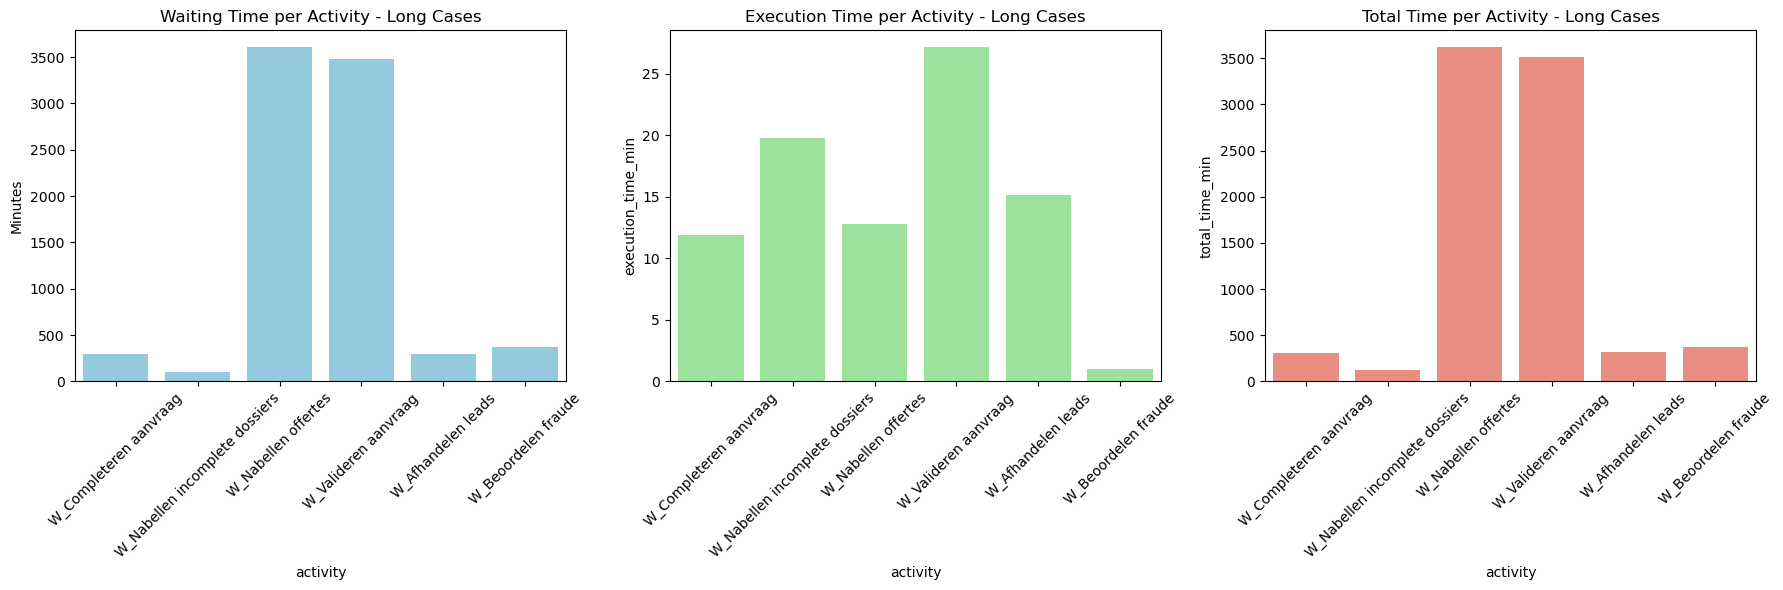

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copia e pulizia dati (per evitare problemi con NaN)
df = tempi_long.copy()
df = df.dropna(subset=['activity', 'waiting_time_min', 'execution_time_min', 'total_time_min'])

# Setup figure con 3 subplot affiancati
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Waiting time
sns.barplot(data=df, x='activity', y='waiting_time_min', errorbar=None, color='skyblue', ax=axs[0])
axs[0].set_title('Waiting Time per Activity - Long Cases')
axs[0].set_ylabel('Minutes')
axs[0].tick_params(axis='x', rotation=45)

# Execution time
sns.barplot(data=df, x='activity', y='execution_time_min', errorbar=None, color='lightgreen', ax=axs[1])
axs[1].set_title('Execution Time per Activity - Long Cases')
axs[1].tick_params(axis='x', rotation=45)

# Total time
sns.barplot(data=df, x='activity', y='total_time_min', errorbar=None, color='salmon', ax=axs[2])
axs[2].set_title('Total Time per Activity - Long Cases')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


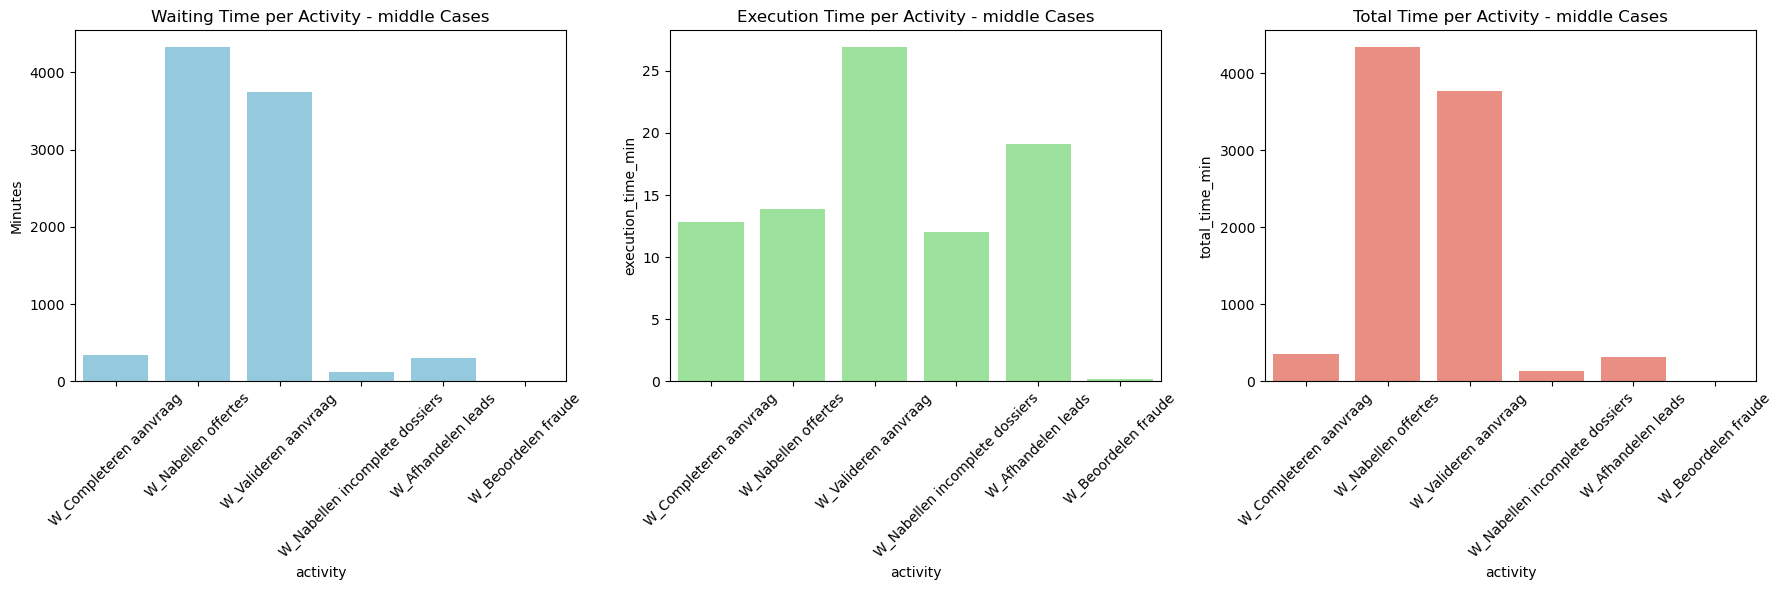

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copia e pulizia dati (per evitare problemi con NaN)
df = tempi_middle.copy()
df = df.dropna(subset=['activity', 'waiting_time_min', 'execution_time_min', 'total_time_min'])

# Setup figure con 3 subplot affiancati
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Waiting time
sns.barplot(data=df, x='activity', y='waiting_time_min', errorbar=None, color='skyblue', ax=axs[0])
axs[0].set_title('Waiting Time per Activity - middle Cases')
axs[0].set_ylabel('Minutes')
axs[0].tick_params(axis='x', rotation=45)

# Execution time
sns.barplot(data=df, x='activity', y='execution_time_min', errorbar=None, color='lightgreen', ax=axs[1])
axs[1].set_title('Execution Time per Activity - middle Cases')
axs[1].tick_params(axis='x', rotation=45)

# Total time
sns.barplot(data=df, x='activity', y='total_time_min', errorbar=None, color='salmon', ax=axs[2])
axs[2].set_title('Total Time per Activity - middle Cases')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


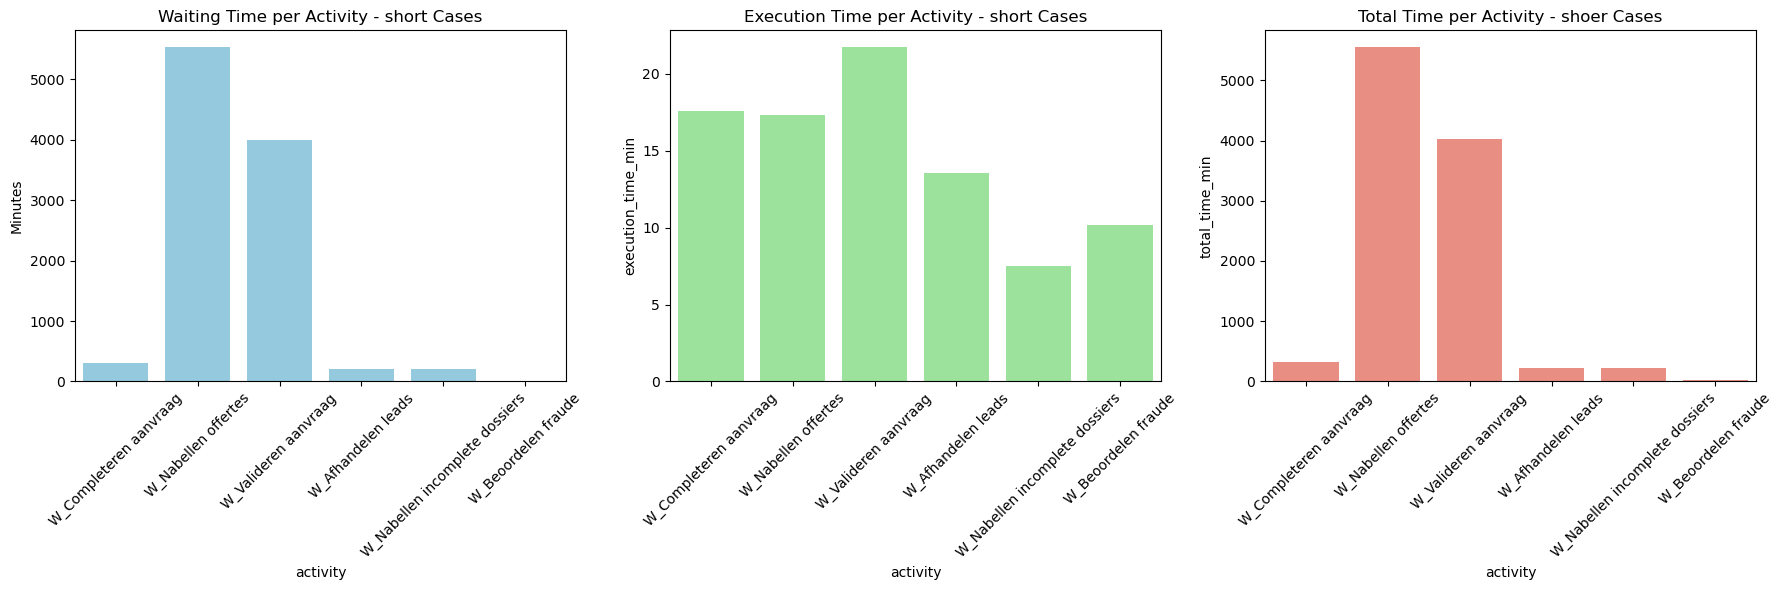

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copia e pulizia dati (per evitare problemi con NaN)
df = tempi_short.copy()
df = df.dropna(subset=['activity', 'waiting_time_min', 'execution_time_min', 'total_time_min'])

# Setup figure con 3 subplot affiancati
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Waiting time
sns.barplot(data=df, x='activity', y='waiting_time_min', errorbar=None, color='skyblue', ax=axs[0])
axs[0].set_title('Waiting Time per Activity - short Cases')
axs[0].set_ylabel('Minutes')
axs[0].tick_params(axis='x', rotation=45)

# Execution time
sns.barplot(data=df, x='activity', y='execution_time_min', errorbar=None, color='lightgreen', ax=axs[1])
axs[1].set_title('Execution Time per Activity - short Cases')
axs[1].tick_params(axis='x', rotation=45)

# Total time
sns.barplot(data=df, x='activity', y='total_time_min', errorbar=None, color='salmon', ax=axs[2])
axs[2].set_title('Total Time per Activity - shoer Cases')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [189]:
def plot_tempi_vs_amount(tempi_df, label=''):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np

    if 'amount_req' not in tempi_df.columns:
        raise KeyError(f"[{label}] 'amount_req' non presente!")

    print(f"[{label}] Colonne in tempi_df:", tempi_df.columns.tolist())
    print(f"[{label}] Prime righe 'amount_req':", tempi_df['amount_req'].dropna().unique()[:5])

    # Forza tipo numerico
    tempi_df['amount_req'] = pd.to_numeric(tempi_df['amount_req'], errors='coerce')

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    tempi = ['waiting_time_min', 'execution_time_min', 'total_time_min']
    titoli = ['Waiting Time', 'Execution Time', 'Total Time']

    for i, tempo in enumerate(tempi):
        sns.scatterplot(data=tempi_df, x='amount_req', y=tempo, ax=axs[i], alpha=0.6, color='teal')
        axs[i].set_title(f'{titoli[i]} vs Loan Amount Requested')
        axs[i].set_xlabel('Loan Amount Requested')
        axs[i].set_ylabel('Time (min)')

        tick_vals = np.linspace(tempi_df['amount_req'].min(), tempi_df['amount_req'].max(), 4)
        axs[i].set_xticks(tick_vals)
        axs[i].set_xticklabels([f'{int(x):,}' for x in tick_vals], rotation=45, ha='right')

    plt.tight_layout()
    plt.show()
    return tempi_df


[Long] Colonne in tempi_df: ['case_id', 'activity', 'waiting_time_min', 'execution_time_min', 'total_time_min', 'amount_req']
[Long] Prime righe 'amount_req': [15000  5000 50000 33000 26000]


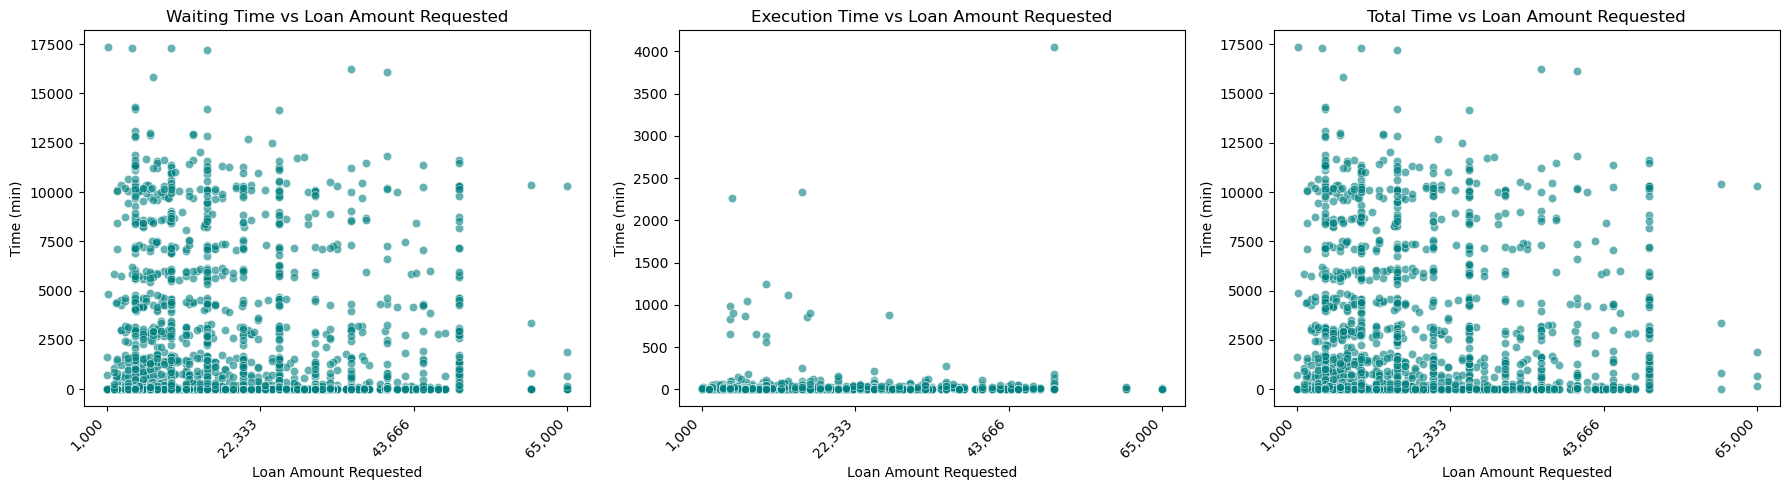

[Middle] Colonne in tempi_df: ['case_id', 'activity', 'waiting_time_min', 'execution_time_min', 'total_time_min', 'amount_req']
[Middle] Prime righe 'amount_req': [ 5000 10000  6000 15500  7000]


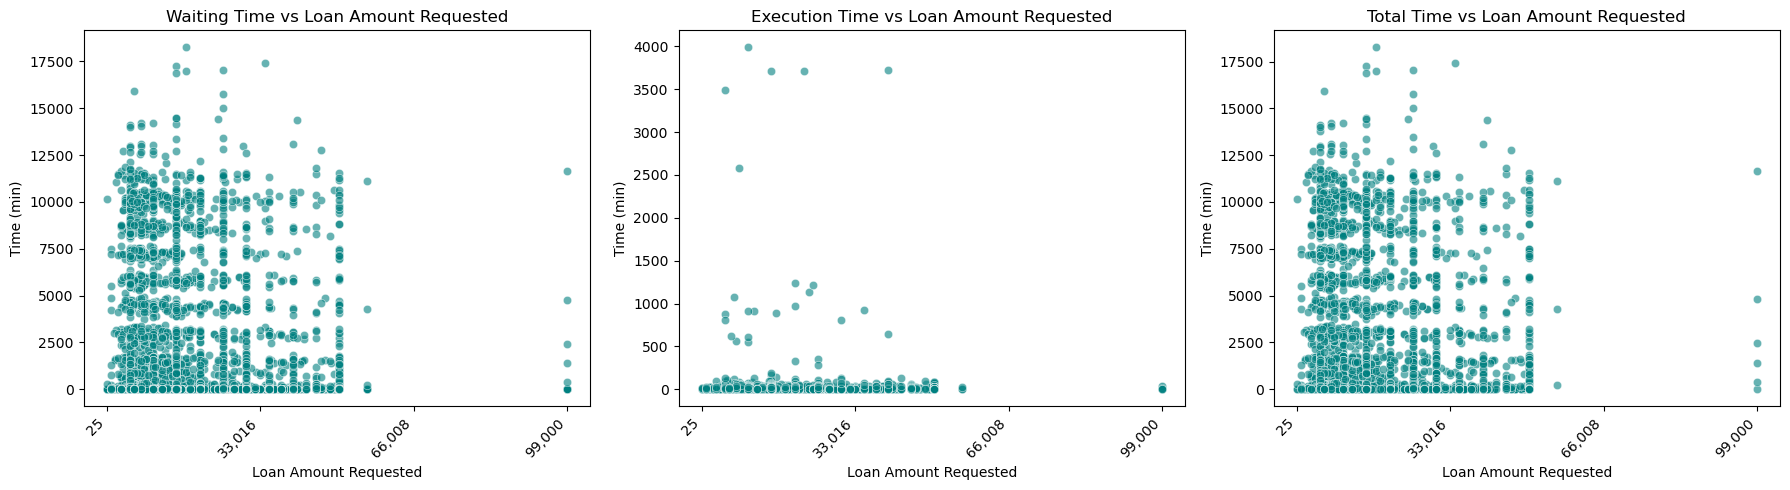

[Short] Colonne in tempi_df: ['case_id', 'activity', 'waiting_time_min', 'execution_time_min', 'total_time_min', 'amount_req']
[Short] Prime righe 'amount_req': [20000 45000 10000 32000  5000]


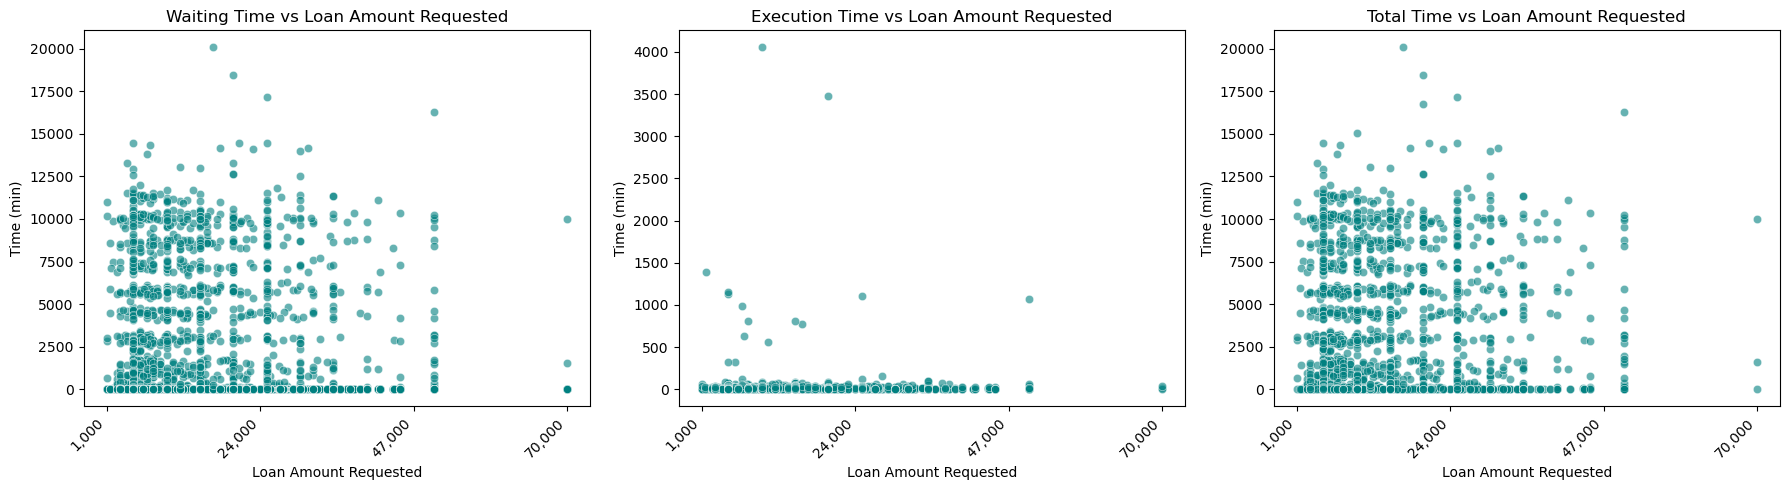

In [190]:
tempi_long = plot_tempi_vs_amount(tempi_long, label='Long')
tempi_middle = plot_tempi_vs_amount(tempi_middle, label='Middle')
tempi_short = plot_tempi_vs_amount(tempi_short, label='Short')


Rosso = correlazione positiva forte
Blu = correlazione negativa
Bianco = assenza di correlazione

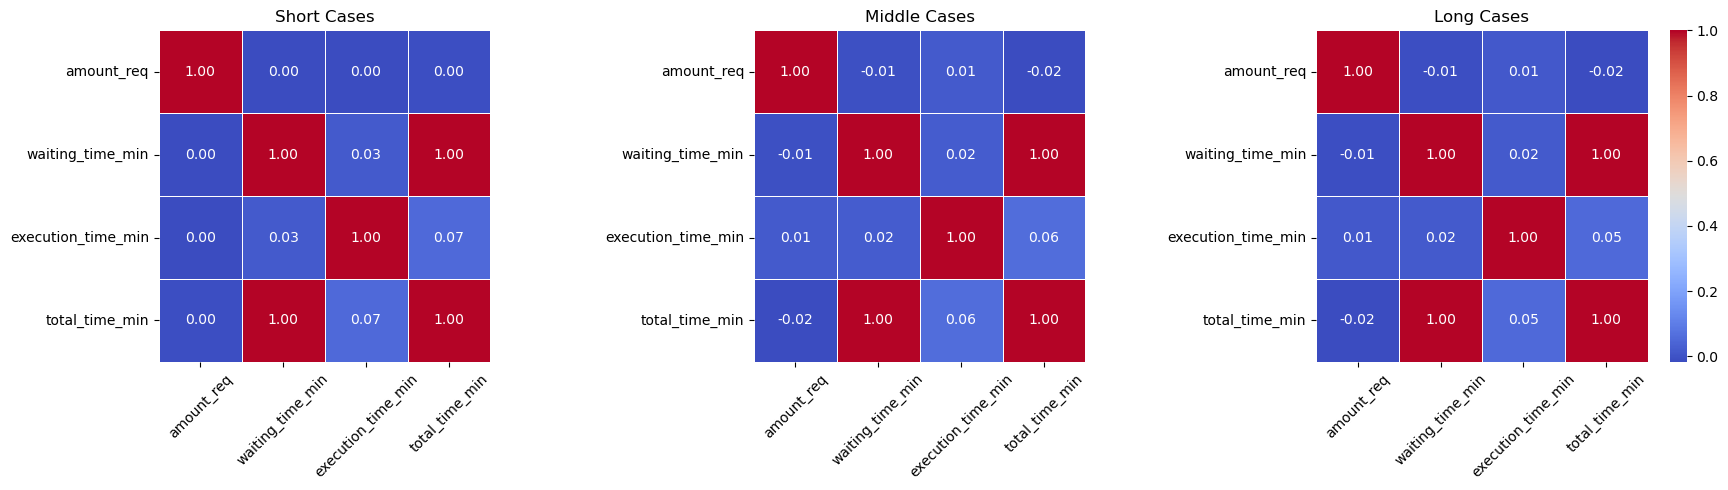

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcolo delle matrici di correlazione
corr_short = tempi_short[['amount_req', 'waiting_time_min', 'execution_time_min', 'total_time_min']].corr()
corr_middle = tempi_middle[['amount_req', 'waiting_time_min', 'execution_time_min', 'total_time_min']].corr()
corr_long = tempi_long[['amount_req', 'waiting_time_min', 'execution_time_min', 'total_time_min']].corr()

# Set grafico
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Lista di dati e titoli
correlazioni = [corr_short, corr_middle, corr_long]
titoli = ['Short Cases', 'Middle Cases', 'Long Cases']

# Generazione heatmap
for i, (corr, titolo) in enumerate(zip(correlazioni, titoli)):
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True,
                cbar=(i == 2), ax=axs[i], linewidths=0.5)
    axs[i].set_title(titolo)
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()


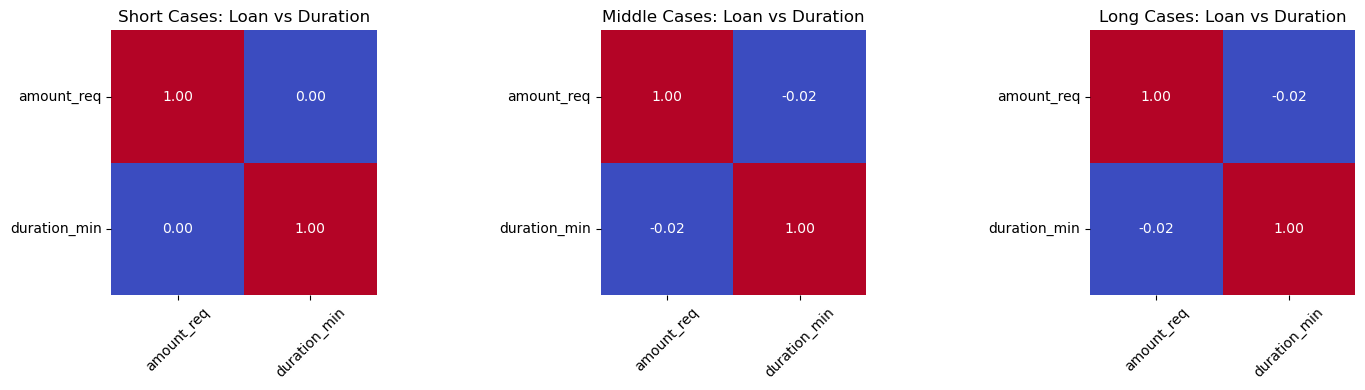

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

# Se non hai già una colonna in minuti/ore, aggiungila così (esempio in minuti):
tempi_short['duration_min'] = tempi_short['total_time_min']
tempi_middle['duration_min'] = tempi_middle['total_time_min']
tempi_long['duration_min'] = tempi_long['total_time_min']

# Calcolo correlazioni: solo amount_req e durata
corr_short_dur = tempi_short[['amount_req', 'duration_min']].corr()
corr_middle_dur = tempi_middle[['amount_req', 'duration_min']].corr()
corr_long_dur = tempi_long[['amount_req', 'duration_min']].corr()

# Grafico heatmap
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

for ax, corr, label in zip(axs, [corr_short_dur, corr_middle_dur, corr_long_dur], ['Short', 'Middle', 'Long']):
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=False, ax=ax)
    ax.set_title(f"{label} Cases: Loan vs Duration")
    ax.tick_params(rotation=45, axis='x')
    ax.tick_params(rotation=0, axis='y')

plt.tight_layout()
plt.show()


conformace checking 

In [347]:
import pm4py.algo.conformance.alignments as align_mod
print(dir(align_mod))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'decomposed', 'dfg', 'petri_net', 'process_tree']


In [348]:
from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments_algorithm


In [354]:
def compute_fitness(trace):
    missing = trace.get('missing_tokens', 0)
    consumed = trace.get('consumed_tokens', 0)
    remaining = trace.get('remaining_tokens', 0)
    produced = missing + consumed
    if produced == 0 or consumed == 0:
        return 0
    fitness = 0.5 * ((1 - missing / produced) + (1 - remaining / consumed))
    return fitness

def replay_and_summarize(df, net, initial_marking, final_marking):
    replayed_traces = token_replay.apply(df, net, initial_marking, final_marking)
    fitness_values = [compute_fitness(trace) for trace in replayed_traces]
    avg_fitness = sum(fitness_values) / len(fitness_values) if fitness_values else 0

    total_missing_tokens = sum(trace.get('missing_tokens', 0) for trace in replayed_traces)
    total_consumed_tokens = sum(trace.get('consumed_tokens', 0) for trace in replayed_traces)
    total_remaining_tokens = sum(trace.get('remaining_tokens', 0) for trace in replayed_traces)

    return {
        "average_fitness": avg_fitness,
        "total_missing_tokens": total_missing_tokens,
        "total_consumed_tokens": total_consumed_tokens,
        "total_remaining_tokens": total_remaining_tokens,
        "total_traces": len(replayed_traces)
    }

# Esempio di uso
results_long = replay_and_summarize(long_cases_df, net, initial_marking, final_marking)
results_middle = replay_and_summarize(middle_cases_df, net, initial_marking, final_marking)
results_short = replay_and_summarize(short_cases_df, net, initial_marking, final_marking)

print("Conformance results - Long cases:", results_long)
print("Conformance results - Middle cases:", results_middle)
print("Conformance results - Short cases:", results_short)


replaying log with TBR, completed traces ::   0%|          | 0/689 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/1301 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/430 [00:00<?, ?it/s]

Conformance results - Long cases: {'average_fitness': 0.8998140534878606, 'total_missing_tokens': 7546, 'total_consumed_tokens': 71153, 'total_remaining_tokens': 6932, 'total_traces': 689}
Conformance results - Middle cases: {'average_fitness': 0.8780920908046894, 'total_missing_tokens': 9340, 'total_consumed_tokens': 71867, 'total_remaining_tokens': 8985, 'total_traces': 1353}
Conformance results - Short cases: {'average_fitness': 0.8507667153946245, 'total_missing_tokens': 3564, 'total_consumed_tokens': 22579, 'total_remaining_tokens': 3549, 'total_traces': 702}


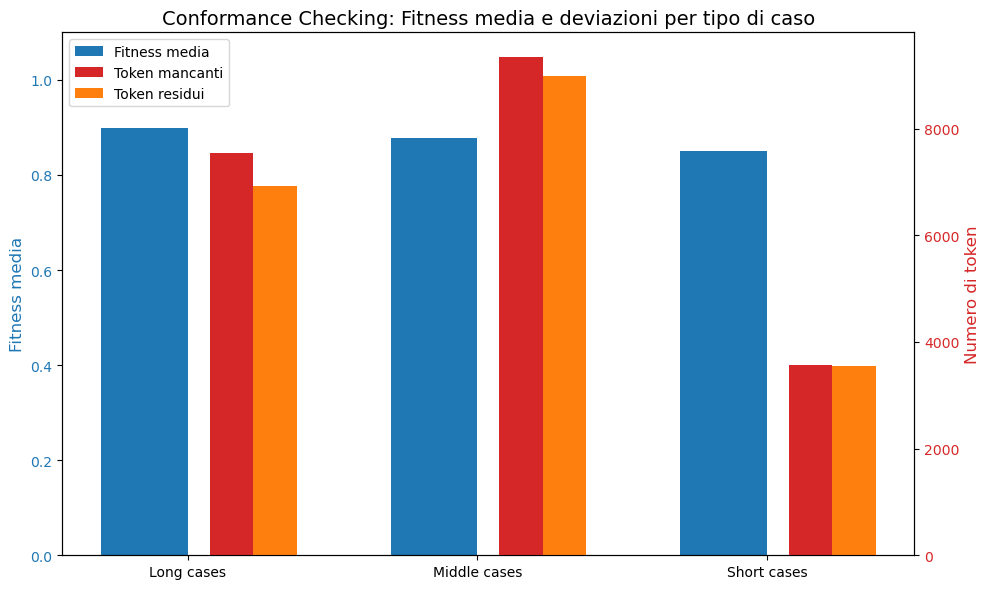

In [355]:
import matplotlib.pyplot as plt
import numpy as np

# Dati
categories = ['Long cases', 'Middle cases', 'Short cases']
average_fitness = [0.8998, 0.8781, 0.8508]
missing_tokens = [7546, 9340, 3564]
remaining_tokens = [6932, 8985, 3549]

x = np.arange(len(categories))
width = 0.3

fig, ax1 = plt.subplots(figsize=(10,6))

# Grafico fitness media (asse Y sinistro)
bar1 = ax1.bar(x - width/2, average_fitness, width, color='tab:blue', label='Fitness media')
ax1.set_ylabel('Fitness media', color='tab:blue', fontsize=12)
ax1.set_ylim(0, 1.1)
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Grafico token mancanti e residui (asse Y destro)
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, missing_tokens, width/2, color='tab:red', label='Token mancanti')
bar3 = ax2.bar(x + width, remaining_tokens, width/2, color='tab:orange', label='Token residui')
ax2.set_ylabel('Numero di token', color='tab:red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='tab:red')

# Legenda combinata
bars = [bar1, bar2, bar3]
labels = [b.get_label() for b in bars]
ax1.legend(bars, labels, loc='upper left')

plt.title('Conformance Checking: Fitness media e deviazioni per tipo di caso', fontsize=14)
plt.tight_layout()
plt.show()


inizio a lavorare con il df_AO_dc

In [156]:

df_AO_dc


org:resource lifecycle:transition                   concept:name  \
121             112             COMPLETE  A_SUBMITTED/A_PARTLYSUBMITTED   
122             112             COMPLETE                     A_DECLINED   
123             112             COMPLETE  A_SUBMITTED/A_PARTLYSUBMITTED   
124             112             COMPLETE                     A_DECLINED   
146             112             COMPLETE  A_SUBMITTED/A_PARTLYSUBMITTED   
...             ...                  ...                            ...   
247897          112             COMPLETE                     A_DECLINED   
247908          112             COMPLETE  A_SUBMITTED/A_PARTLYSUBMITTED   
247909          112             COMPLETE                     A_DECLINED   
248045          112             COMPLETE  A_SUBMITTED/A_PARTLYSUBMITTED   
248046          112             COMPLETE                     A_DECLINED   

                         time:timestamp                    case:REG_DATE  \
121    2011-10-01 08:11:09.035000+00:00 2011-10-01 08:11:08.865000+00:00   
122    2011-10-01 08:11:46.420000+00:00 2011-10-01 08:11:08.865000+00:00   
123    2011-10-01 08:15:40.102000+00:00 2011-10-01 08:15:39.894000+00:00   
124    2011-10-01 08:16:21.037000+00:00 2011-10-01 08:15:39.894000+00:00   
146    2011-10-01 09:57:43.182000+00:00 2011-10-01 09:57:42.994000+00:00   
...                                 ...                              ...   
247897 2012-02-29 21:59:11.823000+00:00 2012-02-29 21:58:27.936000+00:00   
247908 2012-02-29 22:11:18.173000+00:00 2012-02-29 22:11:17.954000+00:00   
247909 2012-02-29 22:11:53.624000+00:00 2012-02-29 22:11:17.954000+00:00   
248045 2012-02-29 23:28:41.198000+00:00 2012-02-29 23:28:41.098000+00:00   
248046 2012-02-29 23:29:21.958000+00:00 2012-02-29 23:28:41.098000+00:00   

       case:concept:name case:AMOUNT_REQ  
121               173697           15000  
122               173697           15000  
123               173700            5000  
124               173700            5000  
146               173709           11000  
...                  ...             ...  
247897            214331            5000  
247908            214340            8000  
247909            214340            8000  
248045            214367             500  
248046            214367             500  

[39828 rows x 7 columns]

In [157]:
last_activity_per_case = df_AO_dc.groupby('case:concept:name').agg(
    last_activity=('concept:name', 'last'),
    last_transition=('lifecycle:transition', 'last')
).reset_index()

print("\nLast activity and timestamp for each case in df_W_complete:")
last_activity_per_case


Last activity and timestamp for each case in df_W_complete:


case:concept:name last_activity last_transition
0               173697    A_DECLINED        COMPLETE
1               173700    A_DECLINED        COMPLETE
2               173709   A_CANCELLED        COMPLETE
3               173727    A_DECLINED        COMPLETE
4               173757    A_DECLINED        COMPLETE
...                ...           ...             ...
4448            214316    A_DECLINED        COMPLETE
4449            214328    A_DECLINED        COMPLETE
4450            214331    A_DECLINED        COMPLETE
4451            214340    A_DECLINED        COMPLETE
4452            214367    A_DECLINED        COMPLETE

[4453 rows x 3 columns]

volevo vedere se non finivano  con complete per eliminare i casi non necessari,, ma finiscono tutti con complete 


In [160]:
# Group by case and get the last event and its timestamp
last_activity_per_case = df_AO_dc.groupby('case:concept:name').agg(
    last_activity=('concept:name', 'last'),
    last_transition=('lifecycle:transition', 'last')
).reset_index()

last_activity_per_case["last_transition"].unique()

array(['COMPLETE'], dtype=object)

analizziamo

In [224]:
df = df_AO_dc

In [225]:
print("Numero di casi:", df['case:concept:name'].nunique())
print("Eventi totali:", len(df))
print("Numero di classi di eventi uniche:", df['concept:name'].nunique())

Numero di casi: 4453
Eventi totali: 39828
Numero di classi di eventi uniche: 17


In [237]:
import pm4py

df_declined = pm4py.filter_end_activities(df_merged, ["A_DECLINED"])
df_cancelled = pm4py.filter_end_activities(df_merged, ["A_CANCELLED"])
df_o_cancelled = pm4py.filter_end_activities(df_merged, ["O_CANCELLED"])


In [238]:
case_size_declined = df_declined.groupby('case:concept:name').size()
case_size_cancelled = df_cancelled.groupby('case:concept:name').size()
case_size_o_cancelled = df_o_cancelled.groupby('case:concept:name').size()


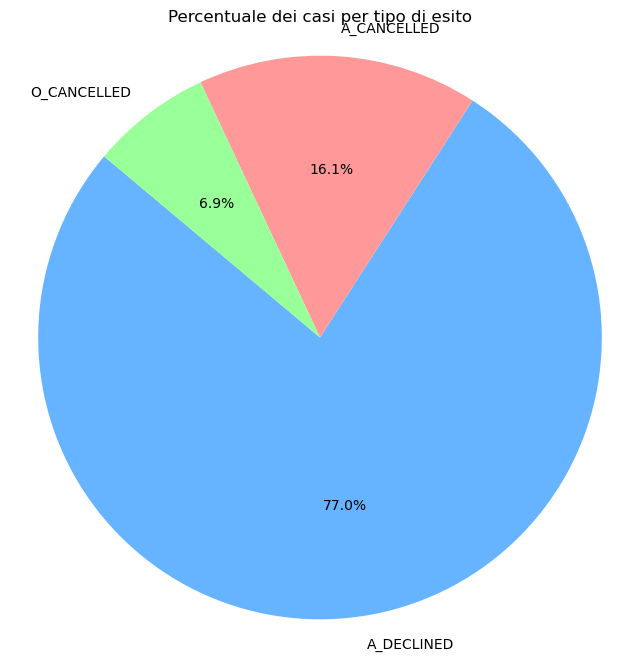

In [241]:
import matplotlib.pyplot as plt

# Conta dei casi unici per ogni dataframe
count_declined = df_declined['case:concept:name'].nunique()
count_cancelled = df_cancelled['case:concept:name'].nunique()
count_o_cancelled = df_o_cancelled['case:concept:name'].nunique()

# Dati per il grafico
counts = [ count_declined, count_cancelled, count_o_cancelled]
labels = [ 'A_DECLINED', 'A_CANCELLED', 'O_CANCELLED']

# Grafico a torta
plt.figure(figsize=(8,8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999','#99ff99','#ffcc99'])
plt.title('Percentuale dei casi per tipo di esito')
plt.axis('equal')  # Per rendere la torta circolare
plt.show()


statistica descrittiva

In [250]:
import pandas as pd

def descriptive_stats(df_filtered, df_original, label):
    # 1. Lista case_id nel df filtrato
    cases = df_filtered['case:concept:name'].unique()
    # 2. Prendo tutti gli eventi di quei case_id dal df originale
    events = df_original[df_original['case:concept:name'].isin(cases)].copy()
    events['time:timestamp'] = pd.to_datetime(events['time:timestamp'])
    # 3. Calcolo durata per ogni caso
    duration = events.groupby('case:concept:name').agg(
        start_time=('time:timestamp', 'min'),
        end_time=('time:timestamp', 'max')
    ).reset_index()
    duration['duration_hours'] = (duration['end_time'] - duration['start_time']).dt.total_seconds() / 3600
    
    # Statistica descrittiva durata
    stats = duration['duration_hours'].describe(percentiles=[0.25, 0.5, 0.75])
    
    print(f"Statistiche durata casi per {label}:")
    print(f"Numero casi: {len(cases)}")
    print(stats)
    print("\n---\n")

# Eseguiamo per ogni gruppo
descriptive_stats(df_declined, df_merged, "A_DECLINED")
descriptive_stats(df_cancelled, df_merged, "A_CANCELLED")
descriptive_stats(df_o_cancelled, df_merged, "O_CANCELLED")


Statistiche durata casi per A_DECLINED:
Numero casi: 3429
count    3429.000000
mean        0.010555
std         0.002716
min         0.000459
25%         0.009469
50%         0.010392
75%         0.011525
max         0.033202
Name: duration_hours, dtype: float64

---

Statistiche durata casi per A_CANCELLED:
Numero casi: 716
count     716.000000
mean      767.467406
std       175.436268
min         0.806939
25%       733.885757
50%       738.896564
75%       743.213259
max      2193.926334
Name: duration_hours, dtype: float64

---

Statistiche durata casi per O_CANCELLED:
Numero casi: 308
count     308.000000
mean      814.540255
std       205.871726
min        66.864784
25%       739.101195
50%       755.503075
75%       802.826739
max      1714.764883
Name: duration_hours, dtype: float64

---



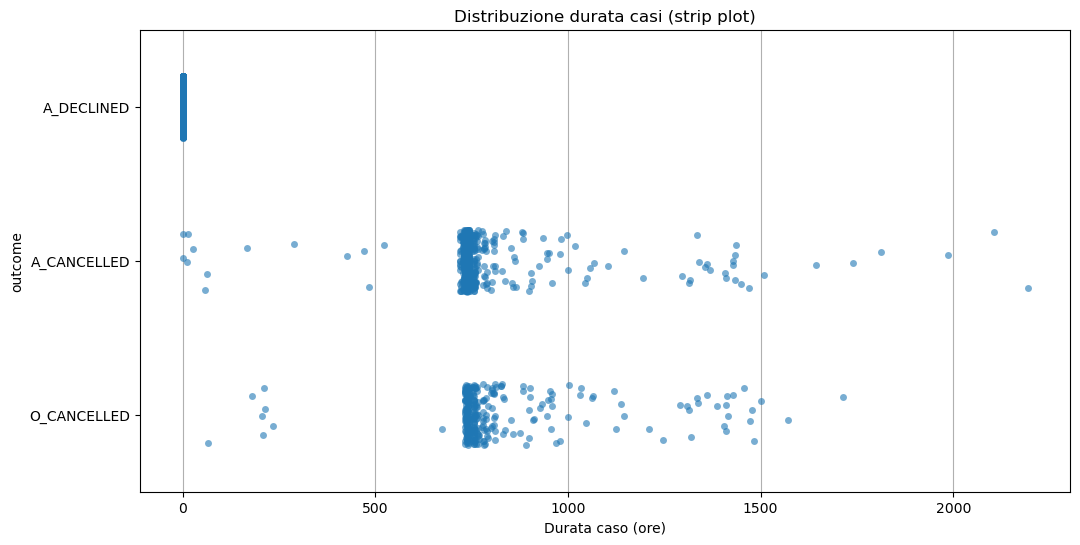

In [252]:
import seaborn as sns
import pandas as pd

# Prepara dataframe per seaborn
df_rug = pd.concat([
    pd.DataFrame({'duration': durations_declined, 'outcome': 'A_DECLINED'}),
    pd.DataFrame({'duration': durations_cancelled, 'outcome': 'A_CANCELLED'}),
    pd.DataFrame({'duration': durations_o_cancelled, 'outcome': 'O_CANCELLED'}),
])

plt.figure(figsize=(12,6))
sns.stripplot(data=df_rug, x='duration', y='outcome', jitter=0.2, size=5, alpha=0.6)

plt.xlabel('Durata caso (ore)')
plt.title('Distribuzione durata casi (strip plot)')
plt.grid(axis='x')
plt.show()


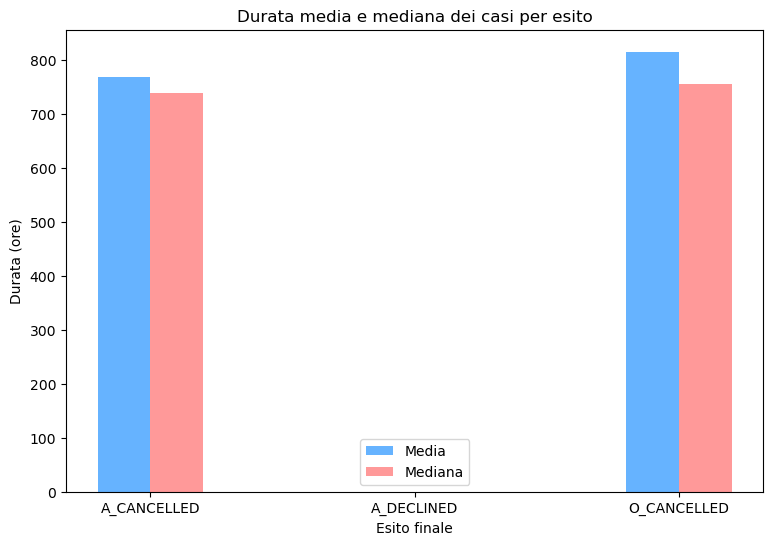

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compute_case_duration(df, label):
    df = df.copy()  # <-- crea una copia esplicita
    df['time:timestamp'] = pd.to_datetime(df['time:timestamp'])
    case_dur = df.groupby('case:concept:name').agg(
        start_time=('time:timestamp', 'min'),
        end_time=('time:timestamp', 'max')
    ).reset_index()
    case_dur['duration_hours'] = (case_dur['end_time'] - case_dur['start_time']).dt.total_seconds() / 3600
    case_dur['outcome'] = label
    return case_dur[['case:concept:name', 'duration_hours', 'outcome']]


durations = pd.concat([dur_approved, dur_declined, dur_cancelled, dur_o_cancelled])

summary = durations.groupby('outcome')['duration_hours'].agg(['mean', 'median']).reset_index()

plt.figure(figsize=(9,6))
bar_width = 0.2
index = np.arange(len(summary))

plt.bar(index, summary['mean'], bar_width, label='Media', color='#66b3ff')
plt.bar(index + bar_width, summary['median'], bar_width, label='Mediana', color='#ff9999')

plt.xlabel('Esito finale')
plt.ylabel('Durata (ore)')
plt.title('Durata media e mediana dei casi per esito')
plt.xticks(index + bar_width / 2, summary['outcome'])
plt.legend()
plt.show()

In [258]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances

def get_case_activity_matrix(df):
    print("Colonne nel dataframe:", df.columns.tolist())
    required_cols = {'case:concept:name', 'concept:name'}
    if not required_cols.issubset(df.columns):
        raise ValueError(f"Il dataframe deve contenere le colonne {required_cols}")
    freq = df.groupby(['case:concept:name', 'concept:name']).size().unstack(fill_value=0)
    print(f"Matrice frequenze creata con shape {freq.shape}")
    return freq

def relaxed_variance(df):
    if df.empty:
        print("Dataframe vuoto, varianza nulla")
        return 0.0
    freq = get_case_activity_matrix(df)
    if freq.shape[0] == 0:
        print("Nessun caso trovato nella matrice, varianza nulla")
        return 0.0
    centroid = freq.mean(axis=0).values.reshape(1, -1)
    dist_to_centroid = pairwise_distances(freq, centroid, metric='euclidean').flatten()
    var_relaxed = np.mean(dist_to_centroid ** 2)
    return var_relaxed

# Calcolo varianza rilassata su dataframe disponibili
for name, df in [('A_DECLINED', df_declined),
                 ('A_CANCELLED', df_cancelled),
                 ('O_CANCELLED', df_o_cancelled)]:
    try:
        var = relaxed_variance(df)
        print(f"Varianza rilassata {name}: {var}")
    except Exception as e:
        print(f"Errore calcolo varianza {name}: {e}")


Colonne nel dataframe: ['org:resource', 'lifecycle:transition', 'concept:name', 'time:timestamp', 'case:REG_DATE', 'case:concept:name', 'case:AMOUNT_REQ']
Matrice frequenze creata con shape (3429, 2)
Varianza rilassata A_DECLINED: 0.0
Colonne nel dataframe: ['org:resource', 'lifecycle:transition', 'concept:name', 'time:timestamp', 'case:REG_DATE', 'case:concept:name', 'case:AMOUNT_REQ']
Matrice frequenze creata con shape (716, 16)
Varianza rilassata A_CANCELLED: 265.38041298648614
Colonne nel dataframe: ['org:resource', 'lifecycle:transition', 'concept:name', 'time:timestamp', 'case:REG_DATE', 'case:concept:name', 'case:AMOUNT_REQ']
Matrice frequenze creata con shape (308, 15)
Varianza rilassata O_CANCELLED: 117.2824569910609


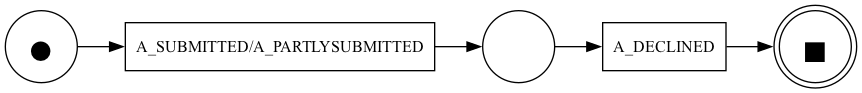

In [265]:
import pm4py

# Se il tuo dataframe non è ancora un event log nel formato di pm4py, convertilo:
log_declined = pm4py.convert_to_event_log(df_declined)

# Scopri rete di Petri con algoritmo Inductive Miner (solitamente più robusto)
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log_declined)

# Visualizza la rete di Petri
gviz = pm4py.visualization.petri_net.visualizer.apply(net, initial_marking, finacl_marking)
pm4py.visualization.petri_net.visualizer.view(gviz)


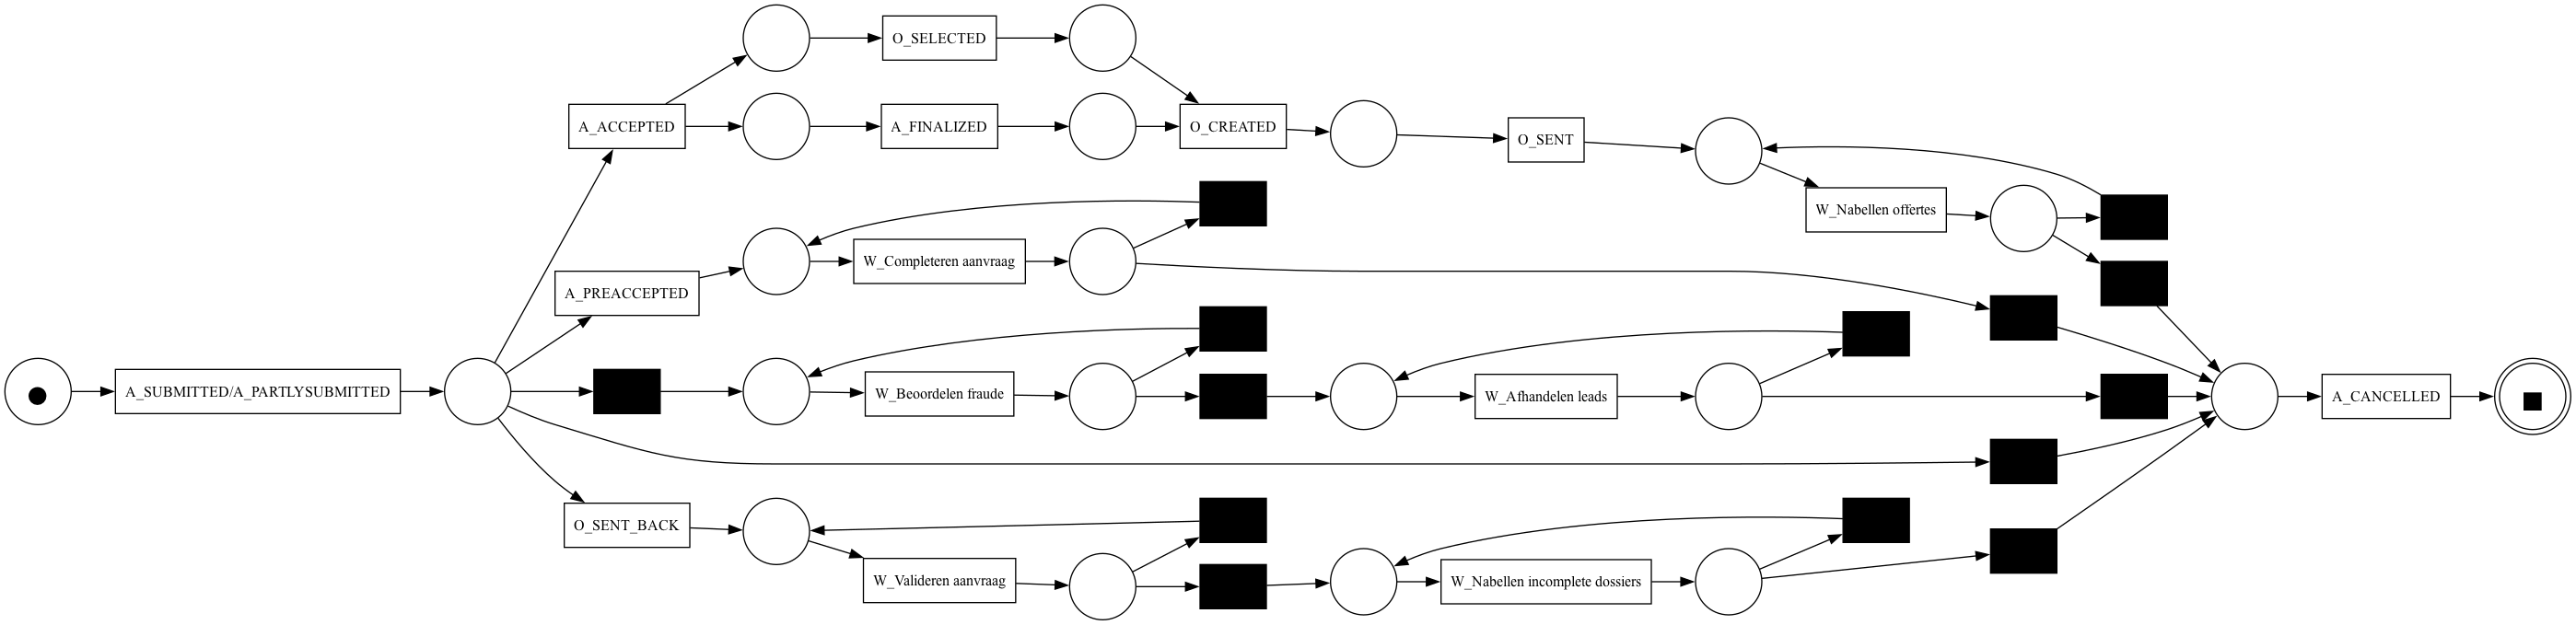

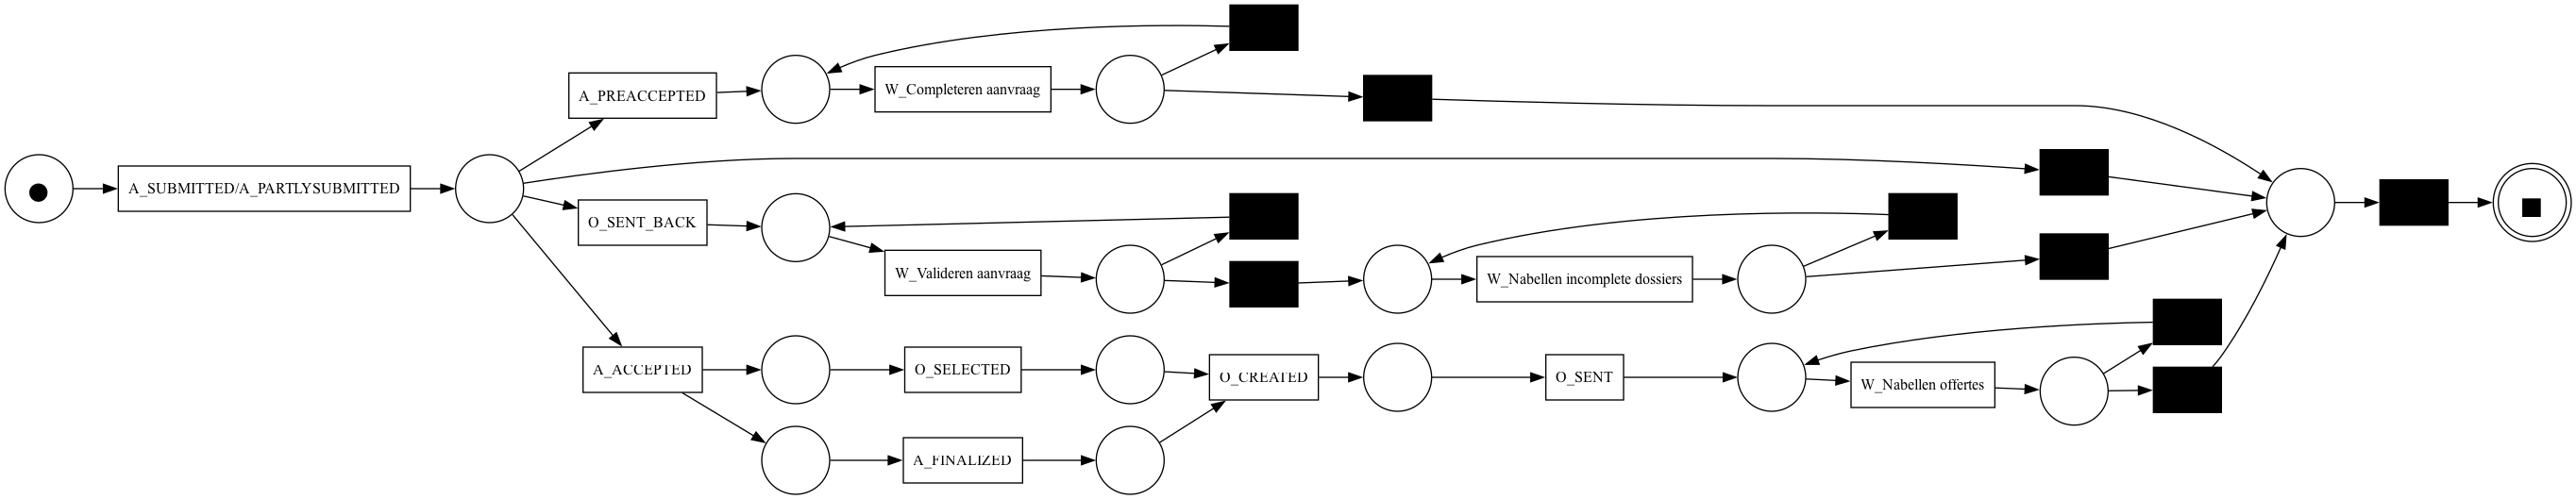

In [273]:
log_cancelled = pm4py.convert_to_event_log(df_cancelled)
net_c, im_c, fm_c = pm4py.discover_petri_net_inductive(log_cancelled,noise_threshold=0.9)
gviz_c = pm4py.visualization.petri_net.visualizer.apply(net_c, im_c, fm_c)
pm4py.visualization.petri_net.visualizer.view(gviz_c)

log_o_cancelled = pm4py.convert_to_event_log(df_o_cancelled)
net_o, im_o, fm_o = pm4py.discover_petri_net_inductive(log_o_cancelled,noise_threshold=0.9)
gviz_o = pm4py.visualization.petri_net.visualizer.apply(net_o, im_o, fm_o)
pm4py.visualization.petri_net.visualizer.view(gviz_o)


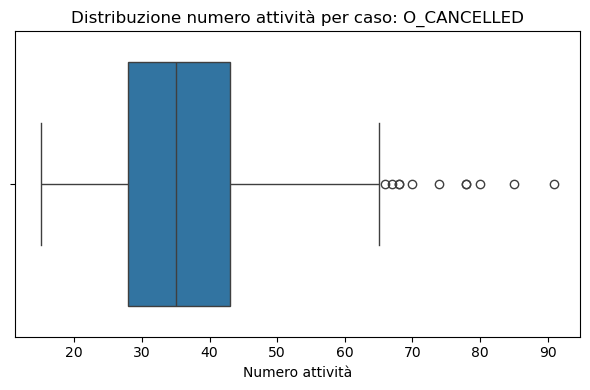


--- Statistiche Boxplot per O_CANCELLED ---
Minimo (baffo inferiore): 15
1° Quartile (Q1): 28.0
Mediana (Q2): 35.0
3° Quartile (Q3): 43.0
Massimo (baffo superiore): 65
IQR: 15.0
Numero di outlier: 11


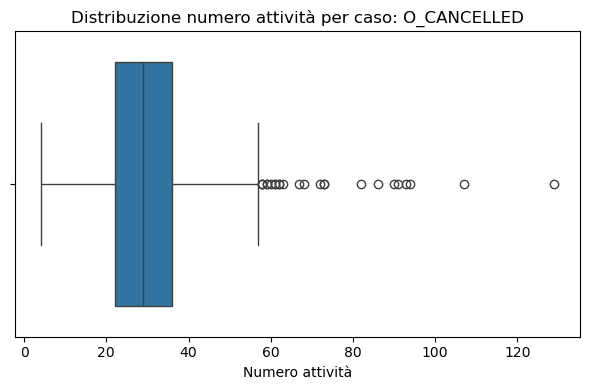


--- Statistiche Boxplot per O_CANCELLED ---
Minimo (baffo inferiore): 4
1° Quartile (Q1): 22.0
Mediana (Q2): 29.0
3° Quartile (Q3): 36.0
Massimo (baffo superiore): 57
IQR: 14.0
Numero di outlier: 24


In [362]:
def print_boxplot_stats(df, title):
    freq = df.groupby('case:concept:name').size()
    q1 = freq.quantile(0.25)
    q2 = freq.median()  # Mediana
    q3 = freq.quantile(0.75)
    iqr = q3 - q1
    lower_whisker = freq[freq >= (q1 - 1.5 * iqr)].min()
    upper_whisker = freq[freq <= (q3 + 1.5 * iqr)].max()
    outliers = freq[(freq < (q1 - 1.5 * iqr)) | (freq > (q3 + 1.5 * iqr))]

    print(f"\n--- Statistiche Boxplot per {title} ---")
    print(f"Minimo (baffo inferiore): {lower_whisker}")
    print(f"1° Quartile (Q1): {q1}")
    print(f"Mediana (Q2): {q2}")
    print(f"3° Quartile (Q3): {q3}")
    print(f"Massimo (baffo superiore): {upper_whisker}")
    print(f"IQR: {iqr}")
    print(f"Numero di outlier: {outliers.count()}")
plot_total_activities_boxplot(df_o_cancelled, "O_CANCELLED")
print_boxplot_stats(df_o_cancelled, "O_CANCELLED")
plot_total_activities_boxplot(df_cancelled, "O_CANCELLED")
print_boxplot_stats(df_cancelled, "O_CANCELLED")



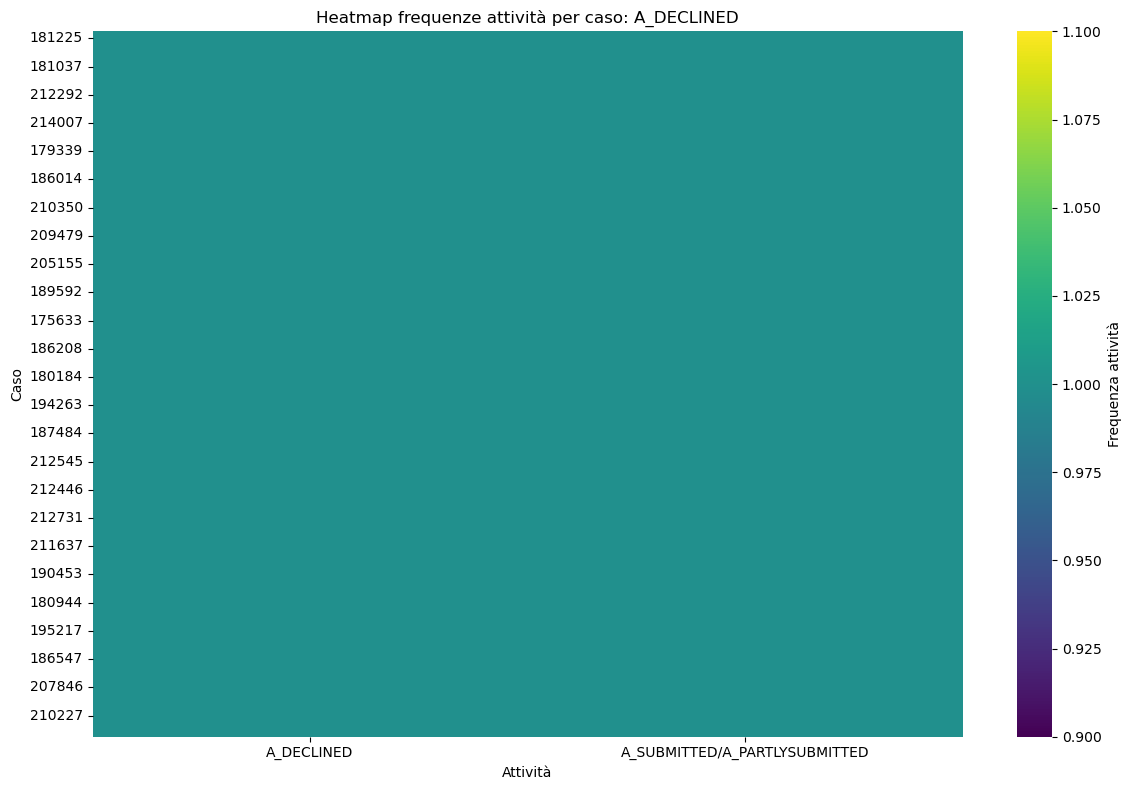

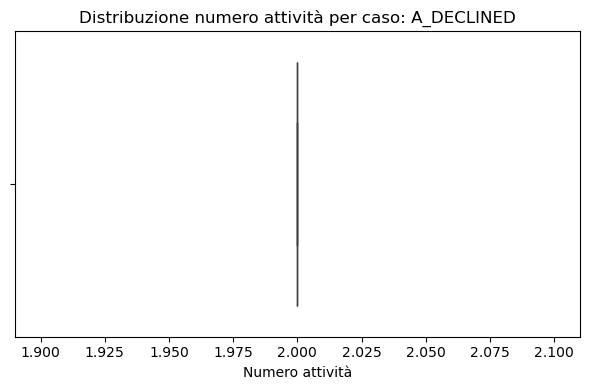

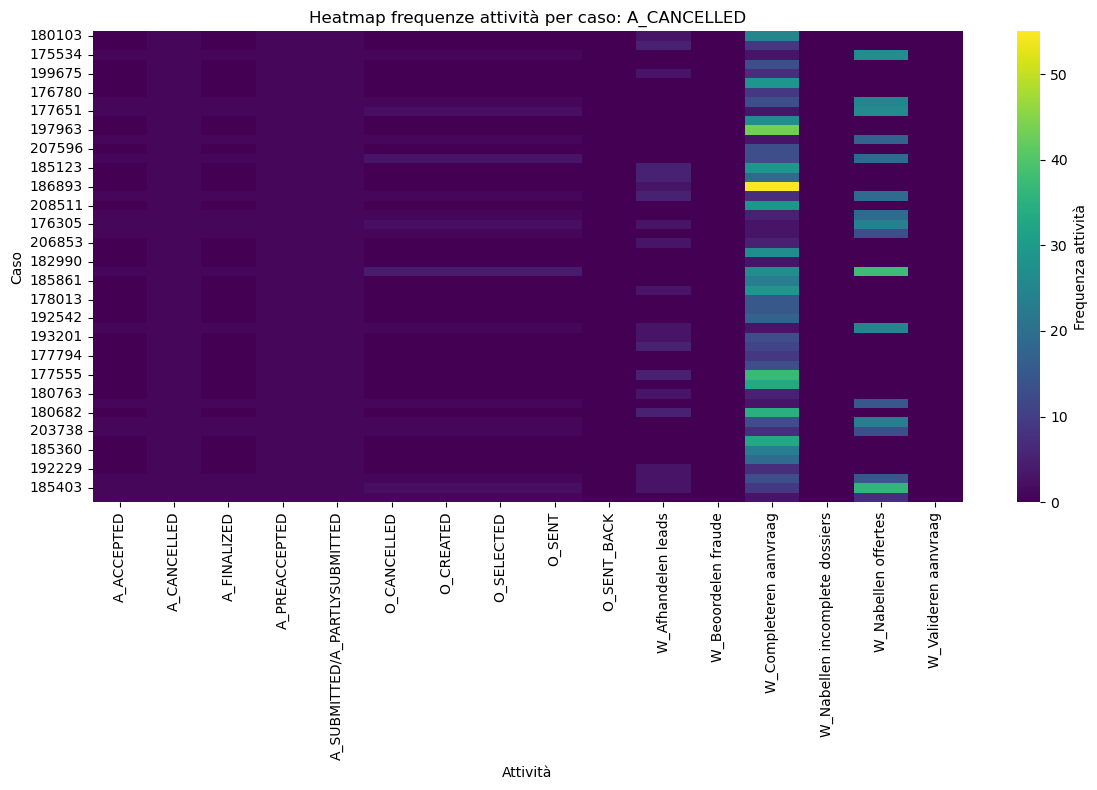

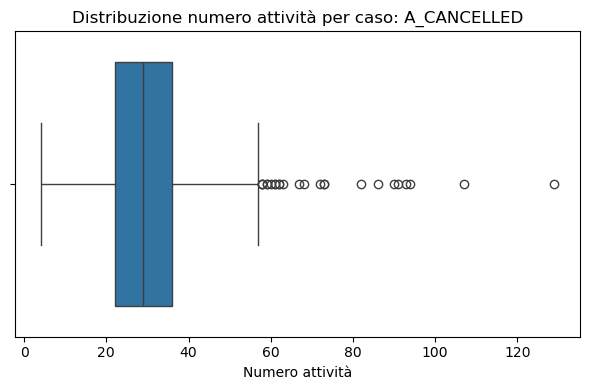

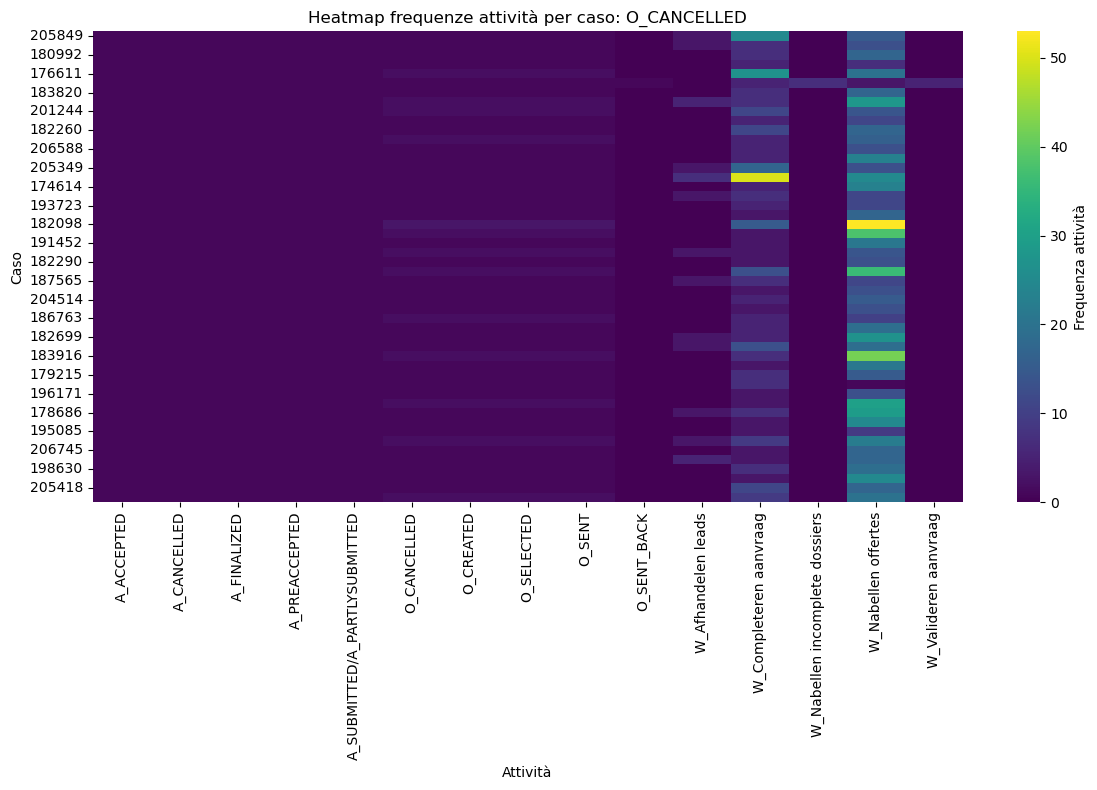

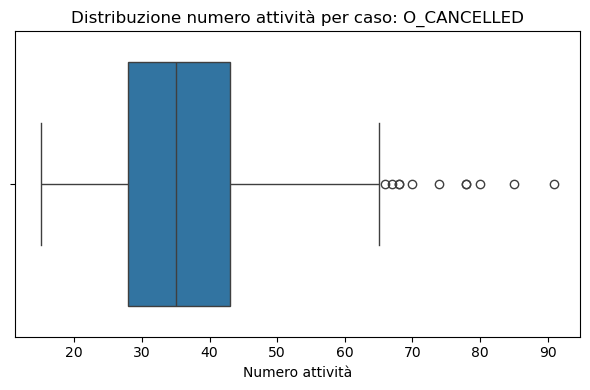

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_activity_heatmap(df, title, sample_size=50):
    # Calcola matrice frequenze attività per caso
    freq = df.groupby(['case:concept:name', 'concept:name']).size().unstack(fill_value=0)
    
    # Prendi un campione casuale di casi se sono troppi
    if freq.shape[0] > sample_size:
        freq = freq.sample(sample_size, random_state=42)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(freq, cmap='viridis', cbar_kws={'label': 'Frequenza attività'})
    plt.title(f"Heatmap frequenze attività per caso: {title}")
    plt.xlabel("Attività")
    plt.ylabel("Caso")
    plt.tight_layout()
    plt.show()

def plot_total_activities_boxplot(df, title):
    # Calcola numero totale di attività per caso
    freq = df.groupby('case:concept:name').size()
    
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=freq)
    plt.title(f"Distribuzione numero attività per caso: {title}")
    plt.xlabel("Numero attività")
    plt.tight_layout()
    plt.show()

# Heatmap e boxplot per tutti i tre dataframe, incluso A_DECLINED
plot_activity_heatmap(df_declined, "A_DECLINED")
plot_total_activities_boxplot(df_declined, "A_DECLINED")

plot_activity_heatmap(df_cancelled, "A_CANCELLED")
plot_total_activities_boxplot(df_cancelled, "A_CANCELLED")

plot_activity_heatmap(df_o_cancelled, "O_CANCELLED")
plot_total_activities_boxplot(df_o_cancelled, "O_CANCELLED")


requested loan amount

In [263]:
def loan_amount_stats(df, label):
    loan_amount = pd.to_numeric(df['case:AMOUNT_REQ'], errors='coerce')
    stats = {
        'min': loan_amount.min(),
        'max': loan_amount.max(),
        'median': loan_amount.median(),
        'mean': loan_amount.mean(),
        'std': loan_amount.std(),
        'count_valid': loan_amount.count()
    }
    print(f"Statistiche per {label}:")
    for k, v in stats.items():
        print(f"  {k}: {v}")
    return stats

stats_cancelled = loan_amount_stats(df_cancelled, "A_CANCELLED")
stats_o_cancelled = loan_amount_stats(df_o_cancelled, "O_CANCELLED")


Statistiche per A_CANCELLED:
  min: 0
  max: 75000
  median: 10000.0
  mean: 15209.485712966809
  std: 12445.339828718335
  count_valid: 21663
Statistiche per O_CANCELLED:
  min: 1000
  max: 90000
  median: 11500.0
  mean: 16233.375254267268
  std: 12920.99438570207
  count_valid: 11307


/var/folders/1z/mnqndy610lv5v7svrf9js9yr0000gn/T/ipykernel_31242/1963135910.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data1.dropna(), data2.dropna()], labels=[label1, label2], showmeans=True)


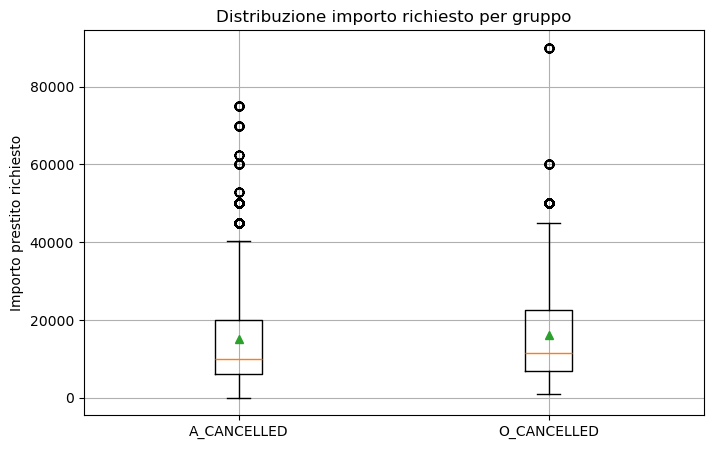

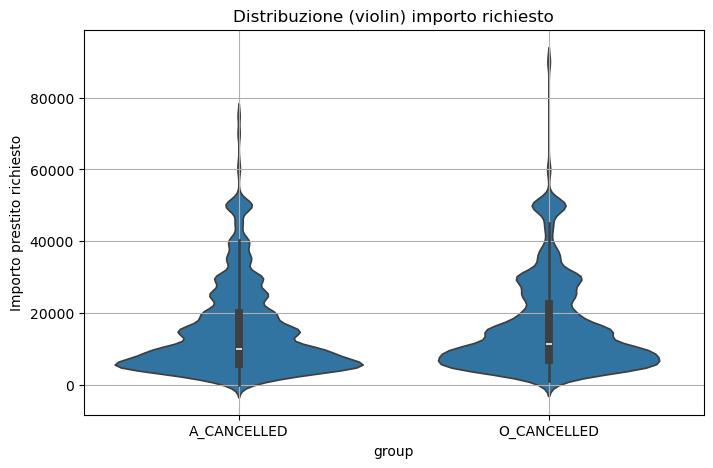

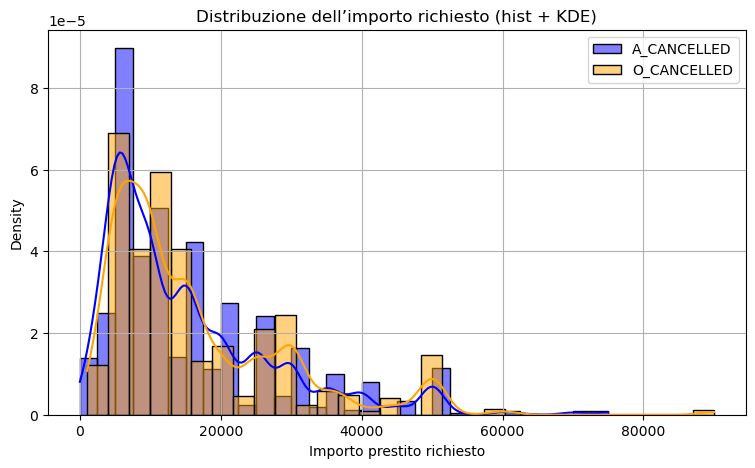

In [366]:
def plot_loan_amount_boxplot(df1, label1, df2, label2):
    data1 = pd.to_numeric(df1['case:AMOUNT_REQ'], errors='coerce')
    data2 = pd.to_numeric(df2['case:AMOUNT_REQ'], errors='coerce')

    plt.figure(figsize=(8, 5))
    plt.boxplot([data1.dropna(), data2.dropna()], labels=[label1, label2], showmeans=True)
    plt.ylabel('Importo prestito richiesto')
    plt.title('Distribuzione importo richiesto per gruppo')
    plt.grid(True)
    plt.show()

plot_loan_amount_boxplot(df_cancelled, "A_CANCELLED", df_o_cancelled, "O_CANCELLED")
import seaborn as sns

def plot_loan_amount_violin(df1, label1, df2, label2):
    df1_tmp = df1[['case:AMOUNT_REQ']].copy()
    df2_tmp = df2[['case:AMOUNT_REQ']].copy()
    df1_tmp['group'] = label1
    df2_tmp['group'] = label2

    combined_df = pd.concat([df1_tmp, df2_tmp])
    combined_df['case:AMOUNT_REQ'] = pd.to_numeric(combined_df['case:AMOUNT_REQ'], errors='coerce')

    plt.figure(figsize=(8, 5))
    sns.violinplot(x='group', y='case:AMOUNT_REQ', data=combined_df, inner='box')
    plt.ylabel('Importo prestito richiesto')
    plt.title('Distribuzione (violin) importo richiesto')
    plt.grid(True)
    plt.show()

plot_loan_amount_violin(df_cancelled, "A_CANCELLED", df_o_cancelled, "O_CANCELLED")
def plot_loan_amount_histogram(df1, label1, df2, label2):
    data1 = pd.to_numeric(df1['case:AMOUNT_REQ'], errors='coerce')
    data2 = pd.to_numeric(df2['case:AMOUNT_REQ'], errors='coerce')

    plt.figure(figsize=(9, 5))
    sns.histplot(data1, label=label1, kde=True, color='blue', stat='density', bins=30, alpha=0.5)
    sns.histplot(data2, label=label2, kde=True, color='orange', stat='density', bins=30, alpha=0.5)
    plt.xlabel('Importo prestito richiesto')
    plt.title('Distribuzione dell’importo richiesto (hist + KDE)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loan_amount_histogram(df_cancelled, "A_CANCELLED", df_o_cancelled, "O_CANCELLED")


In [274]:
def last_two_activities(df):
    # Ordina per case e timestamp crescente
    df_sorted = df.sort_values(['case:concept:name', 'time:timestamp'])
    
    # Per ogni caso prendi le ultime 2 righe
    last_two = df_sorted.groupby('case:concept:name').tail(2)
    
    # Per comodità riorganizziamo i dati in modo che ogni caso abbia la penultima e ultima attività in colonne
    last_two_activities = last_two.groupby('case:concept:name')['concept:name'].apply(list)
    
    # Assicuriamoci che ogni lista abbia almeno 2 elementi, altrimenti riempiamo con None
    last_two_activities = last_two_activities.apply(lambda x: [None]*(2-len(x)) + x if len(x) < 2 else x)
    
    # Trasformiamo in dataframe con colonne 'penultima' e 'ultima'
    result = last_two_activities.apply(pd.Series)
    result.columns = ['penultima_activ', 'ultima_activ']
    
    return result

# Applica la funzione ai due dataframe
last_two_o_cancelled = last_two_activities(df_o_cancelled)
last_two_cancelled = last_two_activities(df_cancelled)

print("Ultime due attività per O_CANCELLED")
print(last_two_o_cancelled.head())

print("\nUltime due attività per A_CANCELLED")
print(last_two_cancelled.head())


Ultime due attività per O_CANCELLED
                  penultima_activ ultima_activ
case:concept:name                             
173805                A_CANCELLED  O_CANCELLED
173811                A_CANCELLED  O_CANCELLED
174294                A_CANCELLED  O_CANCELLED
174322                A_CANCELLED  O_CANCELLED
174493                A_CANCELLED  O_CANCELLED

Ultime due attività per A_CANCELLED
                          penultima_activ ultima_activ
case:concept:name                                     
173709             W_Completeren aanvraag  A_CANCELLED
173937             W_Completeren aanvraag  A_CANCELLED
173943                        O_CANCELLED  A_CANCELLED
173946                        O_CANCELLED  A_CANCELLED
173958             W_Completeren aanvraag  A_CANCELLED


In [275]:
def last_two_activities_with_time_diff(df):
    # Ordina per case e timestamp crescente
    df_sorted = df.sort_values(['case:concept:name', 'time:timestamp'])
    
    # Prendi le ultime 2 righe per caso
    last_two = df_sorted.groupby('case:concept:name').tail(2)
    
    # Raggruppa e crea liste di attività e timestamp
    grouped = last_two.groupby('case:concept:name').agg({
        'concept:name': list,
        'time:timestamp': list
    })
    
    # Assicuriamoci che ogni lista abbia almeno 2 elementi, altrimenti riempiamo con None
    def pad_list(l):
        return [None]*(2 - len(l)) + l if len(l) < 2 else l
    
    grouped['concept:name'] = grouped['concept:name'].apply(pad_list)
    grouped['time:timestamp'] = grouped['time:timestamp'].apply(pad_list)
    
    # Estrai penultima e ultima attività e timestamp
    grouped['penultima_activ'] = grouped['concept:name'].apply(lambda x: x[0])
    grouped['ultima_activ'] = grouped['concept:name'].apply(lambda x: x[1])
    grouped['penultima_time'] = grouped['time:timestamp'].apply(lambda x: x[0])
    grouped['ultima_time'] = grouped['time:timestamp'].apply(lambda x: x[1])
    
    # Calcola differenza in secondi (o altro formato, es. minuti)
    grouped['time_diff_seconds'] = (grouped['ultima_time'] - grouped['penultima_time']).dt.total_seconds()
    
    # Se vuoi, puoi anche convertire in minuti:
    # grouped['time_diff_minutes'] = grouped['time_diff_seconds'] / 60
    
    # Mantieni solo le colonne utili
    result = grouped[['penultima_activ', 'ultima_activ', 'time_diff_seconds']]
    
    return result

# Esempio di utilizzo
last_two_o_cancelled = last_two_activities_with_time_diff(df_o_cancelled)
last_two_cancelled = last_two_activities_with_time_diff(df_cancelled)

print("Ultime due attività e tempo trascorso per O_CANCELLED")
print(last_two_o_cancelled.head())

print("\nUltime due attività e tempo trascorso per A_CANCELLED")
print(last_two_cancelled.head())


Ultime due attività e tempo trascorso per O_CANCELLED
                  penultima_activ ultima_activ  time_diff_seconds
case:concept:name                                                
173805                A_CANCELLED  O_CANCELLED              0.003
173811                A_CANCELLED  O_CANCELLED              0.000
174294                A_CANCELLED  O_CANCELLED              0.000
174322                A_CANCELLED  O_CANCELLED              0.000
174493                A_CANCELLED  O_CANCELLED              0.000

Ultime due attività e tempo trascorso per A_CANCELLED
                          penultima_activ ultima_activ  time_diff_seconds
case:concept:name                                                        
173709             W_Completeren aanvraag  A_CANCELLED        1870315.097
173937             W_Completeren aanvraag  A_CANCELLED         567942.570
173943                        O_CANCELLED  A_CANCELLED              0.000
173946                        O_CANCELLED  A_CANCELLED     

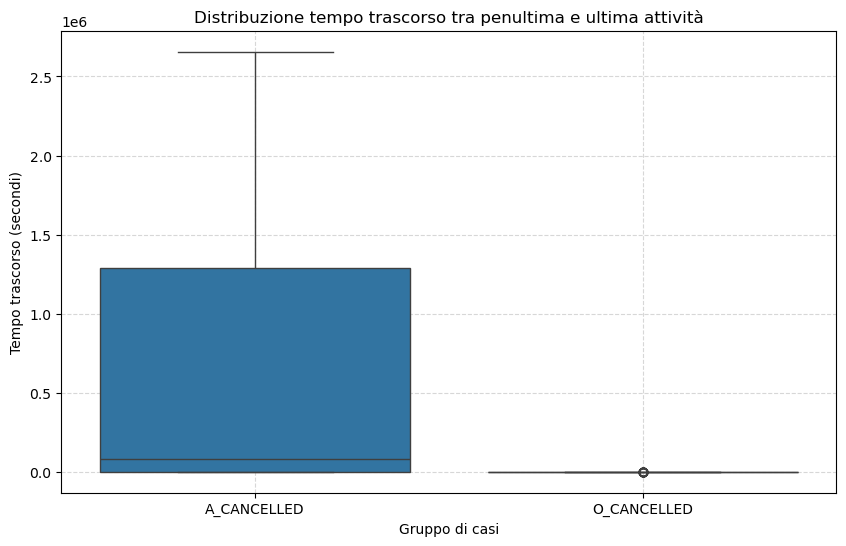

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assumendo che tu abbia già questi DataFrame con i dati calcolati
# last_two_cancelled e last_two_o_cancelled

# Aggiungiamo una colonna per identificare il gruppo
last_two_cancelled = last_two_cancelled.copy()
last_two_cancelled['Gruppo'] = 'A_CANCELLED'

last_two_o_cancelled = last_two_o_cancelled.copy()
last_two_o_cancelled['Gruppo'] = 'O_CANCELLED'

# Combiniamo i due DataFrame
df_combined = pd.concat([last_two_cancelled, last_two_o_cancelled])

# Filtro per valori validi di tempo trascorso (non nulli, non negativi)
df_combined = df_combined[df_combined['time_diff_seconds'].notnull() & (df_combined['time_diff_seconds'] >= 0)]

plt.figure(figsize=(10,6))
sns.boxplot(data=df_combined, x='Gruppo', y='time_diff_seconds')
plt.title('Distribuzione tempo trascorso tra penultima e ultima attività')
plt.ylabel('Tempo trascorso (secondi)')
plt.xlabel('Gruppo di casi')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [277]:
def get_last_n_activities(df, n=5):
    # Raggruppa per caso e ordina per timestamp
    df_sorted = df.sort_values(['case:concept:name', 'time:timestamp'])
    
    # Prendi le ultime n attività per ogni caso
    last_n = df_sorted.groupby('case:concept:name').tail(n)
    
    return last_n

last_5_cancelled = get_last_n_activities(df_cancelled, 5)
last_5_o_cancelled = get_last_n_activities(df_o_cancelled, 5)


In [280]:
def activity_frequency_last_n(last_n_df):
    freq = last_n_df['concept:name'].value_counts()
    return freq

freq_last_5_cancelled = activity_frequency_last_n(last_5_cancelled)
freq_last_5_o_cancelled = activity_frequency_last_n(last_5_o_cancelled)

print("Frequenze ultime 5 attività A_CANCELLED:")
print(freq_last_5_cancelled)

print("\nFrequenze ultime 5 attività O_CANCELLED:")
print(freq_last_5_o_cancelled)


Frequenze ultime 5 attività A_CANCELLED:
concept:name
W_Completeren aanvraag            1785
W_Nabellen offertes                784
A_CANCELLED                        716
O_CANCELLED                        266
W_Afhandelen leads                   7
W_Nabellen incomplete dossiers       6
A_ACCEPTED                           5
A_PREACCEPTED                        5
O_SENT                               2
A_SUBMITTED/A_PARTLYSUBMITTED        1
O_SENT_BACK                          1
W_Valideren aanvraag                 1
Name: count, dtype: int64

Frequenze ultime 5 attività O_CANCELLED:
concept:name
W_Nabellen offertes               907
A_CANCELLED                       308
O_CANCELLED                       308
W_Completeren aanvraag              6
W_Nabellen incomplete dossiers      6
O_SENT                              3
O_SENT_BACK                         1
W_Valideren aanvraag                1
Name: count, dtype: int64


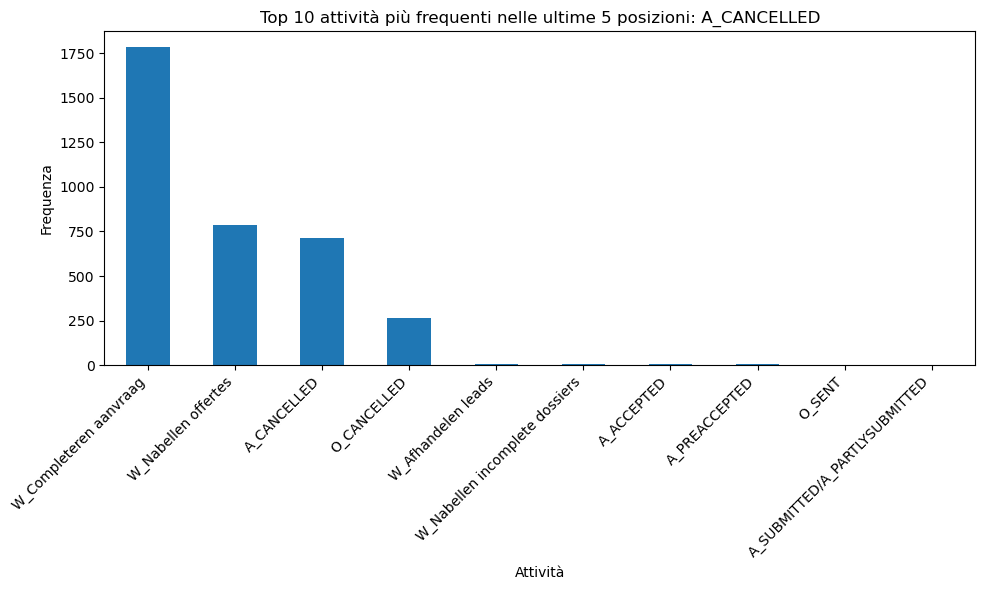

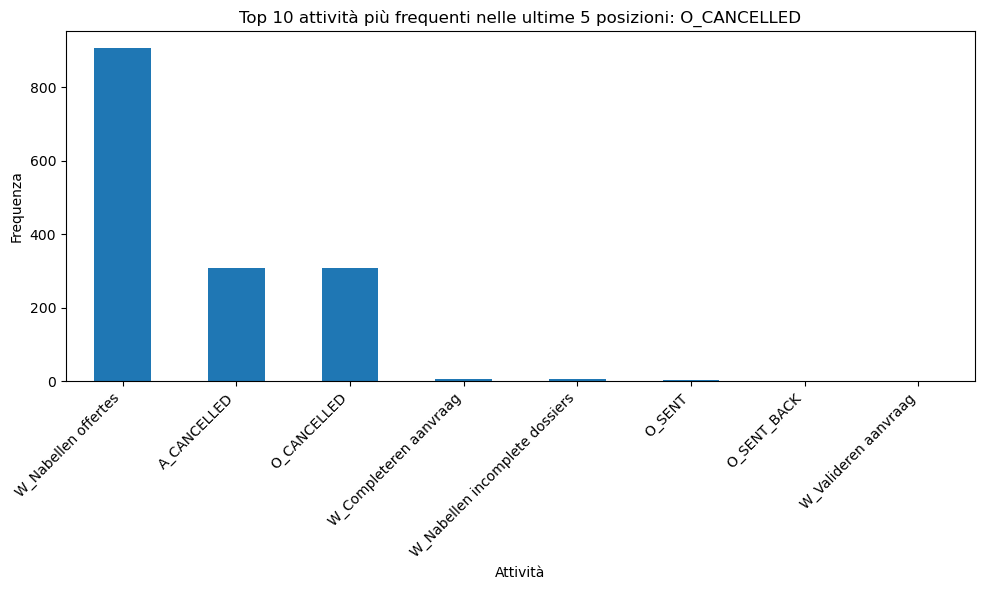

In [281]:
import matplotlib.pyplot as plt

def plot_activity_frequencies(freq, title, top_n=10):
    freq_top = freq.head(top_n)
    plt.figure(figsize=(10, 6))
    freq_top.plot(kind='bar')
    plt.title(f"Top {top_n} attività più frequenti nelle ultime 5 posizioni: {title}")
    plt.ylabel("Frequenza")
    plt.xlabel("Attività")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_activity_frequencies(freq_last_5_cancelled, "A_CANCELLED")
plot_activity_frequencies(freq_last_5_o_cancelled, "O_CANCELLED")


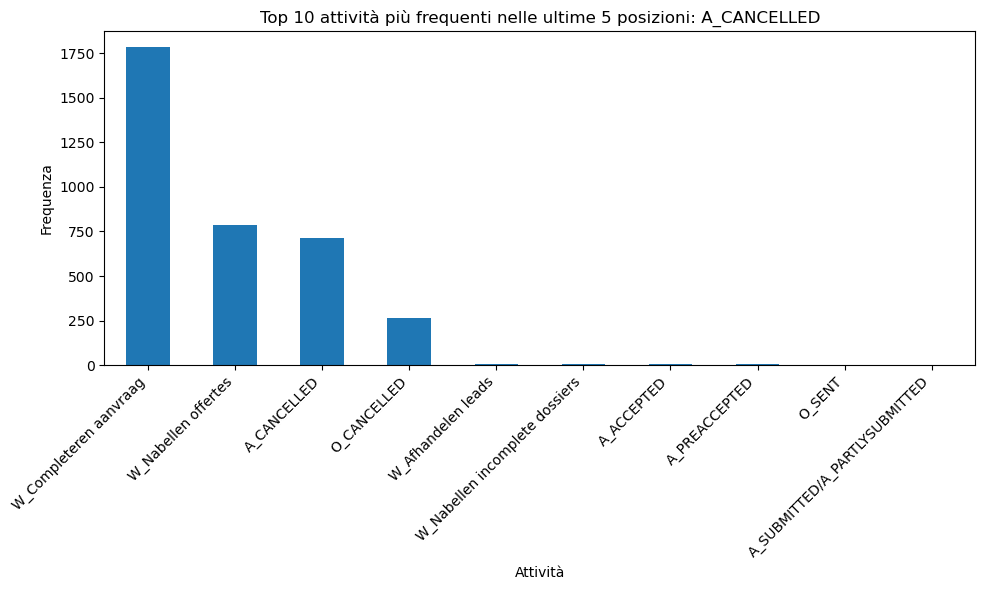

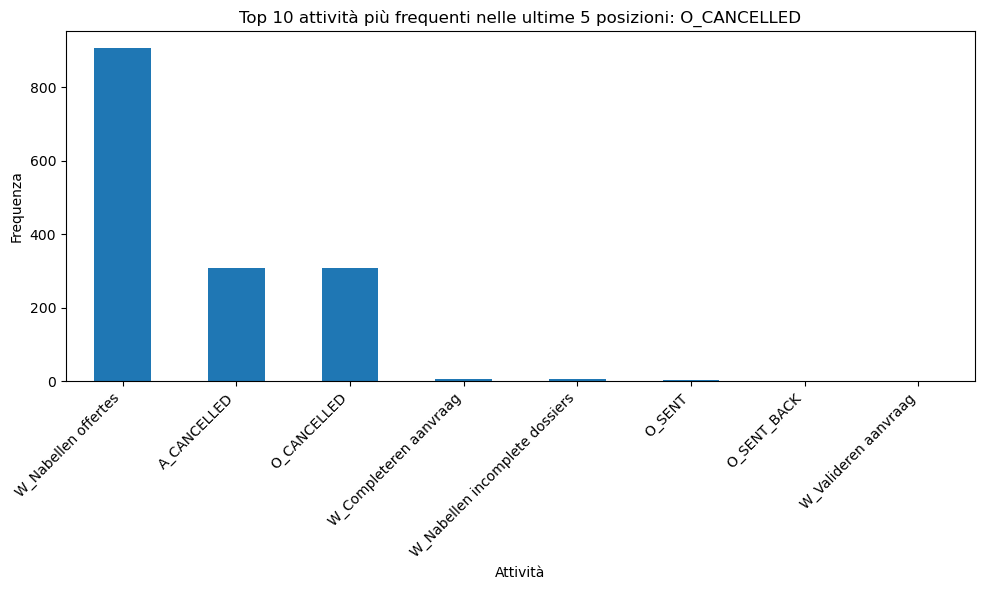

In [282]:
import matplotlib.pyplot as plt

def plot_activity_frequencies(freq, title, top_n=10):
    freq_top = freq.head(top_n)
    plt.figure(figsize=(10, 6))
    freq_top.plot(kind='bar')
    plt.title(f"Top {top_n} attività più frequenti nelle ultime 5 posizioni: {title}")
    plt.ylabel("Frequenza")
    plt.xlabel("Attività")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_activity_frequencies(freq_last_5_cancelled, "A_CANCELLED")
plot_activity_frequencies(freq_last_5_o_cancelled, "O_CANCELLED")


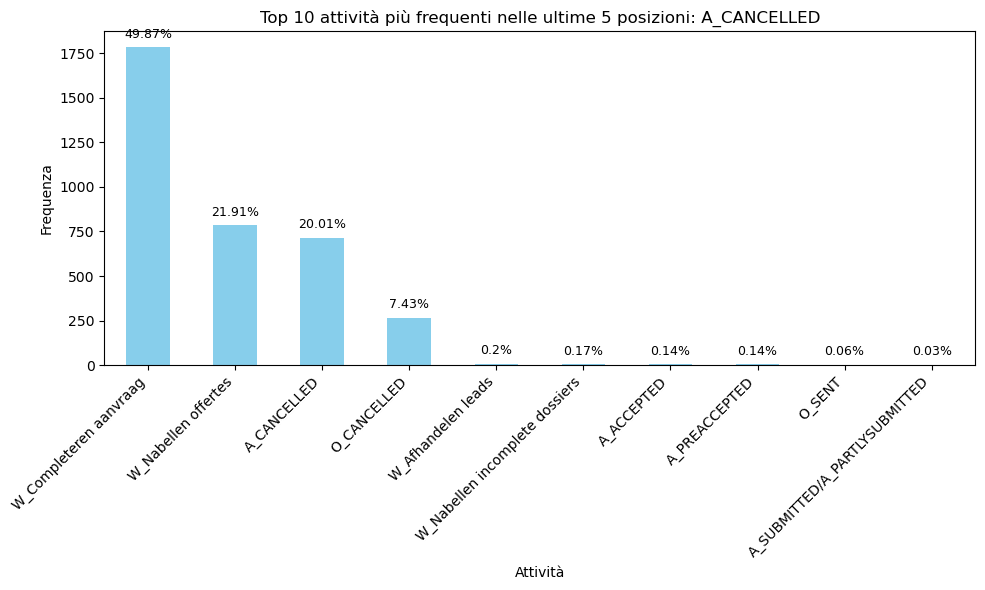

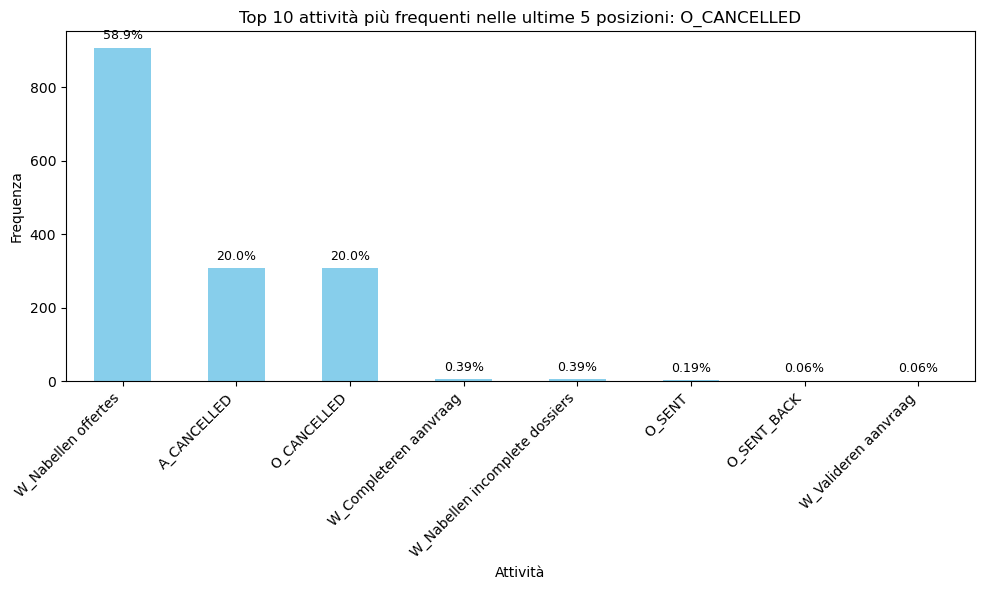

In [367]:
import matplotlib.pyplot as plt

def plot_activity_frequencies_with_percentage(freq, title, top_n=10):
    total = freq.sum()
    freq_top = freq.head(top_n)
    percentages = (freq_top / total * 100).round(2)

    plt.figure(figsize=(10, 6))
    bars = freq_top.plot(kind='bar', color='skyblue')

    plt.title(f"Top {top_n} attività più frequenti nelle ultime 5 posizioni: {title}")
    plt.ylabel("Frequenza")
    plt.xlabel("Attività")
    plt.xticks(rotation=45, ha='right')
    
    # Aggiunge le percentuali sopra ogni barra
    for idx, val in enumerate(freq_top):
        plt.text(idx, val + total * 0.01, f"{percentages.iloc[idx]}%", 
                 ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

# Esegui per i tuoi due dataset
plot_activity_frequencies_with_percentage(freq_last_5_cancelled, "A_CANCELLED")
plot_activity_frequencies_with_percentage(freq_last_5_o_cancelled, "O_CANCELLED")


solo per A_cancelled 

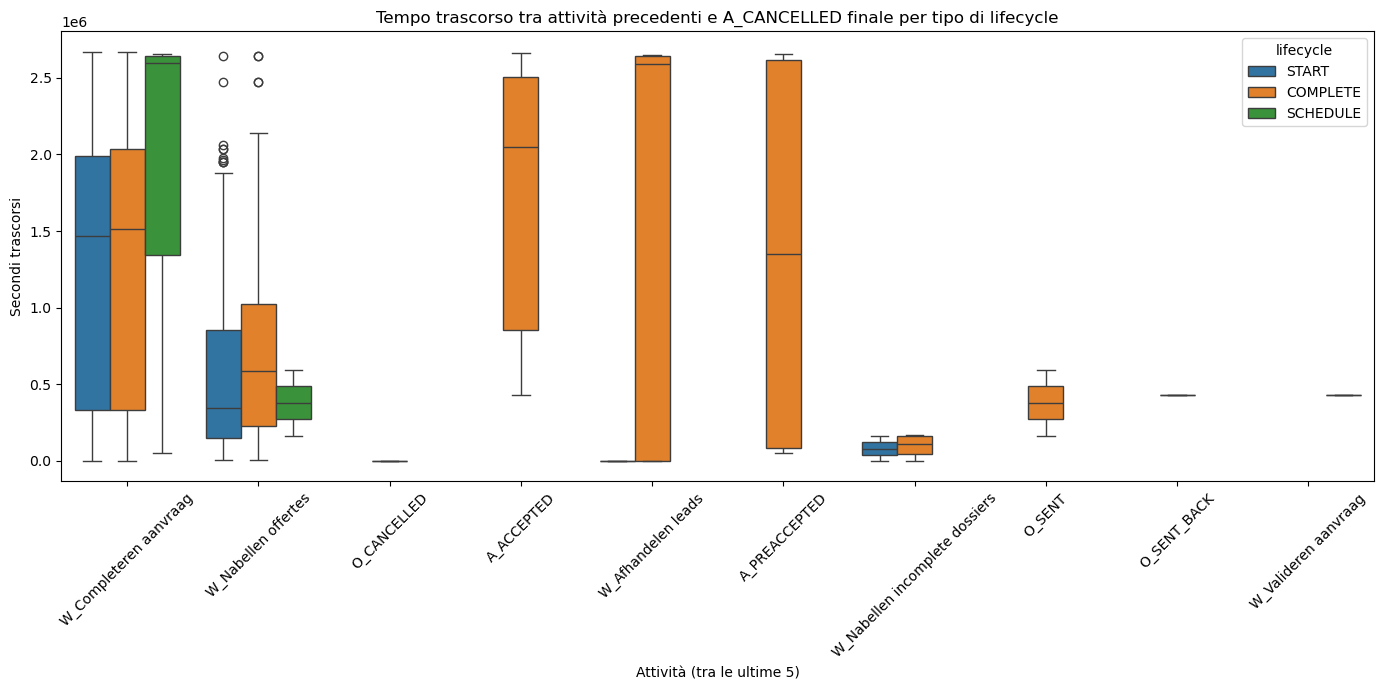

In [371]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def time_diffs_last_n_activities(df, cancel_activity_name='A_CANCELLED', n=5):
    df_sorted = df.sort_values(['case:concept:name', 'time:timestamp'])
    cases = df_sorted['case:concept:name'].unique()
    
    data = []

    for case_id in cases:
        case_events = df_sorted[df_sorted['case:concept:name'] == case_id]
        
        # Considera solo i casi che finiscono con l'attività cancel_activity_name
        if case_events['concept:name'].iloc[-1] != cancel_activity_name:
            continue
        
        last_n = case_events.tail(n)
        
        if len(last_n) < n:
            continue  # Ignora casi con meno di n attività
        
        last_timestamp = last_n['time:timestamp'].iloc[-1]
        
        # Calcola delta time tra ciascuna delle prime n-1 attività e l'ultima
        for i in range(n-1):
            activity_name = last_n['concept:name'].iloc[i]
            activity_time = last_n['time:timestamp'].iloc[i]
            lifecycle = last_n['lifecycle:transition'].iloc[i]
            delta_seconds = (last_timestamp - activity_time).total_seconds()
            
            data.append({
                'case_id': case_id,
                'activity': activity_name,
                'lifecycle': lifecycle,
                'delta_seconds': delta_seconds,
                'cancel_type': cancel_activity_name
            })
    
    return pd.DataFrame(data)

# Calcolo solo per A_CANCELLED
df_time_a_cancelled = time_diffs_last_n_activities(df_cancelled, 'A_CANCELLED', n=5)

# Grafico: boxplot dei delta temporali per attività e tipo di lifecycle
plt.figure(figsize=(14,7))
sns.boxplot(x='activity', y='delta_seconds', hue='lifecycle', data=df_time_a_cancelled)
plt.title('Tempo trascorso tra attività precedenti e A_CANCELLED finale per tipo di lifecycle')
plt.ylabel('Secondi trascorsi')
plt.xlabel('Attività (tra le ultime 5)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


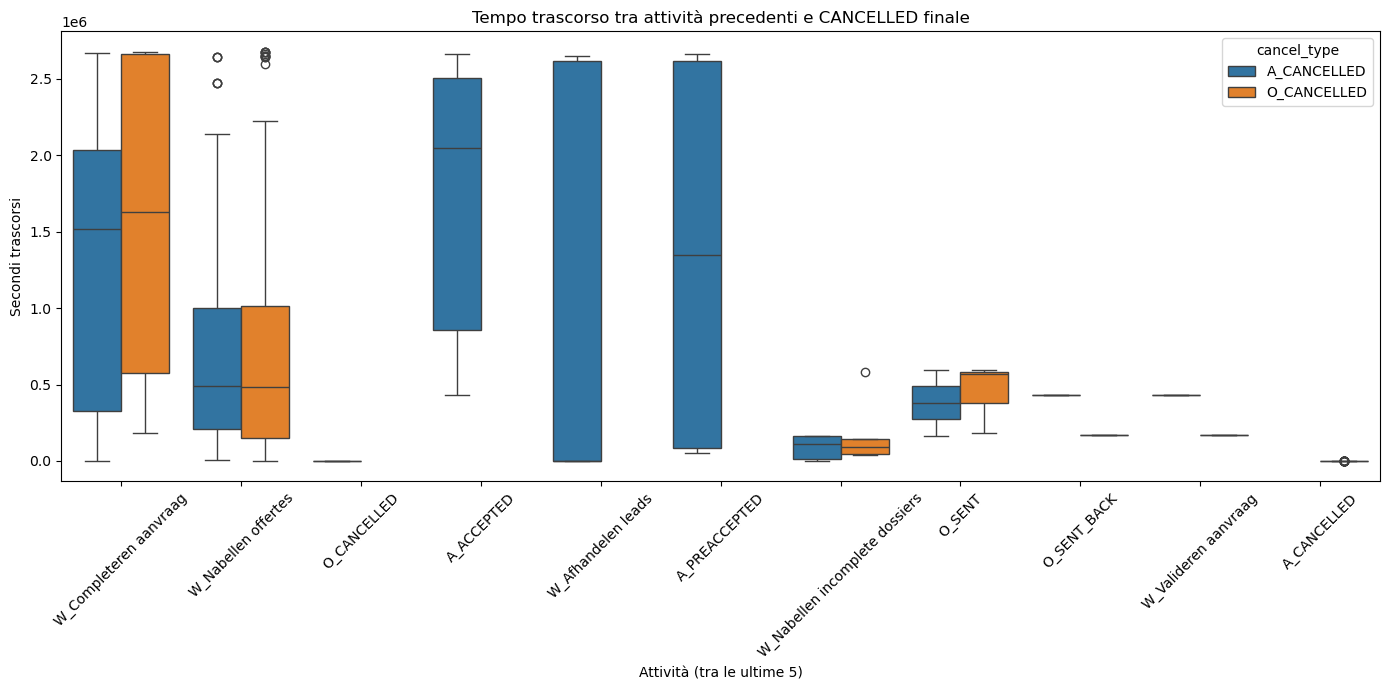

In [284]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def time_diffs_last_n_activities(df, cancel_activity_name, n=5):
    df_sorted = df.sort_values(['case:concept:name', 'time:timestamp'])
    cases = df_sorted['case:concept:name'].unique()
    
    data = []

    for case_id in cases:
        case_events = df_sorted[df_sorted['case:concept:name'] == case_id]
        
        # Considera solo i casi che finiscono con l'attività cancel_activity_name
        if case_events['concept:name'].iloc[-1] != cancel_activity_name:
            continue
        
        last_n = case_events.tail(n)
        
        if len(last_n) < n:
            continue  # Ignora casi con meno di n attività
        
        last_timestamp = last_n['time:timestamp'].iloc[-1]
        
        # Calcola delta time tra ciascuna delle prime n-1 attività e l'ultima
        for i in range(n-1):
            activity_name = last_n['concept:name'].iloc[i]
            activity_time = last_n['time:timestamp'].iloc[i]
            delta_seconds = (last_timestamp - activity_time).total_seconds()
            
            data.append({
                'case_id': case_id,
                'activity': activity_name,
                'delta_seconds': delta_seconds,
                'cancel_type': cancel_activity_name
            })
    
    return pd.DataFrame(data)

# Calcolo per A_CANCELLED e O_CANCELLED
df_time_a_cancelled = time_diffs_last_n_activities(df_cancelled, 'A_CANCELLED', n=5)
df_time_o_cancelled = time_diffs_last_n_activities(df_o_cancelled, 'O_CANCELLED', n=5)

df_time_all = pd.concat([df_time_a_cancelled, df_time_o_cancelled])

# Grafico: boxplot dei delta temporali per attività e tipo cancellazione
plt.figure(figsize=(14,7))
sns.boxplot(x='activity', y='delta_seconds', hue='cancel_type', data=df_time_all)
plt.title('Tempo trascorso tra attività precedenti e CANCELLED finale')
plt.ylabel('Secondi trascorsi')
plt.xlabel('Attività (tra le ultime 5)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


high rejection
rates

/var/folders/1z/mnqndy610lv5v7svrf9js9yr0000gn/T/ipykernel_31242/816574976.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cancelled['case:AMOUNT_REQ'] = pd.to_numeric(df_cancelled['case:AMOUNT_REQ'], errors='coerce')


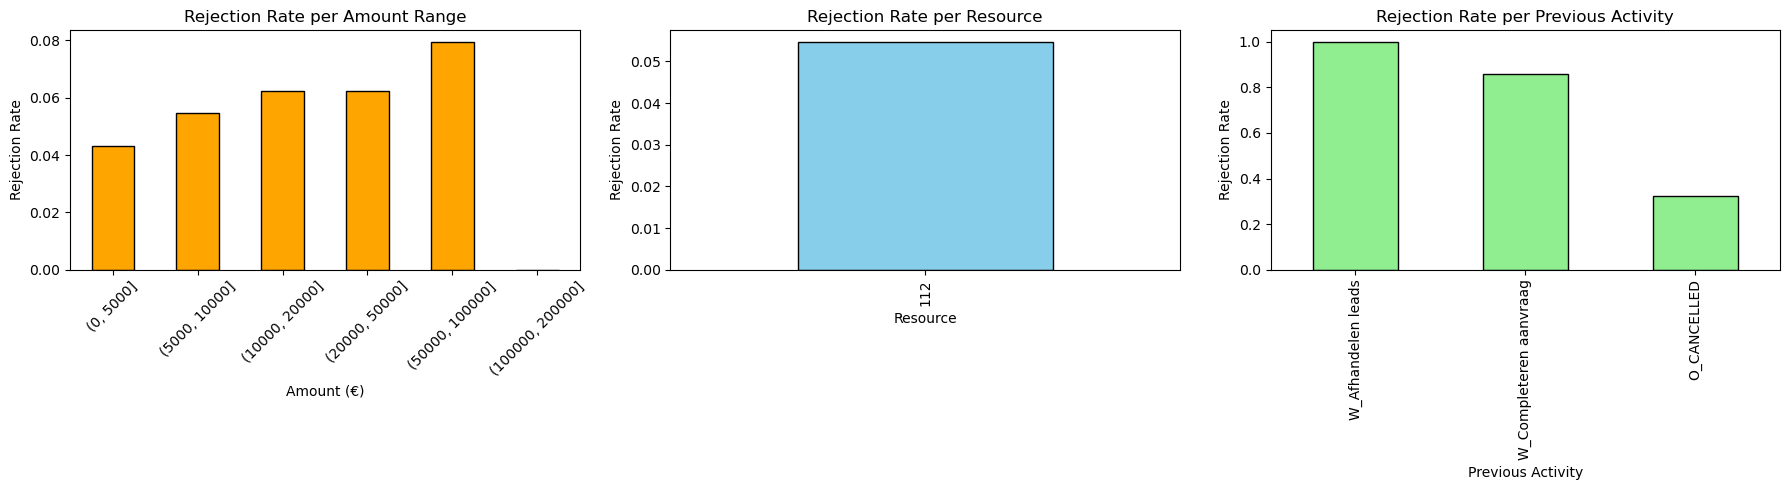

In [296]:
import pandas as pd
import matplotlib.pyplot as plt

# Assicura conversione numerica
df_merged['case:AMOUNT_REQ'] = pd.to_numeric(df_merged['case:AMOUNT_REQ'], errors='coerce')
df_cancelled['case:AMOUNT_REQ'] = pd.to_numeric(df_cancelled['case:AMOUNT_REQ'], errors='coerce')

# Calcolo bin dinamici per amount
max_amount = df_merged['case:AMOUNT_REQ'].dropna().max()
last_bin = 100000
bins = [0, 5000, 10000, 20000, 50000, 100000, max(max_amount + 1, 200000)] if max_amount > last_bin else [0, 5000, 10000, 20000, 50000, 100000, 200000]

# Funzione generica di calcolo
def compute_rejection_rate_by_column(df_full, df_rejected, column, bins=None):
    if bins is not None:
        full_series = pd.cut(df_full.groupby('case:concept:name')[column].first(), bins=bins)
        rejected_series = pd.cut(df_rejected.groupby('case:concept:name')[column].first(), bins=bins)
    else:
        full_series = df_full.groupby('case:concept:name')[column].first()
        rejected_series = df_rejected.groupby('case:concept:name')[column].first()
    
    total_counts = full_series.value_counts().sort_index()
    rejected_counts = rejected_series.value_counts().sort_index()
    
    rejection_rate = (rejected_counts / total_counts).fillna(0)
    return rejection_rate

# 1. Rejection rate per range AMOUNT_REQ
rej_by_amount = compute_rejection_rate_by_column(df_merged, df_cancelled, 'case:AMOUNT_REQ', bins=bins)

# 2. Rejection rate per org:resource
rej_by_resource = compute_rejection_rate_by_column(df_merged, df_cancelled, 'org:resource')

# 3. Rejection rate per attività precedente al rifiuto
def get_previous_activity(df):
    df_sorted = df.sort_values(by=['case:concept:name', 'time:timestamp'])
    df_sorted['prev_activity'] = df_sorted.groupby('case:concept:name')['concept:name'].shift(1)
    last_events = df_sorted.groupby('case:concept:name').last()
    return last_events['prev_activity'].value_counts(normalize=False)

prev_acts_full = get_previous_activity(df_merged)
prev_acts_cancel = get_previous_activity(df_cancelled)

common_acts = prev_acts_full.index.intersection(prev_acts_cancel.index)
rej_by_prev_act = (prev_acts_cancel[common_acts] / prev_acts_full[common_acts]).fillna(0).sort_values(ascending=False)

# 4. Visualizzazione
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Grafico 1: AMOUNT_REQ
rej_by_amount.sort_index().plot(kind='bar', ax=axes[0], color='orange', edgecolor='black')
axes[0].set_title('Rejection Rate per Amount Range')
axes[0].set_xlabel('Amount (€)')
axes[0].set_ylabel('Rejection Rate')
axes[0].tick_params(axis='x', rotation=45)

# Grafico 2: org:resource
rej_by_resource.sort_values(ascending=False).plot(kind='bar', ax=axes[1], color='skyblue', edgecolor='black')
axes[1].set_title('Rejection Rate per Resource')
axes[1].set_xlabel('Resource')
axes[1].set_ylabel('Rejection Rate')
axes[1].tick_params(axis='x', rotation=90)

# Grafico 3: attività precedente
rej_by_prev_act.head(10).plot(kind='bar', ax=axes[2], color='lightgreen', edgecolor='black')
axes[2].set_title('Rejection Rate per Previous Activity')
axes[2].set_xlabel('Previous Activity')
axes[2].set_ylabel('Rejection Rate')
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


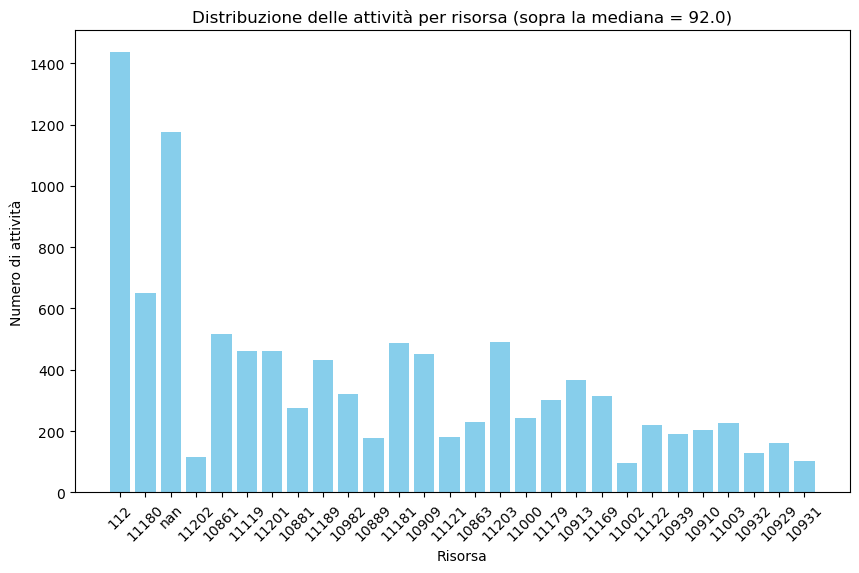

In [303]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

resources = df['org:resource']
resource_counts = Counter(resources)

# Converti in dizionario semplice per comodità
counts_dict = dict(resource_counts)

# Calcola la mediana
mediana = np.median(list(counts_dict.values()))

# Filtra risorse sopra la mediana
filtered_counts = {k: v for k, v in counts_dict.items() if v > mediana}

# Plot
plt.figure(figsize=(10, 6))
plt.bar(filtered_counts.keys(), filtered_counts.values(), color='skyblue')
plt.xlabel('Risorsa')
plt.ylabel('Numero di attività')
plt.title(f'Distribuzione delle attività per risorsa (sopra la mediana = {mediana})')
plt.xticks(rotation=45)
plt.show()


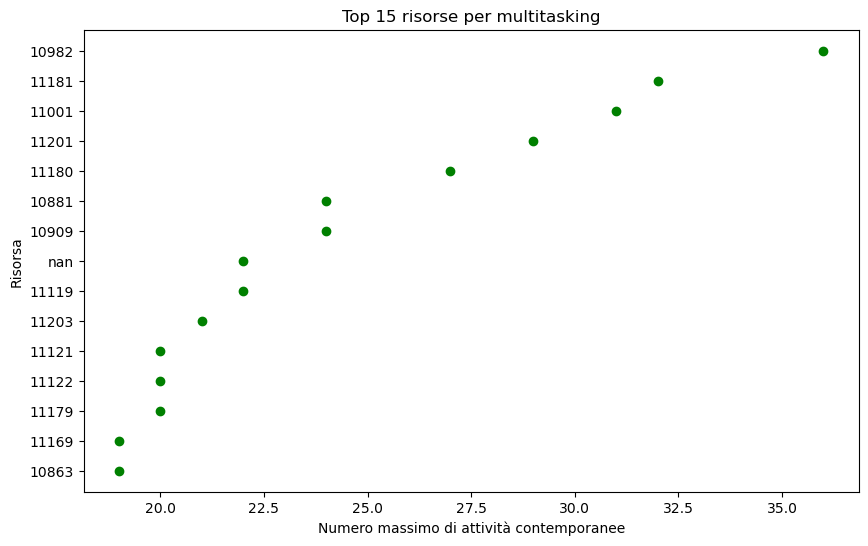

In [319]:
top_multitaskers = multitaskers.head(15)
top_multitaskers = top_multitaskers.sort_values()

plt.figure(figsize=(10,6))
plt.scatter(top_multitaskers.values, top_multitaskers.index, color='green')
plt.xlabel('Numero massimo di attività contemporanee')
plt.ylabel('Risorsa')
plt.title('Top 15 risorse per multitasking')
plt.show()


org:resource
11111         0.061000
11029         0.433000
10971        11.310773
10880        33.425205
10859        34.427214
11200        46.193043
11202        50.023158
10862        51.868269
11120        66.214909
10629      2197.374667
112        6591.173608
11289     10283.979000
11300     10939.932125
10228     12902.619424
11001     22398.663484
10910     43144.834789
11169     45945.603099
11179     54321.811817
10933     58370.830987
10931     61888.979856
10609     61932.309379
11122     64151.247595
11002     66538.505526
10939     69182.372281
10982     70622.391938
11121     71375.837239
10932     72009.716977
11201     72534.123603
10929     74085.501735
11000     77769.726704
10863     78012.875175
11019     79951.878698
10912     80728.146256
11299     84185.458820
10899     89666.158750
11180     90110.875147
11119     91740.836379
11189     93230.858074
11003     96887.433193
11049     97817.324636
11203    103623.446122
10889    108625.731341
nan      110310.71141

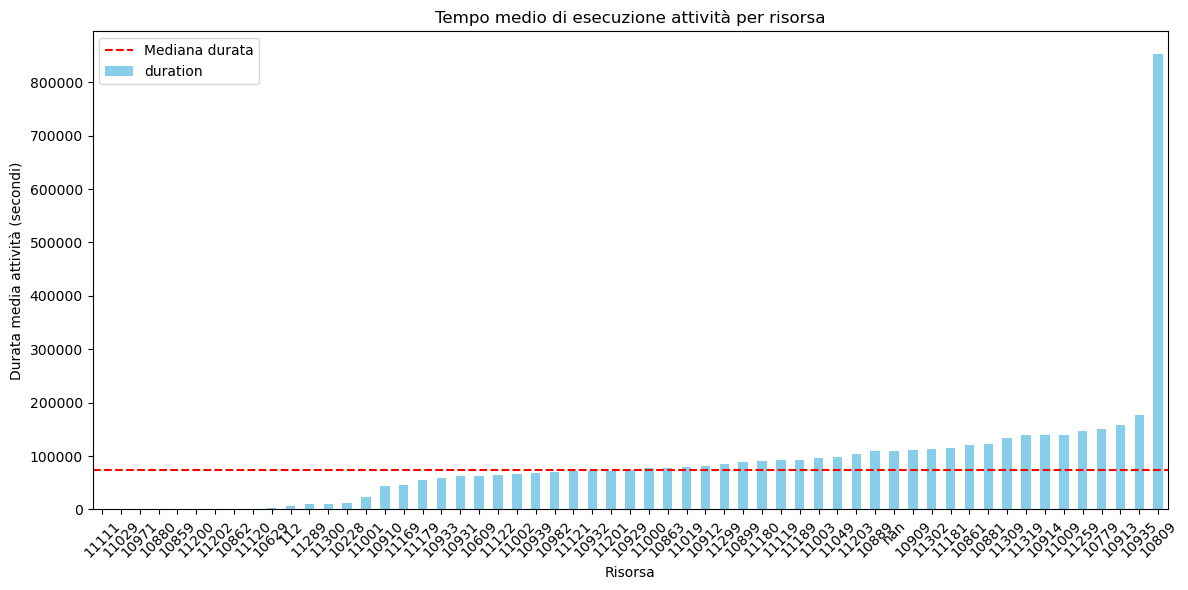

In [321]:
import pandas as pd

# Ordina per case e timestamp
df_sorted = df.sort_values(by=['case:concept:name', 'time:timestamp'])

# Calcola durata tra eventi consecutivi per caso
df_sorted['next_timestamp'] = df_sorted.groupby('case:concept:name')['time:timestamp'].shift(-1)
df_sorted['duration'] = (df_sorted['next_timestamp'] - df_sorted['time:timestamp']).dt.total_seconds()

# Filtra solo le righe dove duration è valida (non NaN)
df_duration = df_sorted.dropna(subset=['duration'])
mean_duration_by_resource = df_duration.groupby('org:resource')['duration'].mean().sort_values()
print(mean_duration_by_resource)
median_duration = mean_duration_by_resource.median()

veloci = mean_duration_by_resource[mean_duration_by_resource <= median_duration]
lente = mean_duration_by_resource[mean_duration_by_resource > median_duration]

print("Risorse veloci:\n", veloci)
print("Risorse lente:\n", lente)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
mean_duration_by_resource.plot(kind='bar', color='skyblue')
plt.axhline(median_duration, color='red', linestyle='--', label='Mediana durata')
plt.ylabel('Durata media attività (secondi)')
plt.xlabel('Risorsa')
plt.title('Tempo medio di esecuzione attività per risorsa')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()




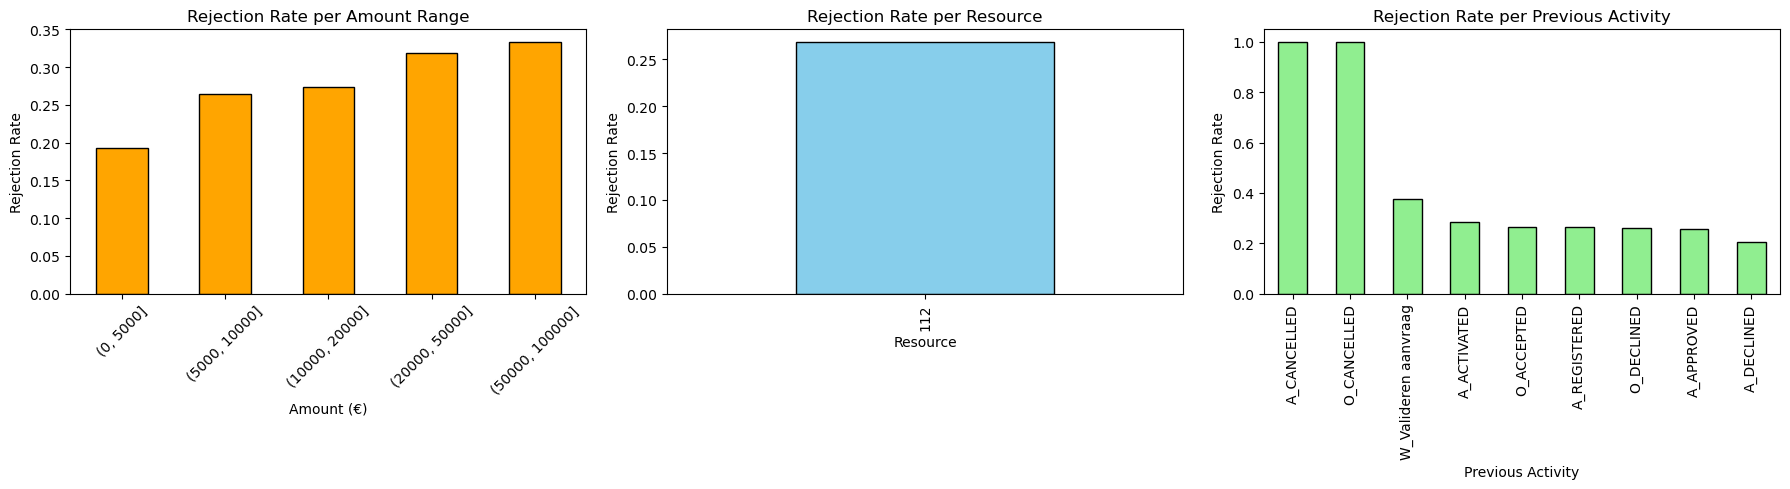

In [376]:
import pandas as pd
import matplotlib.pyplot as plt

# Assicura che gli amount siano numerici
df_W_complete['case:AMOUNT_REQ'] = pd.to_numeric(df_W_complete['case:AMOUNT_REQ'], errors='coerce')

# Seleziona i casi cancellati da W_complete
cancel_cases = df_W_complete[df_W_complete['concept:name'].str.contains('CANCELLED', case=False, na=False)]
cancel_case_ids = cancel_cases['case:concept:name'].unique()
condf_cancelled = df_W_complete[df_W_complete['case:concept:name'].isin(cancel_case_ids)]

# Calcolo bin dinamici per amount
max_amount = df_W_complete['case:AMOUNT_REQ'].dropna().max()
last_bin = 100000
bins = [0, 5000, 10000, 20000, 50000, 100000, max(max_amount + 1, 200000)] if max_amount > last_bin else [0, 5000, 10000, 20000, 50000, 100000]

# Funzione generica
def compute_rejection_rate_by_column(df_full, df_rejected, column, bins=None):
    if bins is not None:
        full_series = pd.cut(df_full.groupby('case:concept:name')[column].first(), bins=bins)
        rejected_series = pd.cut(df_rejected.groupby('case:concept:name')[column].first(), bins=bins)
    else:
        full_series = df_full.groupby('case:concept:name')[column].first()
        rejected_series = df_rejected.groupby('case:concept:name')[column].first()
    
    total_counts = full_series.value_counts().sort_index()
    rejected_counts = rejected_series.value_counts().sort_index()
    
    rejection_rate = (rejected_counts / total_counts).fillna(0)
    return rejection_rate

# 1. Rejection rate per range AMOUNT_REQ
rej_by_amount = compute_rejection_rate_by_column(df_W_complete, condf_cancelled, 'case:AMOUNT_REQ', bins=bins)

# 2. Rejection rate per org:resource
rej_by_resource = compute_rejection_rate_by_column(df_W_complete, condf_cancelled, 'org:resource')

# 3. Rejection rate per attività precedente alla cancellazione
def get_previous_activity(df):
    df_sorted = df.sort_values(by=['case:concept:name', 'time:timestamp'])
    df_sorted['prev_activity'] = df_sorted.groupby('case:concept:name')['concept:name'].shift(1)
    last_events = df_sorted.groupby('case:concept:name').last()
    return last_events['prev_activity'].value_counts(normalize=False)

prev_acts_full = get_previous_activity(df_W_complete)
prev_acts_cancel = get_previous_activity(condf_cancelled)

common_acts = prev_acts_full.index.intersection(prev_acts_cancel.index)
rej_by_prev_act = (prev_acts_cancel[common_acts] / prev_acts_full[common_acts]).fillna(0).sort_values(ascending=False)

# 4. Visualizzazione
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Grafico 1: AMOUNT_REQ
rej_by_amount.sort_index().plot(kind='bar', ax=axes[0], color='orange', edgecolor='black')
axes[0].set_title('Rejection Rate per Amount Range')
axes[0].set_xlabel('Amount (€)')
axes[0].set_ylabel('Rejection Rate')
axes[0].tick_params(axis='x', rotation=45)

# Grafico 2: org:resource
rej_by_resource.sort_values(ascending=False).plot(kind='bar', ax=axes[1], color='skyblue', edgecolor='black')
axes[1].set_title('Rejection Rate per Resource')
axes[1].set_xlabel('Resource')
axes[1].set_ylabel('Rejection Rate')
axes[1].tick_params(axis='x', rotation=90)

# Grafico 3: attività precedente
rej_by_prev_act.head(10).plot(kind='bar', ax=axes[2], color='lightgreen', edgecolor='black')
axes[2].set_title('Rejection Rate per Previous Activity')
axes[2].set_xlabel('Previous Activity')
axes[2].set_ylabel('Rejection Rate')
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()
